In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('..')




# EDA & Stats

### Data Understanding

#### Load the data

In [2]:
from scripts.insurance_scripts import load_data


In [3]:
insurance_data = load_data('MachineLearningRating_v3.txt')


/home/osho/Projects/10AcadameyDADSML/10Acadamecyweek3Analysis/scripts/insurance_scripts.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance_data = pd.read_csv(f'docs/{filename}',delimiter='|')


#### Check the loaded data

In [4]:
insurance_data.head(10)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0
7,145247,12827,2015-06-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,35.332316,0.0
8,145247,12827,2015-08-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
9,145245,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


#### Number of rows and columns

In [5]:
num_rows, num_columns = insurance_data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 1000098
Number of columns: 52


#### Find missing value and data types of each columns

In [6]:
from scripts.insurance_scripts import find_missing_values


In [7]:
find_missing_values(insurance_data)


From 52 columns selected, there are 22 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
WrittenOff,641901,64.2,object
Converted,641901,64.2,object
Rebuilt,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object


#### Replace missing values

In [8]:
def replace_missing_values(data):
  """
  Replaces missing values in a DataFrame with the mean for numeric columns and the mode for categorical columns.

  Args:
    data: The input DataFrame.

  Returns:
    The DataFrame with missing values replaced.
  """

  # Identify numeric and categorical columns
  numeric_columns = data.select_dtypes(include='number').columns
  categorical_columns = data.select_dtypes(include='object').columns

  # Replace missing values in numeric columns with the mean
  for column in numeric_columns:
    column_mean = data[column].mean()
    data[column] = data[column].fillna(column_mean)

  # Replace missing values in categorical columns with the mode
  for column in categorical_columns:
    column_mode = data[column].mode().iloc[0]
    data[column] = data[column].fillna(column_mode)

  return data


In [9]:
insurance_data=replace_missing_values(insurance_data)


In [10]:
find_missing_values(insurance_data)


From 52 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64


In [11]:
insurance_data = insurance_data.drop(columns='NumberOfVehiclesInFleet')


#### Summary statistics

In [12]:
insurance_data.describe()


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642e+00,2.466743e+03,9.720792e+01,4.019250e+00,2.255311e+05,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360005e+07,3.261391e+00,2.939390e-01,4.426784e+02,1.938790e+01,4.681852e-01,2.650422e+05,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,2.255311e+05,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.255311e+05,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2.255311e+05,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,2.655000e+07,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Univariate Analysis

#### Histograms for numerical analysis

UnderwrittenCoverID
85640     30
85641     30
85642     30
85651     30
85644     30
          ..
289293     1
289281     1
289283     1
279161     1
279167     1
Name: count, Length: 116532, dtype: int64


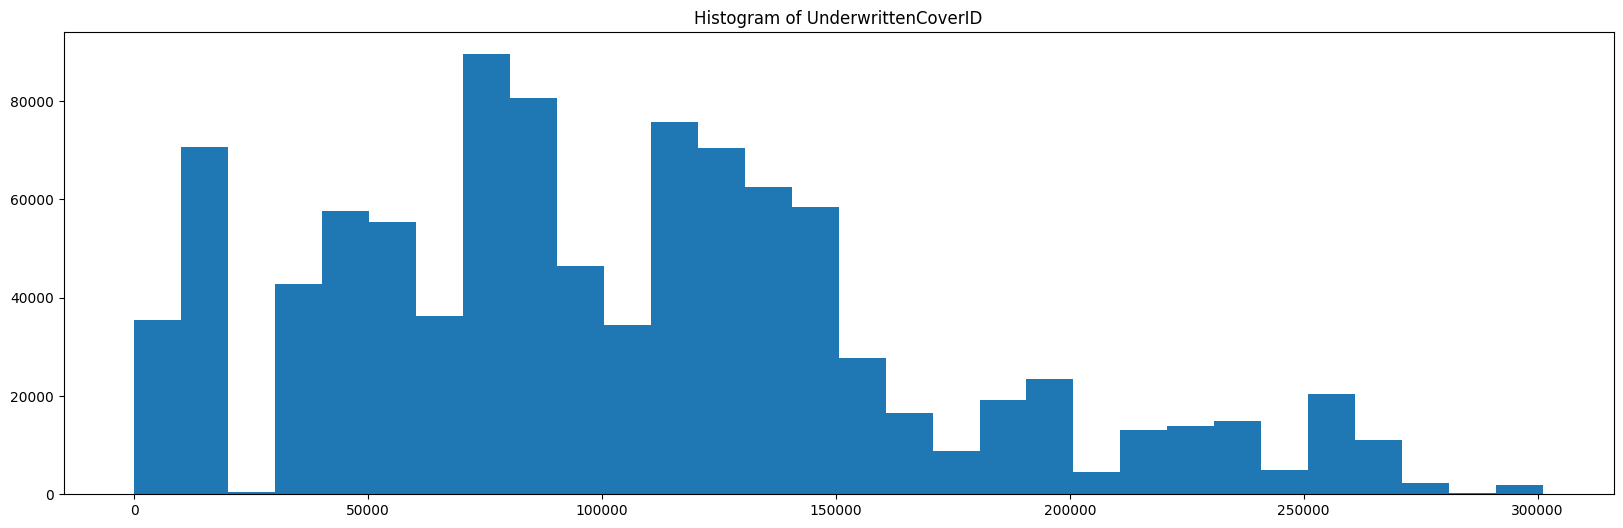

PolicyID
3870     10400
698       4500
5351      3080
6924      2852
9774      2392
         ...  
592          1
803          1
1034         1
15970        1
22361        1
Name: count, Length: 7000, dtype: int64


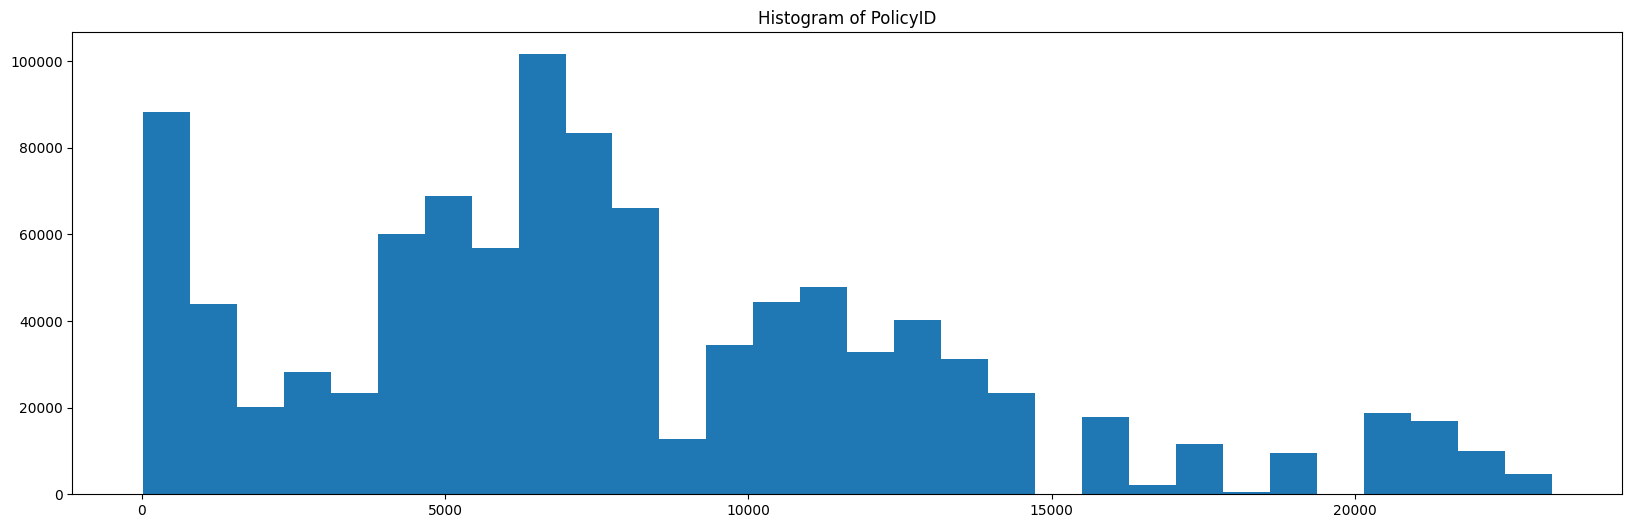

PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
         ...  
284          1
7560         1
2210         1
3655         1
6655         1
Name: count, Length: 888, dtype: int64


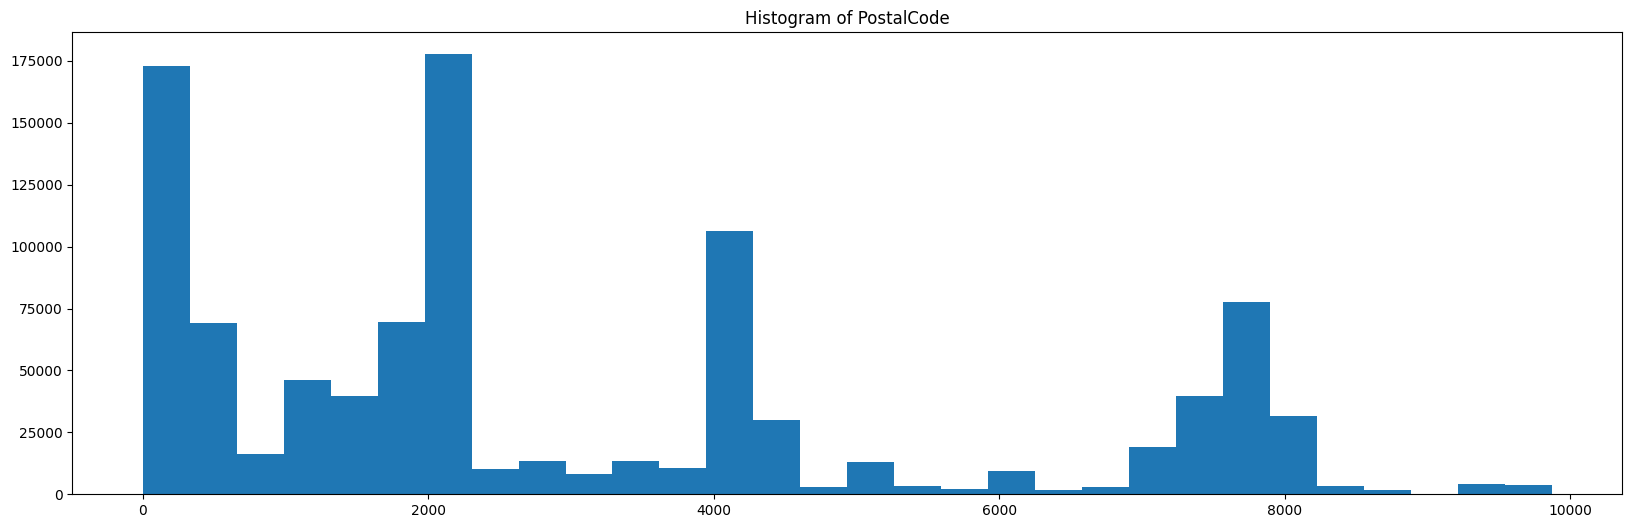

mmcode
60058419.0    186087
60058418.0    165845
60058415.0    137242
60058407.0     99444
60056925.0     79525
               ...  
28515240.0         1
44095010.0         1
44048140.0         1
25060600.0         1
26550260.0         1
Name: count, Length: 428, dtype: int64


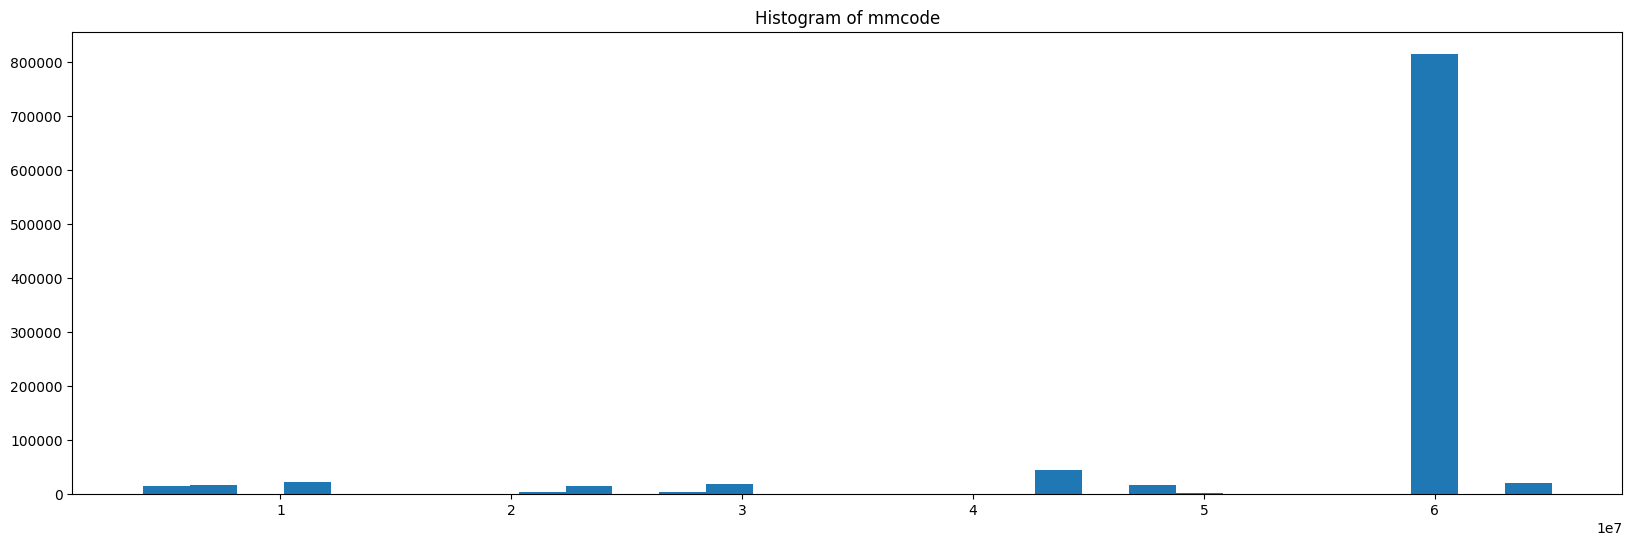

RegistrationYear
2014    155889
2012    130884
2013    117064
2008    106008
2010     95579
2011     88765
2007     82514
2009     72168
2006     45111
2005     30901
2015     27589
2004     16956
2003     10756
2002      6574
2001      5858
1999      1862
2000      1740
1998      1465
1997      1045
1996       867
1995       446
1994        52
1987         3
1992         1
1988         1
Name: count, dtype: int64


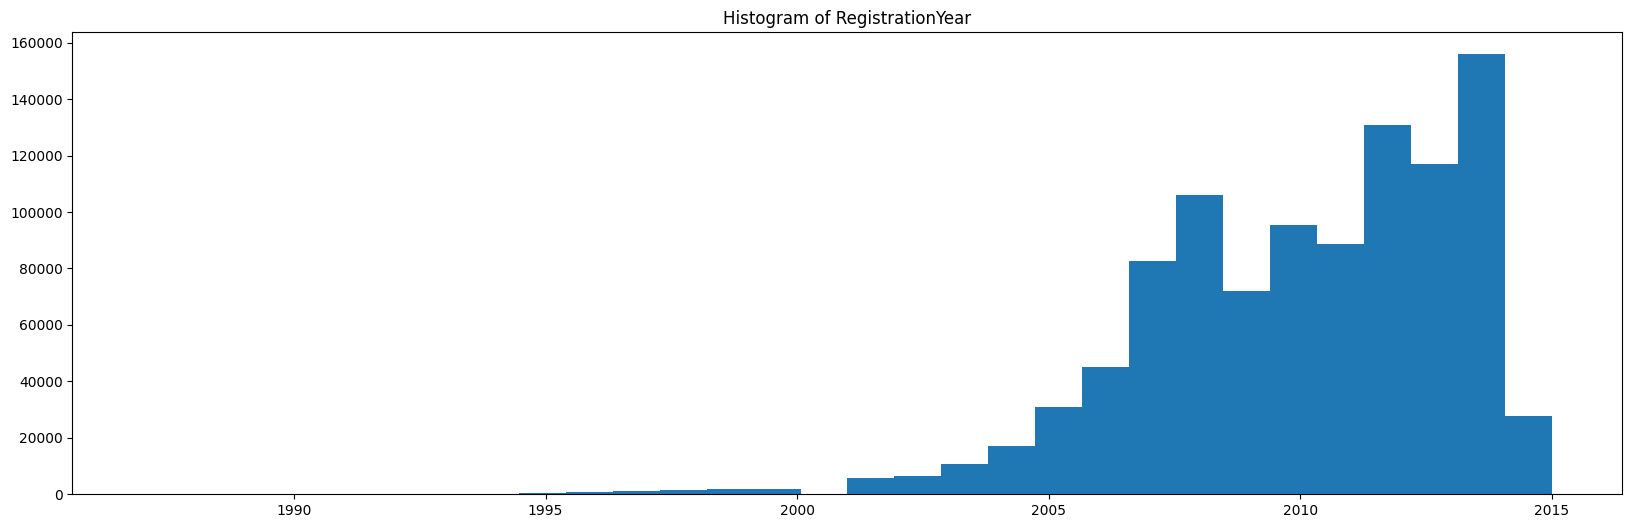

Cylinders
4.000000     965284
5.000000      20947
6.000000      11982
8.000000        698
4.046642        552
0.000000        338
3.000000        216
10.000000        81
Name: count, dtype: int64


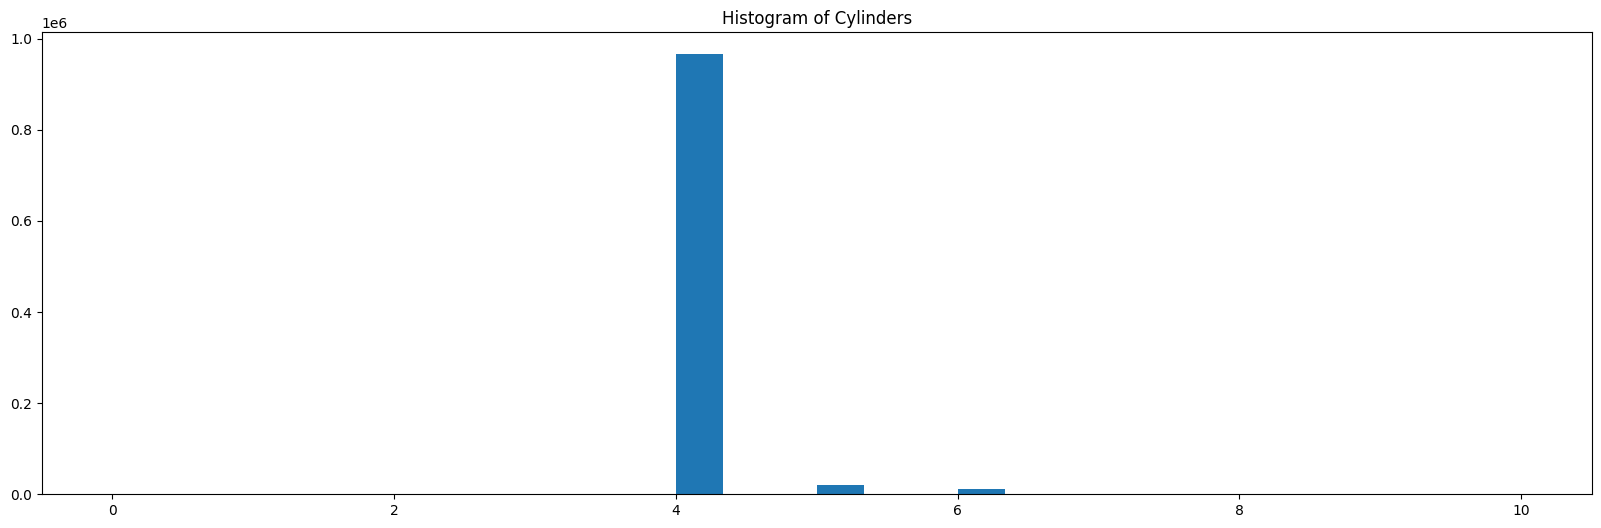

cubiccapacity
2694.0    497056
2237.0    177976
2494.0    140287
1495.0     18693
2148.0     14722
           ...  
2350.0         1
1996.0         1
1197.0         1
1392.0         1
1834.0         1
Name: count, Length: 123, dtype: int64


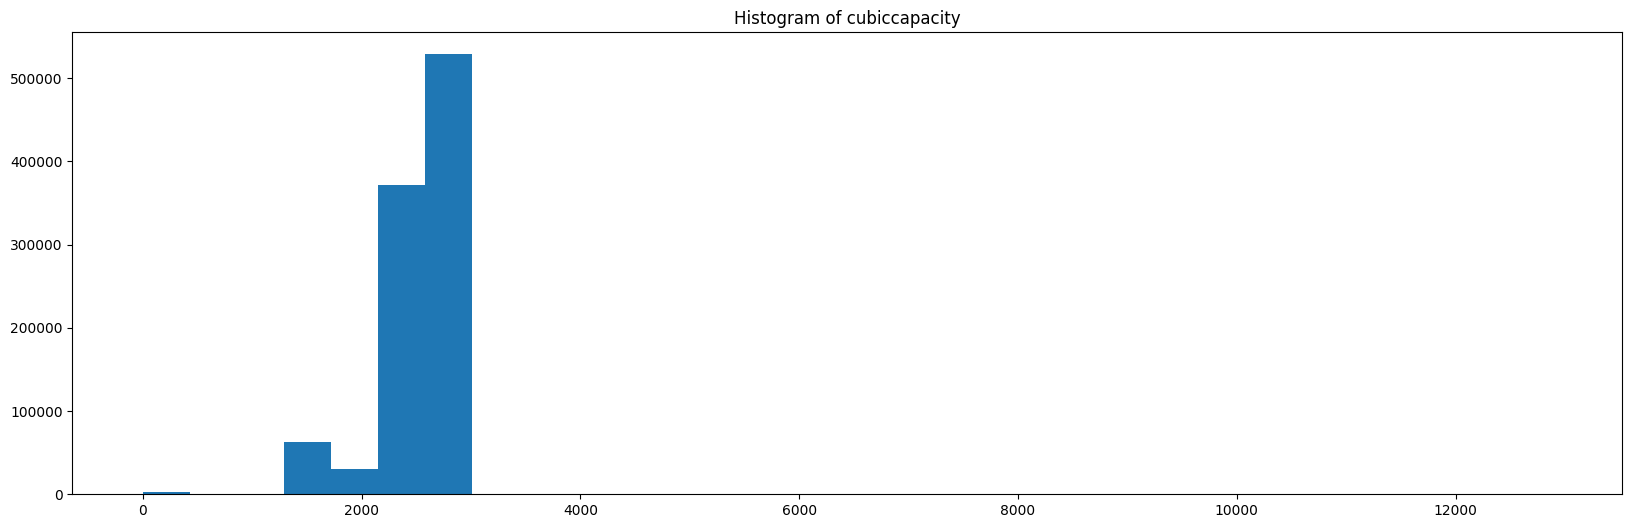

kilowatts
111.0    496946
75.0     261777
76.0      67185
80.0      19782
110.0     18505
          ...  
121.0         1
141.0         1
52.0          1
173.0         1
86.0          1
Name: count, Length: 83, dtype: int64


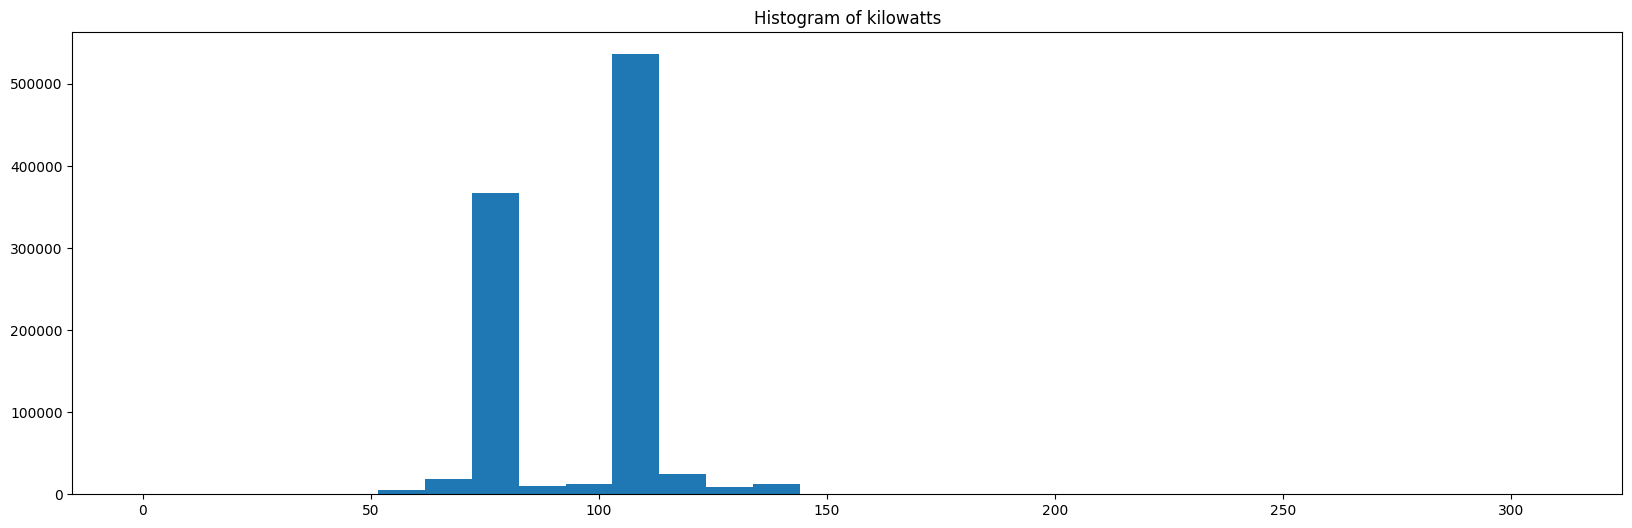

NumberOfDoors
4.00000    892838
5.00000     76599
2.00000     26055
0.00000      1995
6.00000      1597
4.01925       552
3.00000       462
Name: count, dtype: int64


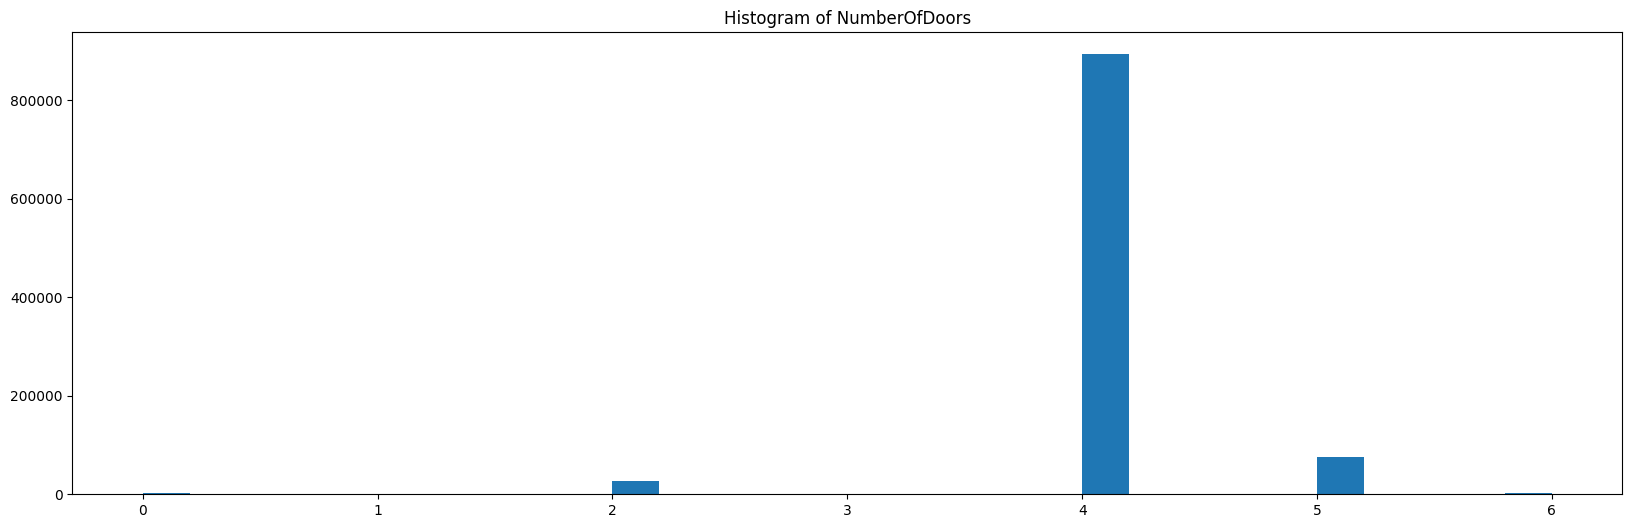

CustomValueEstimate
225531.129942    779642
250000.000000      4401
280000.000000      4398
140000.000000      4311
200000.000000      3937
                  ...  
276900.000000         8
119200.000000         1
108100.000000         1
83200.000000          1
86100.000000          1
Name: count, Length: 924, dtype: int64


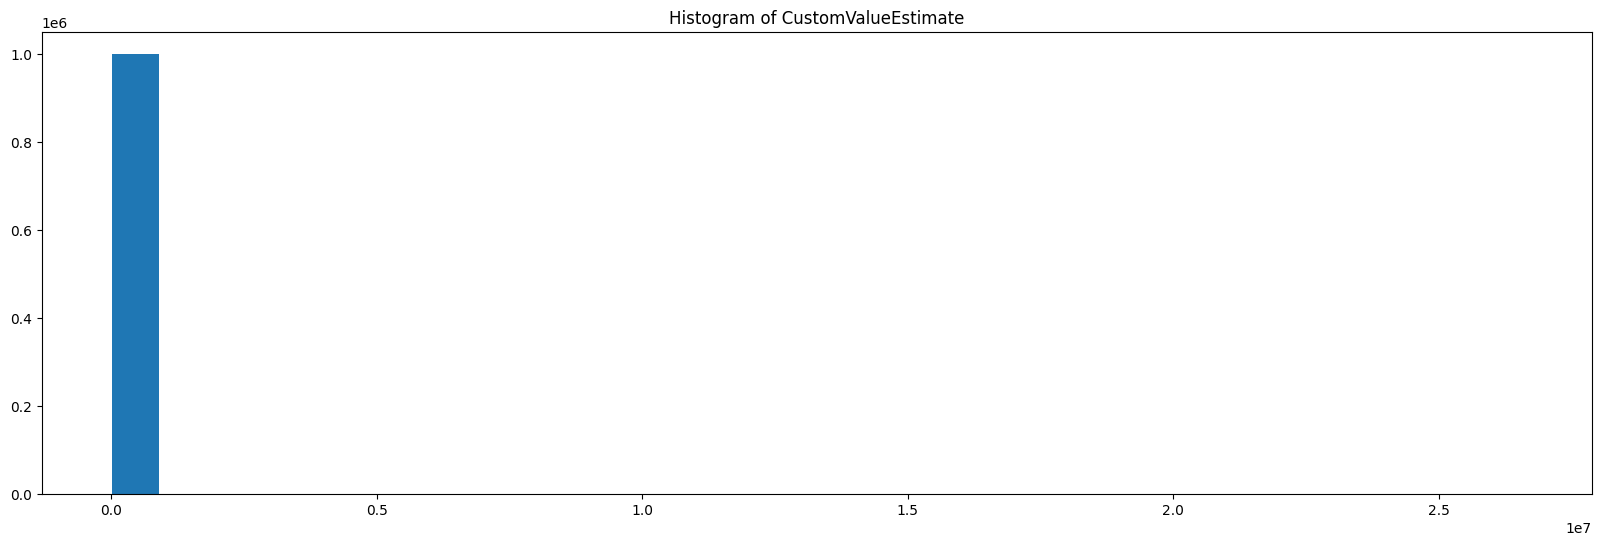

SumInsured
7500.00       262599
0.01          107597
5000000.00    104042
500000.00     102921
5000.00       102508
               ...  
269600.00          1
285912.00          1
177450.00          1
324990.00          1
110250.00          1
Name: count, Length: 2186, dtype: int64


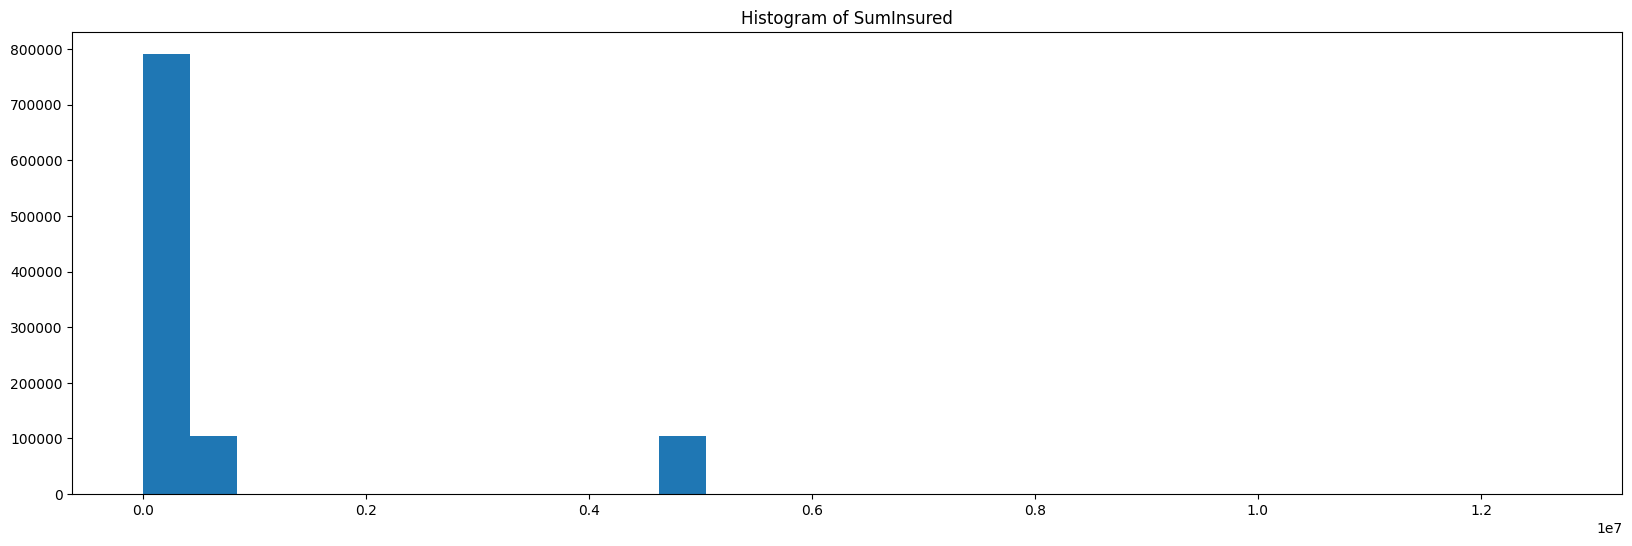

CalculatedPremiumPerTerm
25.0000     81499
85.0000     59987
90.0000     53581
50.0000     27508
18.0000     25188
            ...  
325.6943        1
406.6088        1
343.5129        1
624.3986        1
5.3887          1
Name: count, Length: 19869, dtype: int64


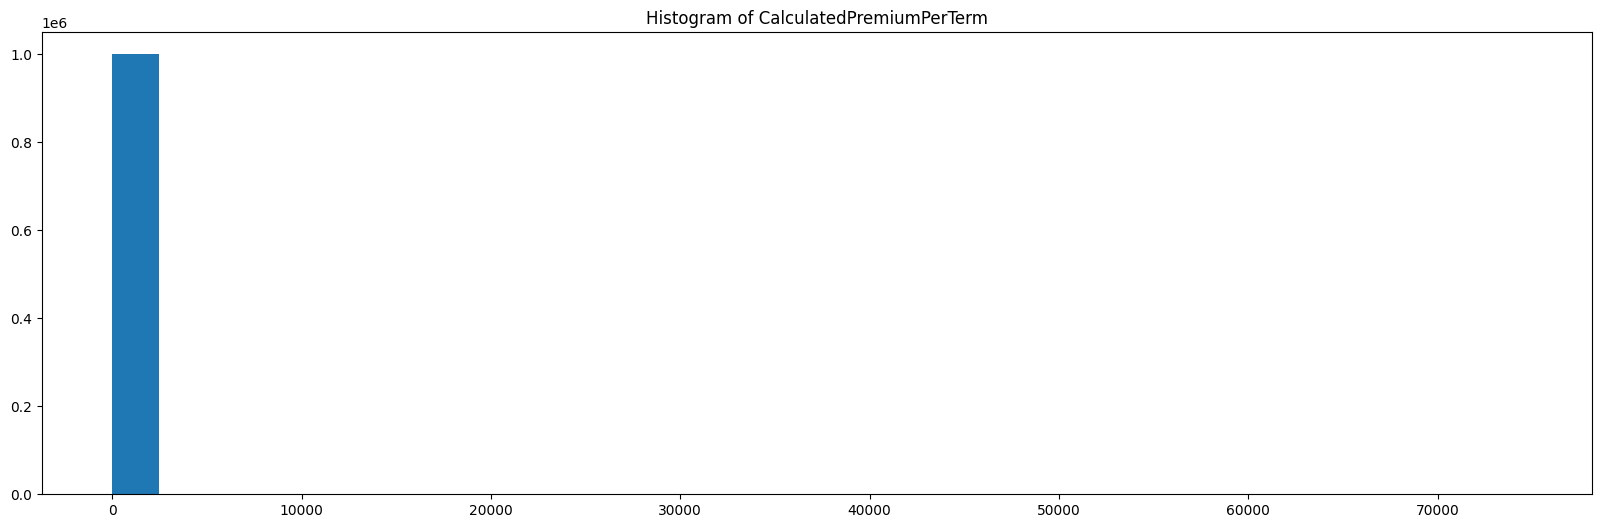

TotalPremium
0.000000      381634
21.929825      49731
74.561404      34382
78.947368      30400
43.859649      16919
               ...  
102.947953         1
7.970164           1
526.759355         1
458.051613         1
35.332316          1
Name: count, Length: 38959, dtype: int64


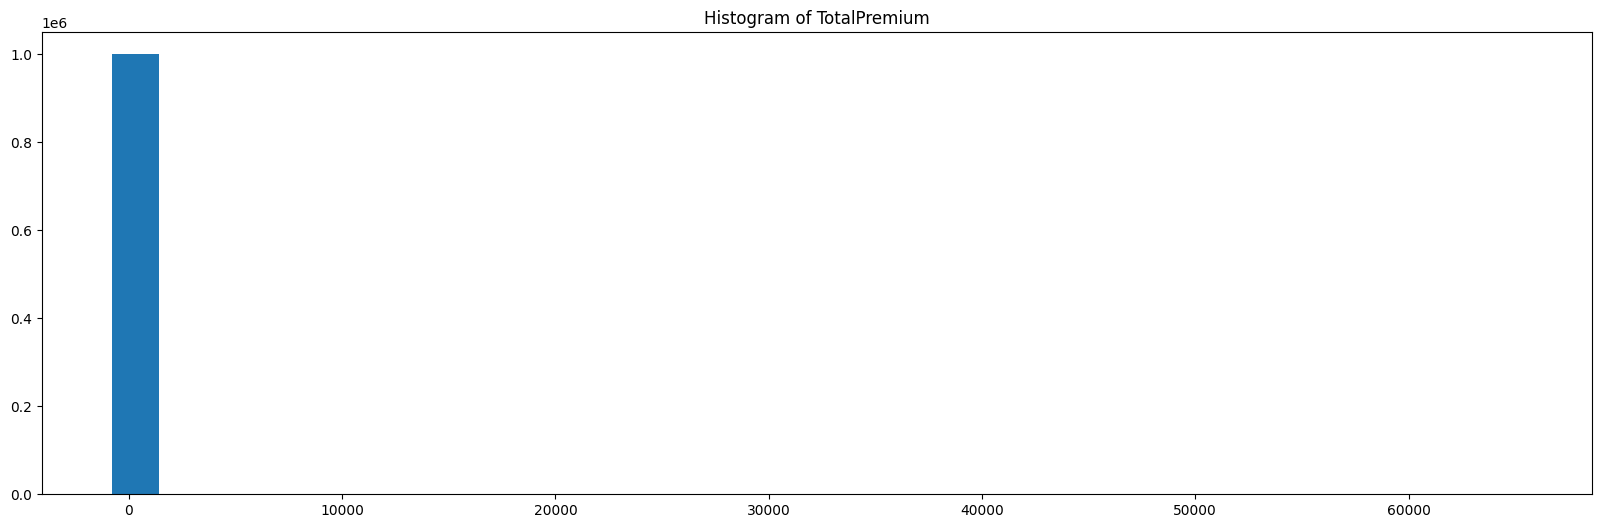

TotalClaims
0.000000        997305
6140.350877        326
750.649123         101
1300.000000         59
850.000000          51
                 ...  
15544.736842         1
37094.973684         1
2156.701754          1
14867.500000         1
74967.017544         1
Name: count, Length: 1615, dtype: int64


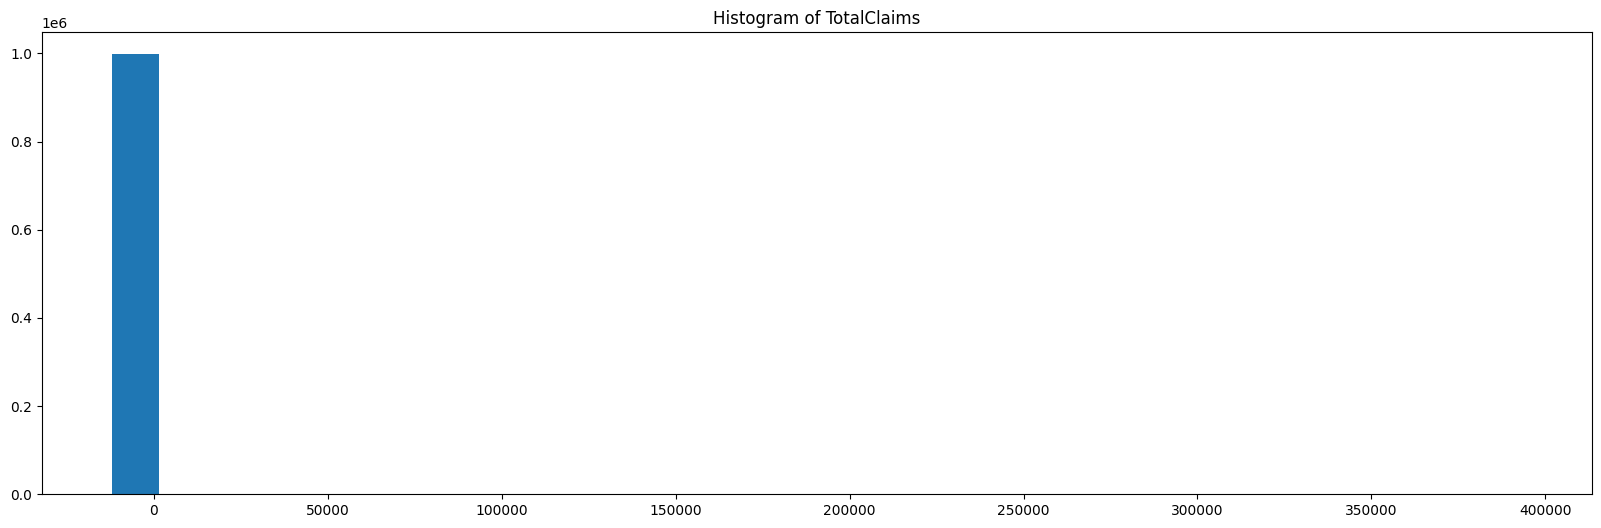

In [13]:
for column in insurance_data.select_dtypes(include='number').columns:
        print(insurance_data[column].value_counts())
        plt.figure(figsize=(20,6))
        plt.hist(insurance_data[column], bins=30)
        plt.title(f"Histogram of {column}")
        plt.show()


#### Bar charts for categorical

TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
2015-05-01 00:00:00     99898
2015-04-01 00:00:00     96563
2015-03-01 00:00:00     92015
2015-02-01 00:00:00     83198
2015-01-01 00:00:00     71576
2014-12-01 00:00:00     62457
2014-11-01 00:00:00     48248
2014-10-01 00:00:00     33820
2014-09-01 00:00:00     25990
2014-08-01 00:00:00     19626
2014-07-01 00:00:00     14907
2014-06-01 00:00:00     11822
2014-05-01 00:00:00      9484
2014-04-01 00:00:00      6919
2014-03-01 00:00:00      3466
2014-02-01 00:00:00      2062
2014-01-01 00:00:00      1827
2013-12-01 00:00:00      1495
2013-11-01 00:00:00      1196
2013-10-01 00:00:00        45
Name: count, dtype: int64


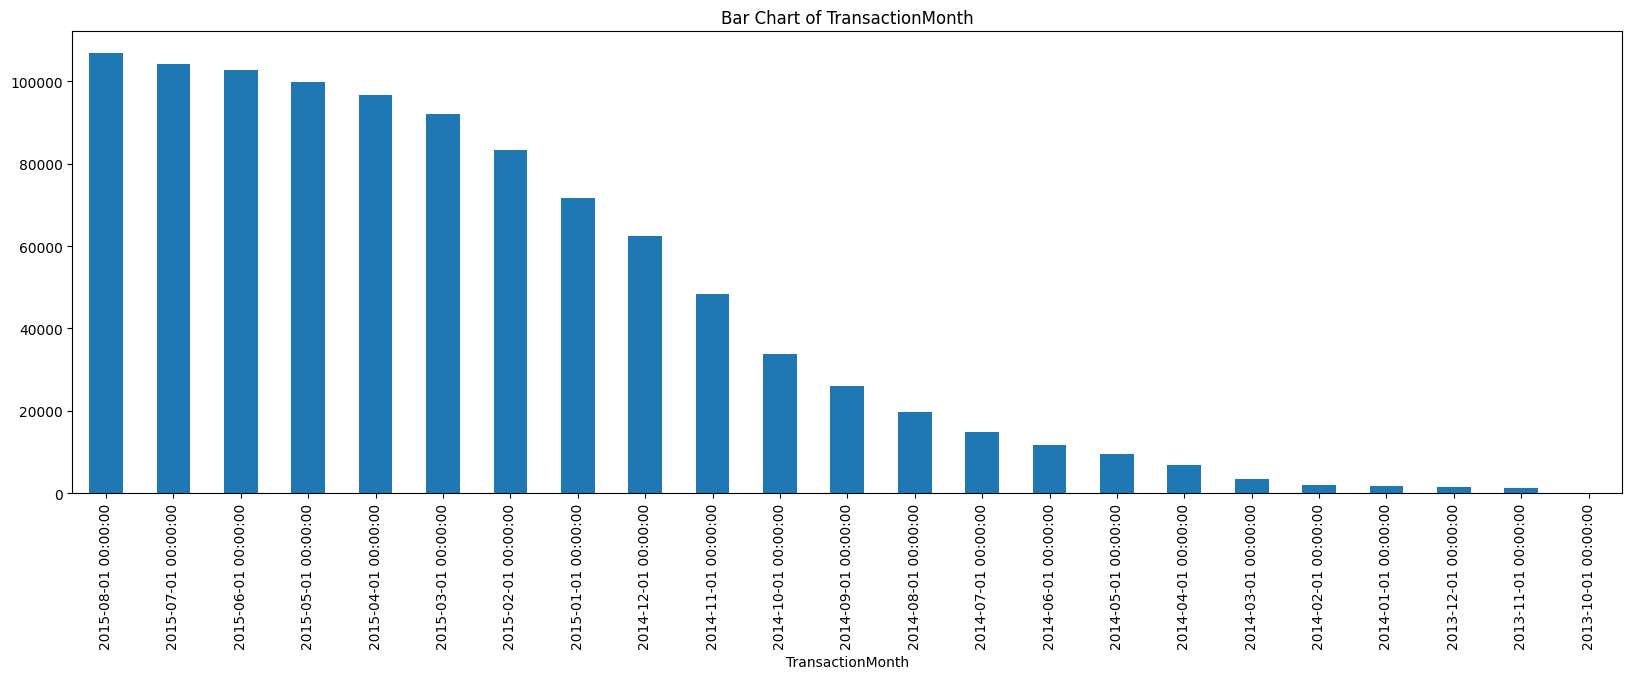

Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64


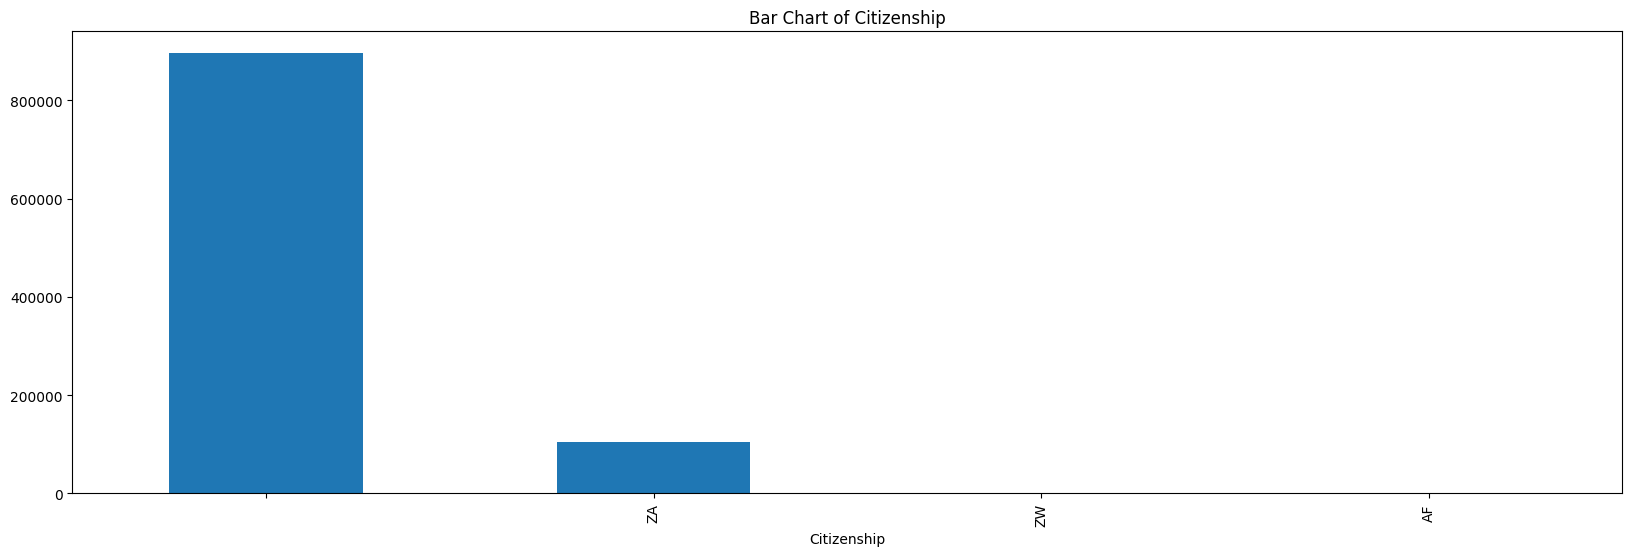

LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64


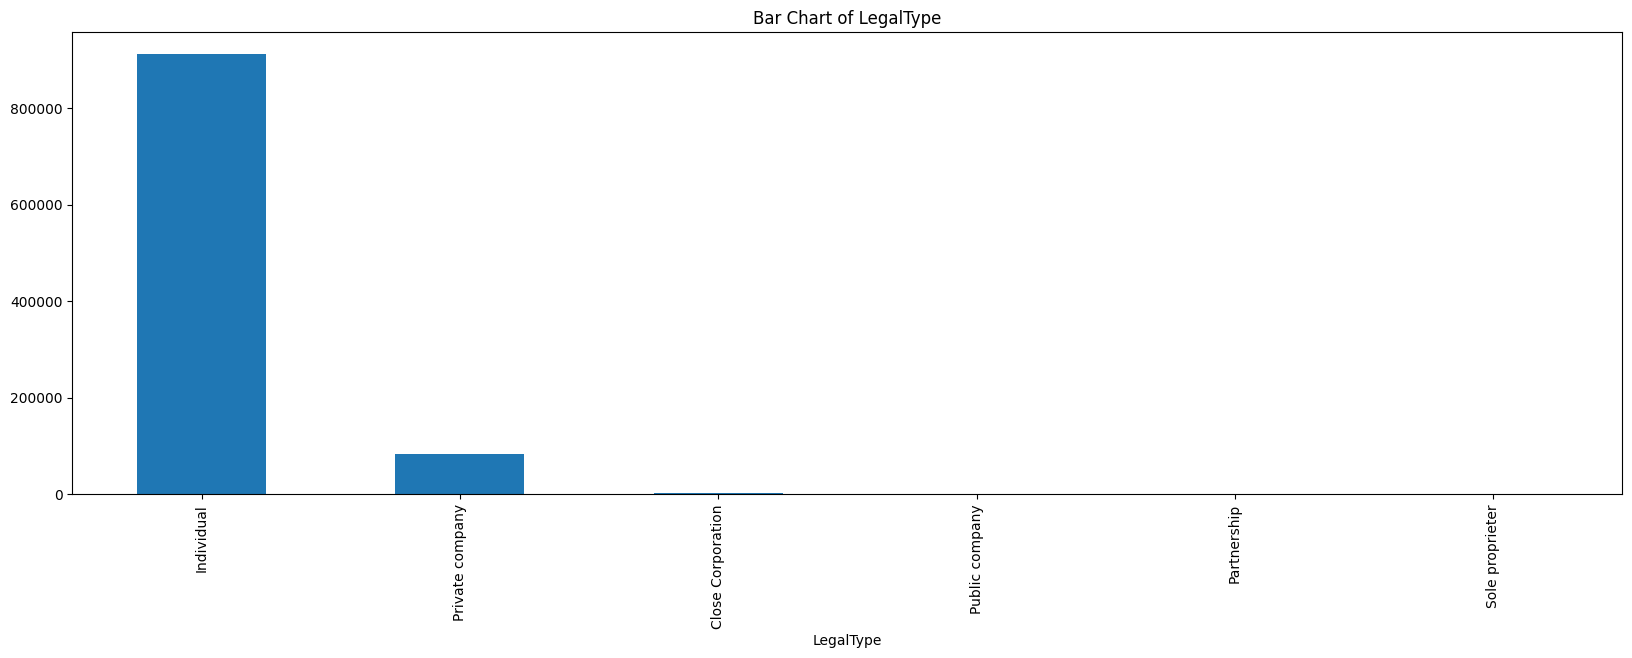

Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64


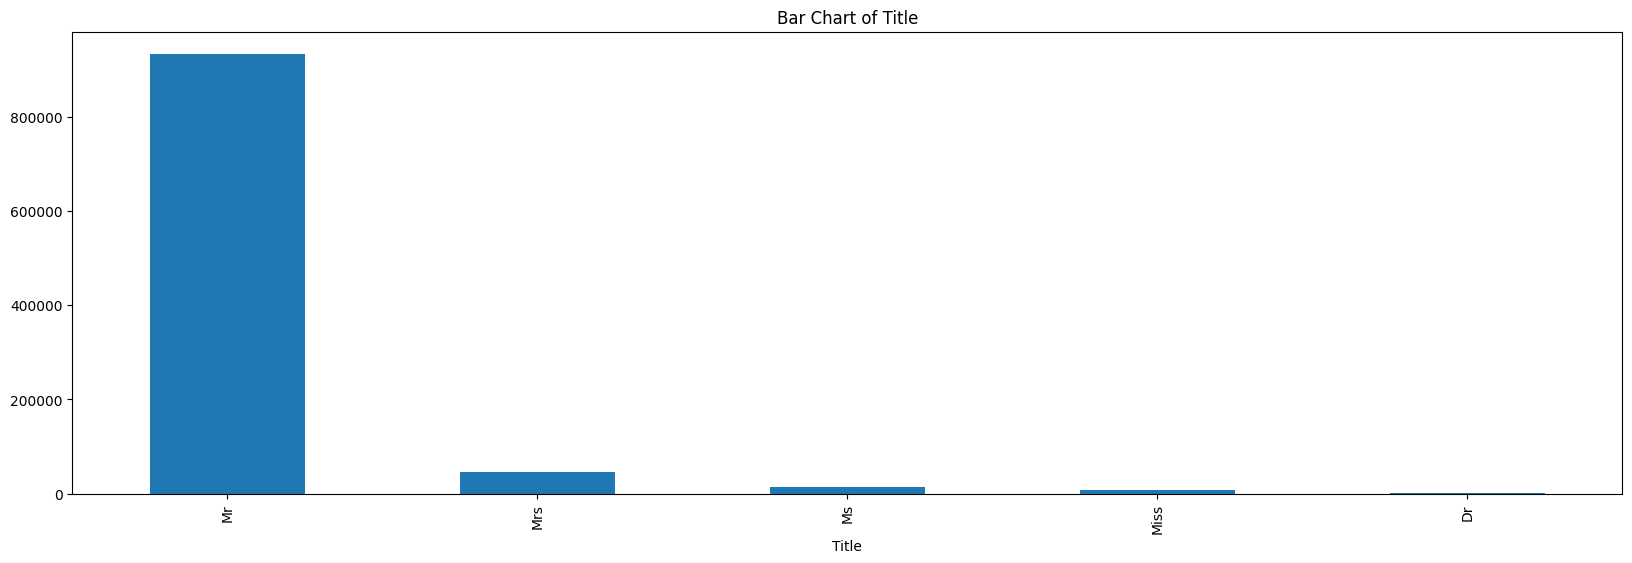

Language
English    1000098
Name: count, dtype: int64


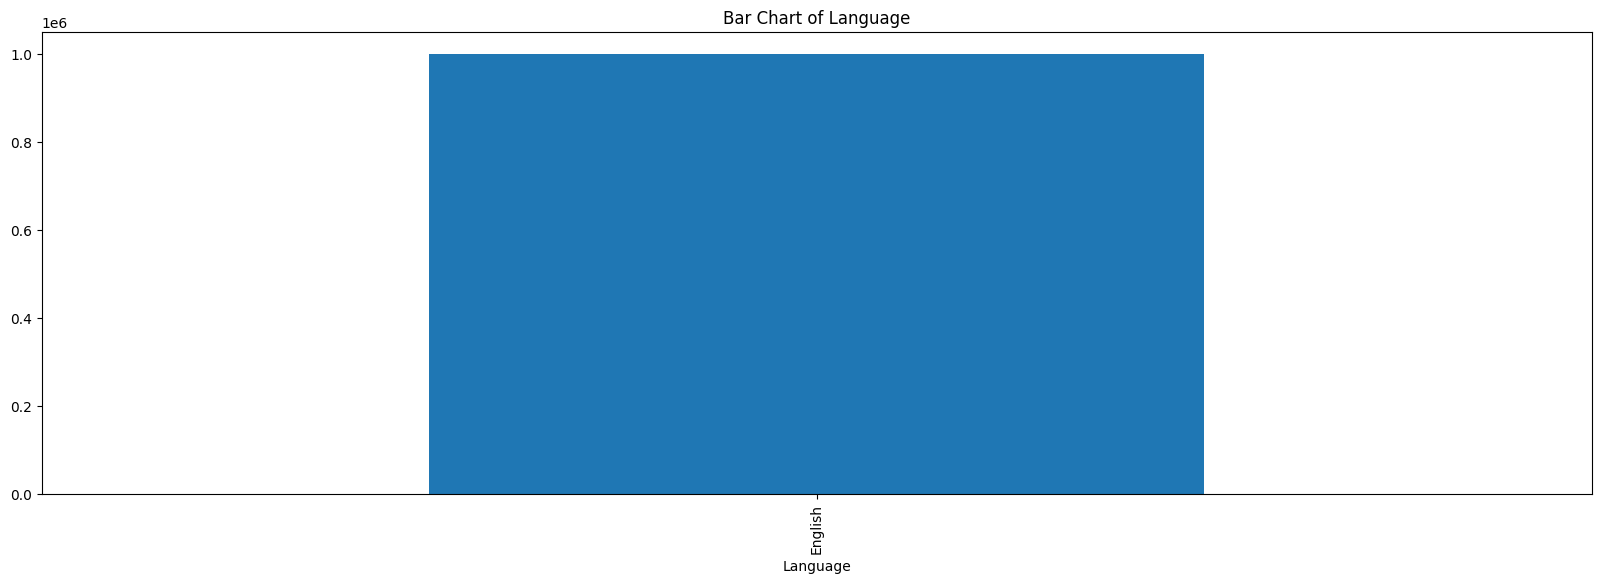

Bank
First National Bank       406772
ABSA Bank                 204954
Standard Bank             181715
Nedbank                   132003
Capitec Bank               58155
RMB Private Bank           12576
Ithala Bank                 1730
Investec Bank                732
Old Mutual                   688
FirstRand Bank               638
Mercantile Lisbon Bank       135
Name: count, dtype: int64


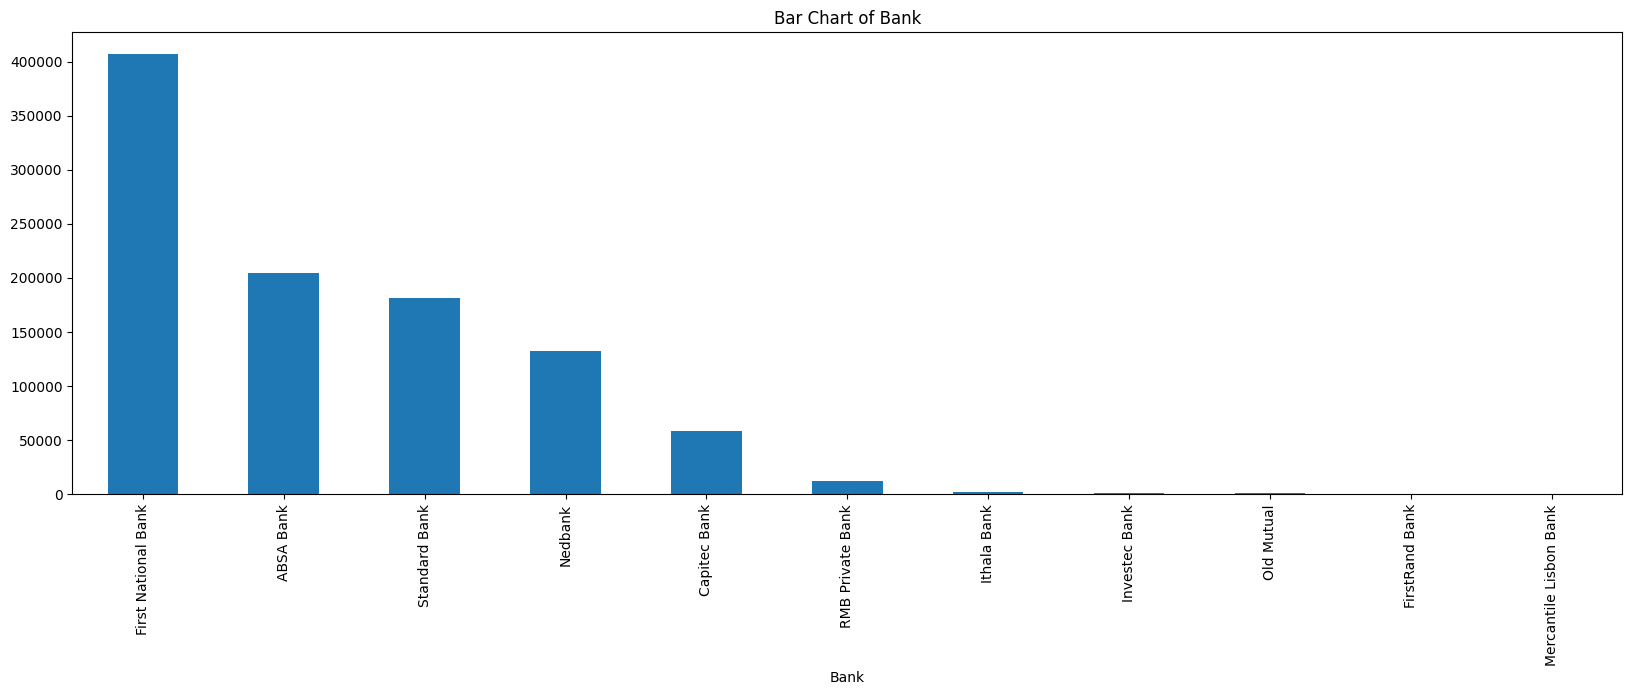

AccountType
Current account         638170
Savings account         358207
Transmission account      3721
Name: count, dtype: int64


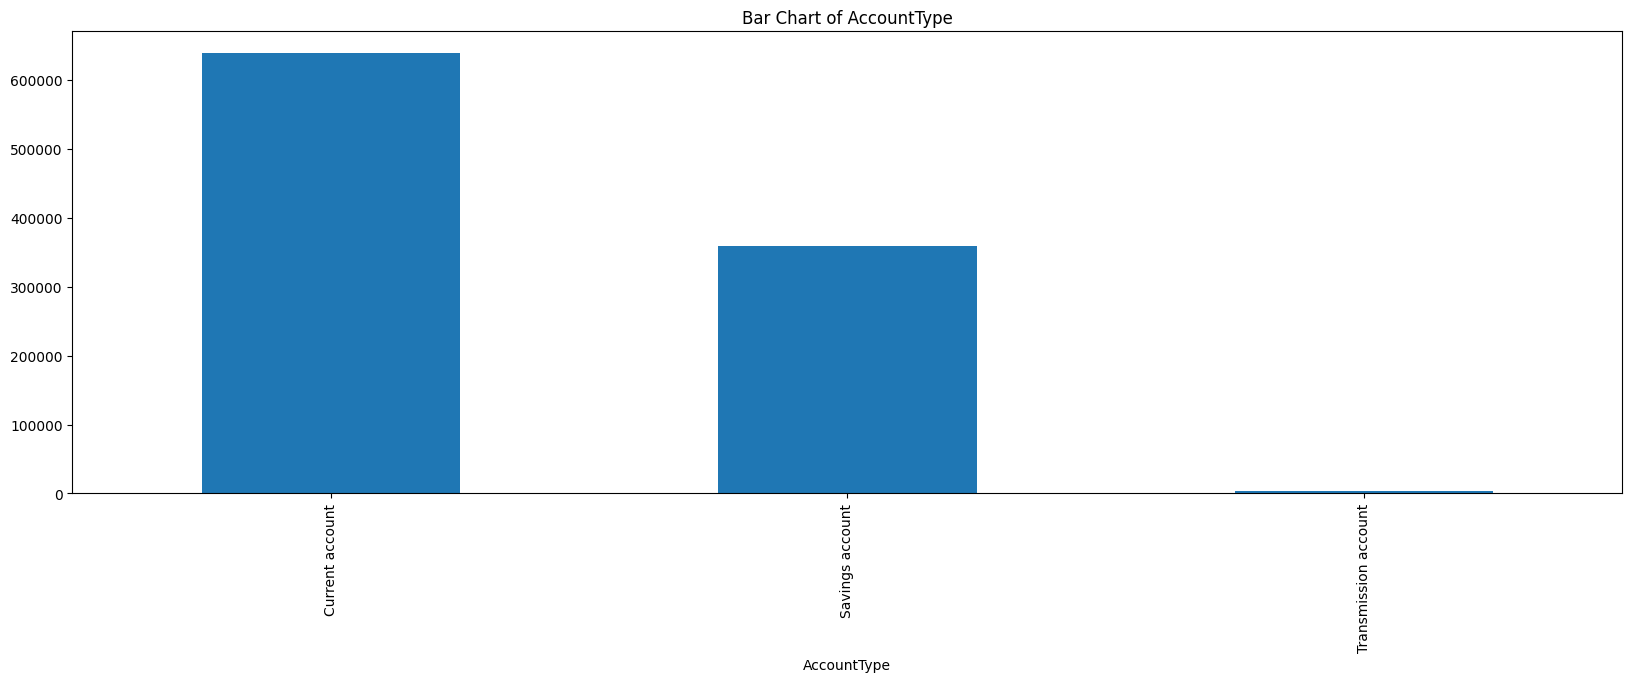

MaritalStatus
Not specified    994467
Single             4254
Married            1377
Name: count, dtype: int64


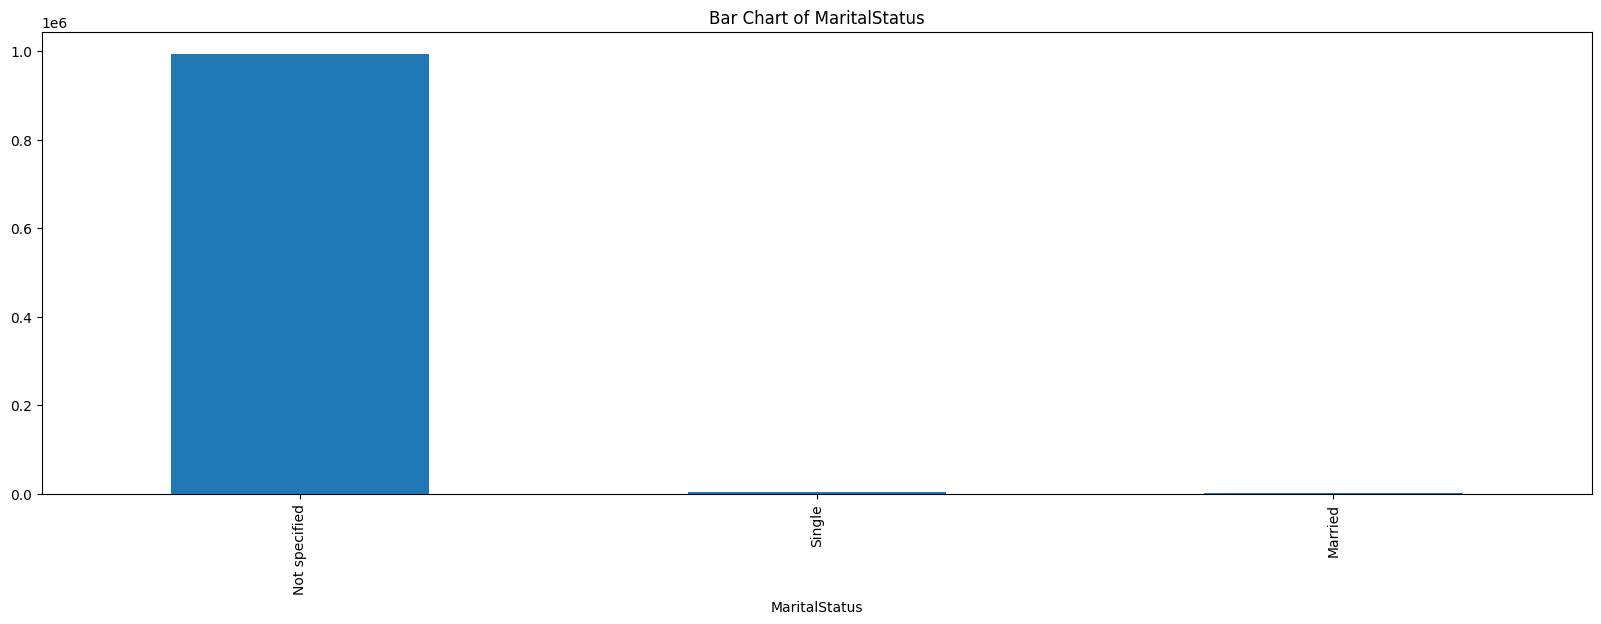

Gender
Not specified    950526
Male              42817
Female             6755
Name: count, dtype: int64


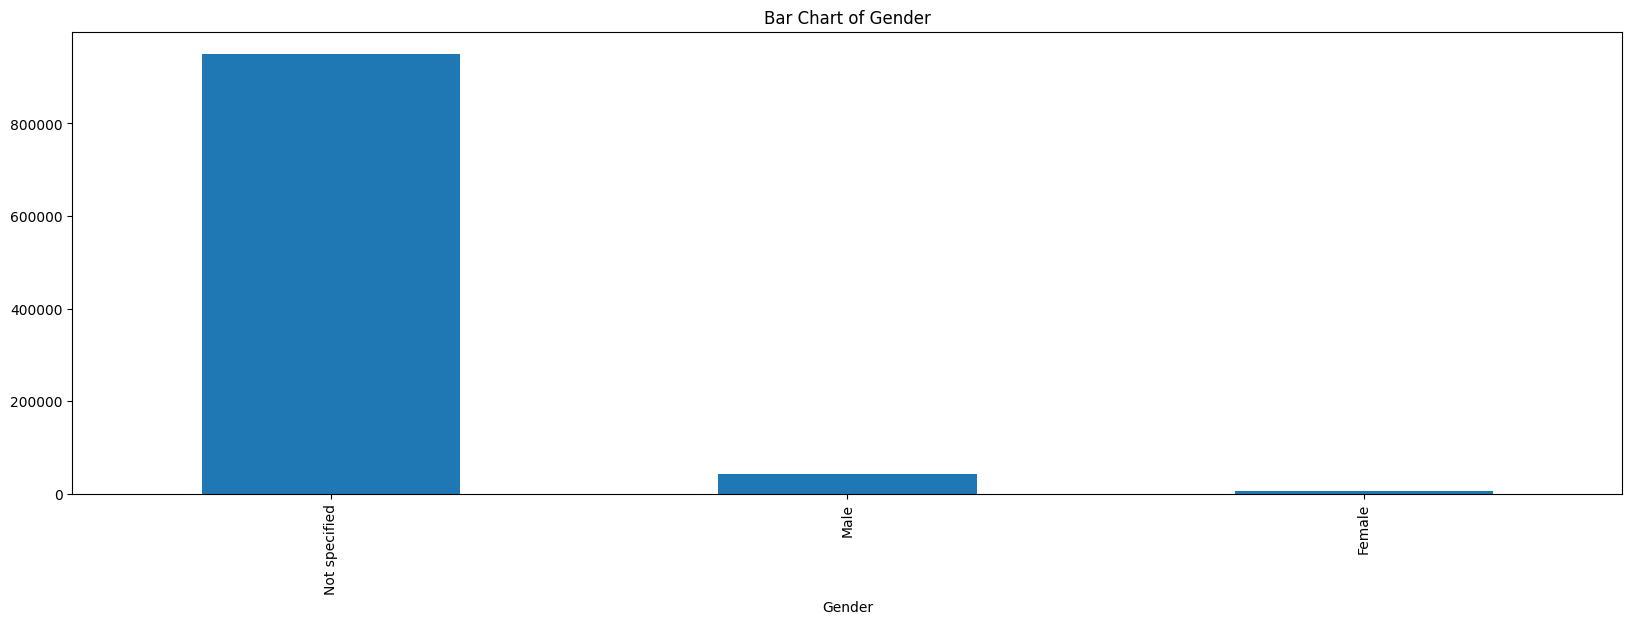

Country
South Africa    1000098
Name: count, dtype: int64


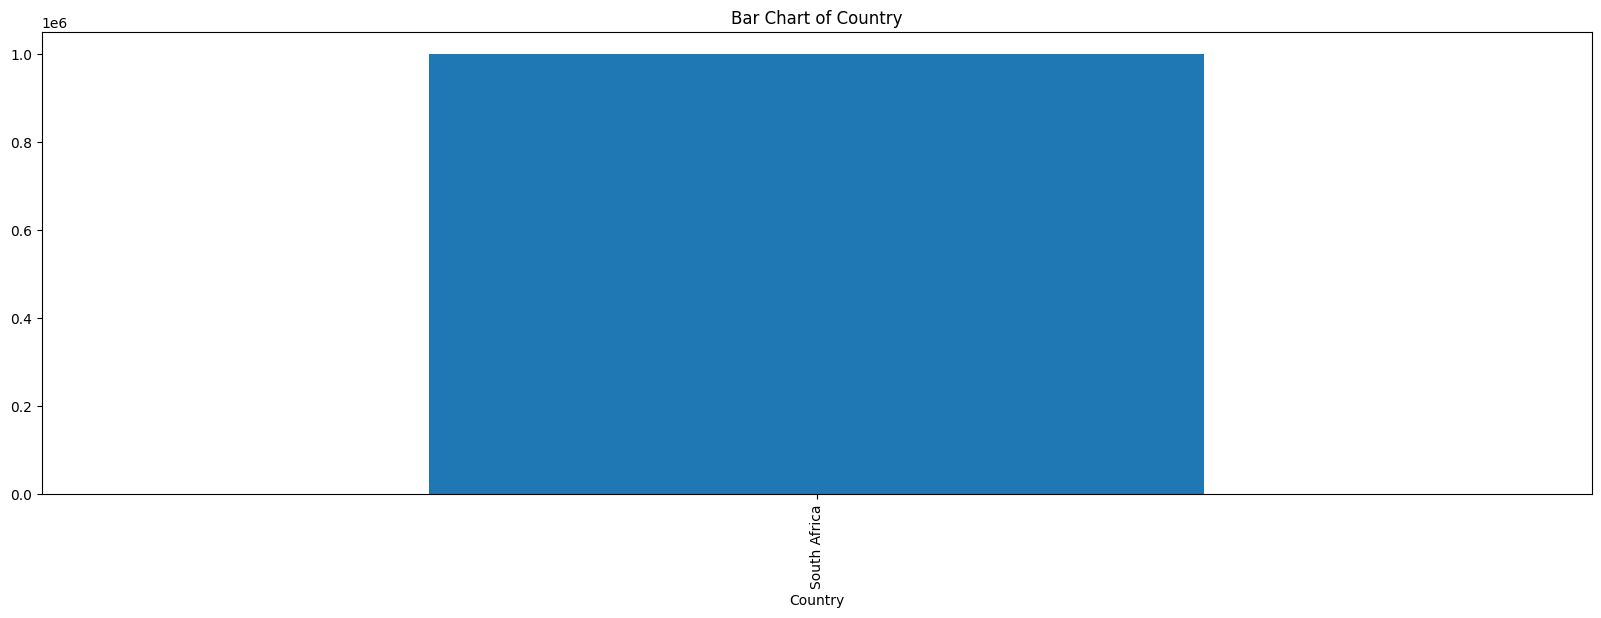

Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64


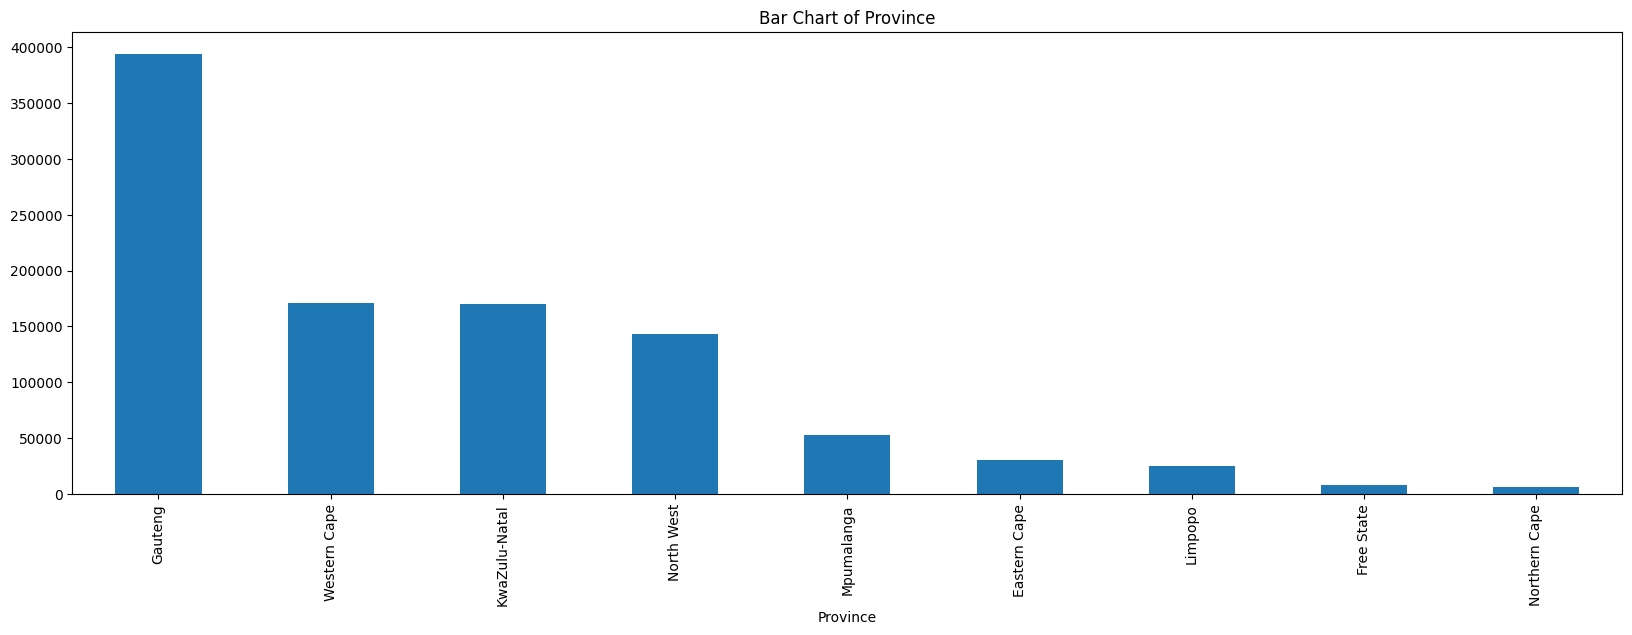

MainCrestaZone
Transvaal (all except Pretoria)                296187
Johannesburg                                   176020
Transvaal (Pretoria)                           100331
Cape Province (Cape Town)                       95936
Natal                                           88266
Natal (Durban)                                  82859
Karoo 1 (Northeast of Cape Town)                52732
Rand East                                       42168
Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1     20191
Cape Province (East and North of Cape Town)     19391
Oranje Free State                                8149
Cape Province                                    6701
East London                                      3961
Langkloof, Coast 2, Coast 1                      3009
Ciskei, Cape Mid 1                               2415
Port Elizabeth                                   1782
Name: count, dtype: int64


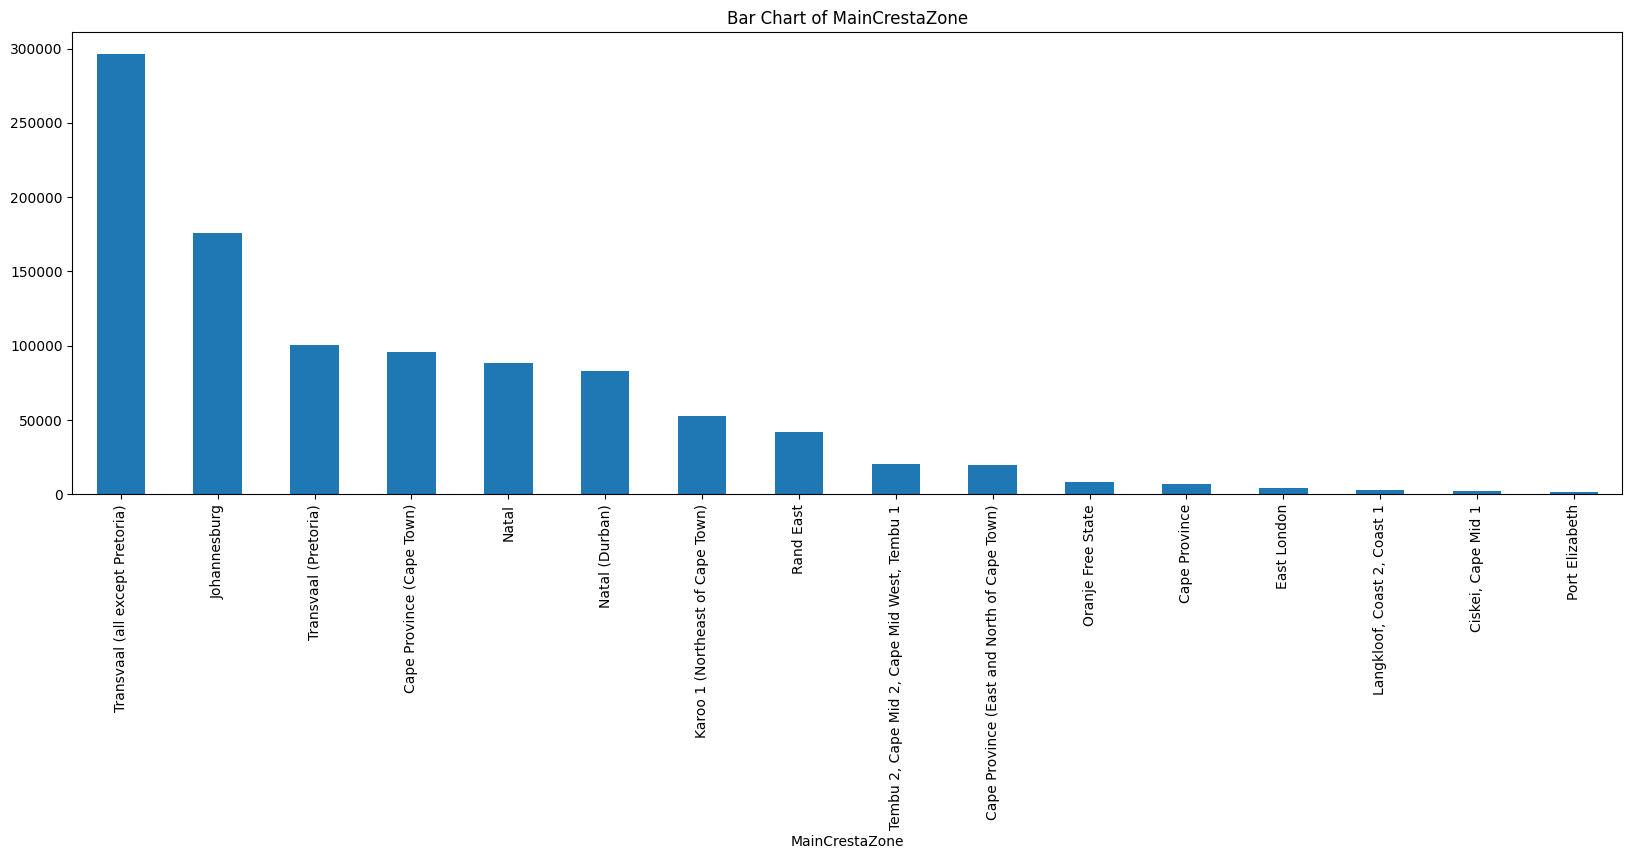

SubCrestaZone
Johannesburg            176020
Pretoria                100331
Cape Town                95936
Durban                   82859
Transvaal North          75141
Transvaal North West     72558
Northeast of CT          51386
Transvaal East           45729
Transvaal South          45571
Rand East                42168
North Coast              30154
Rand West                22478
East and North of        19391
Bushveld                 19253
South Coast              17588
Natal 3                  16299
Zululand                  9810
Tembu 1                   9165
Cape Mid West             7210
Natal 2                   6846
Transvaal South East      5980
Transvaal Mid West        5105
Natal 1                   4842
East London               3961
Drakensberg               3768
Bloemfontein              3594
Tembu 2                   3413
Transvaal South West      3363
Kalahari                  2736
Coast 2                   2192
Vaalhartz                 1926
Ciskei                   

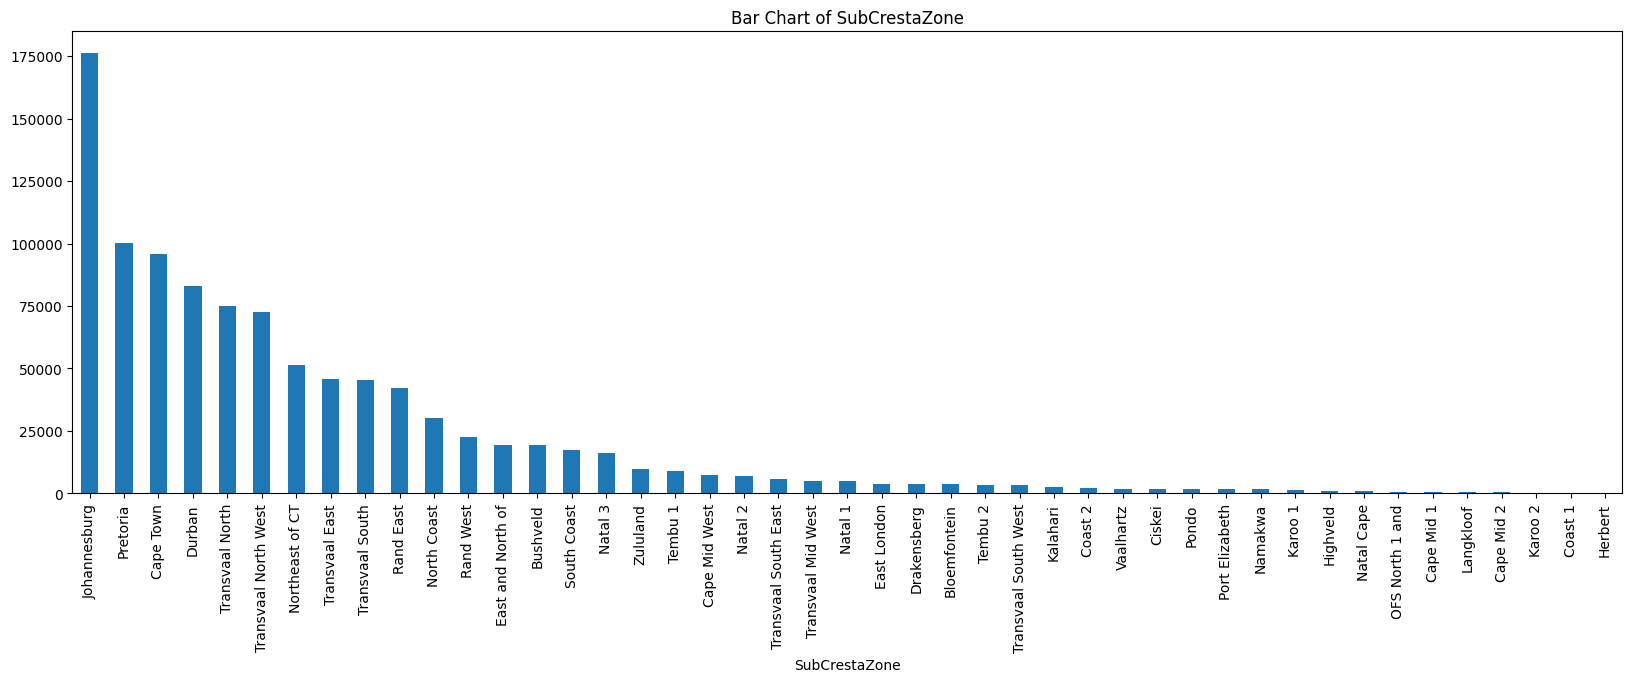

ItemType
Mobility - Motor    1000098
Name: count, dtype: int64


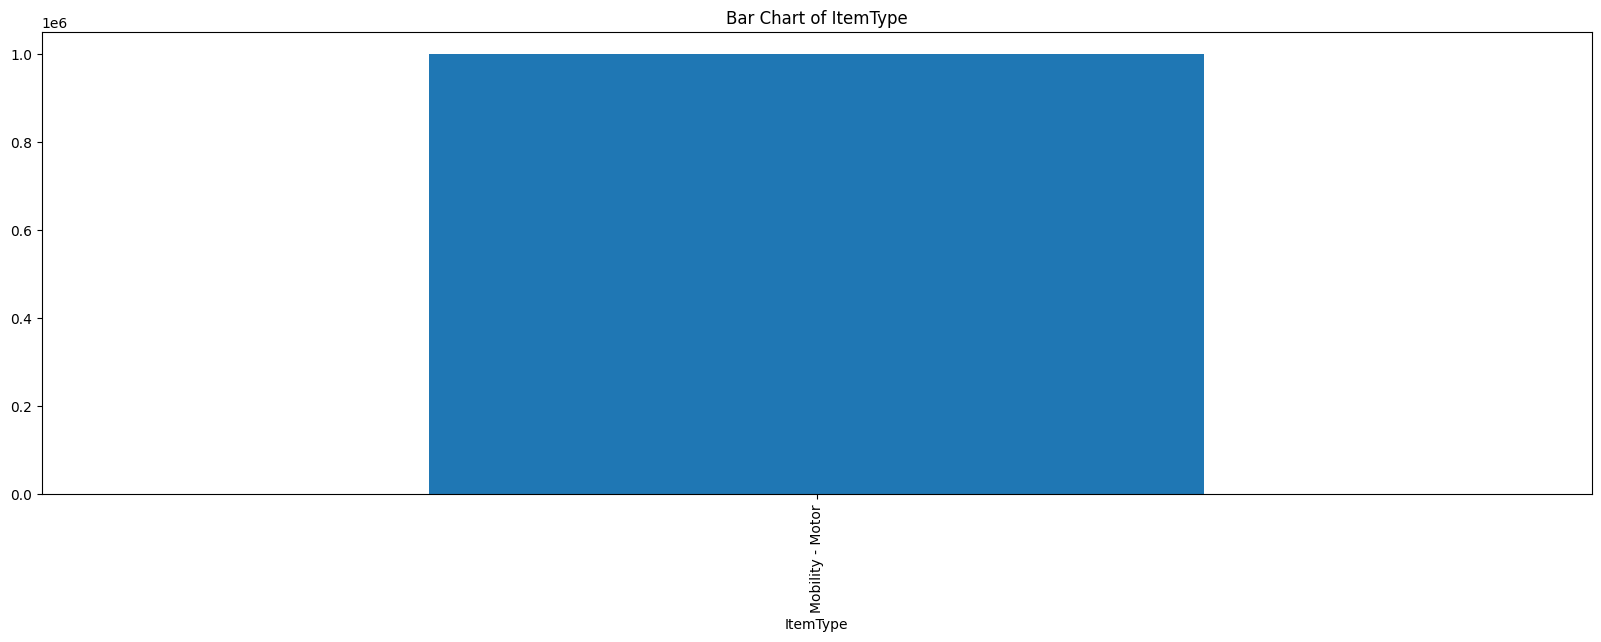

VehicleType
Passenger Vehicle    934150
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64


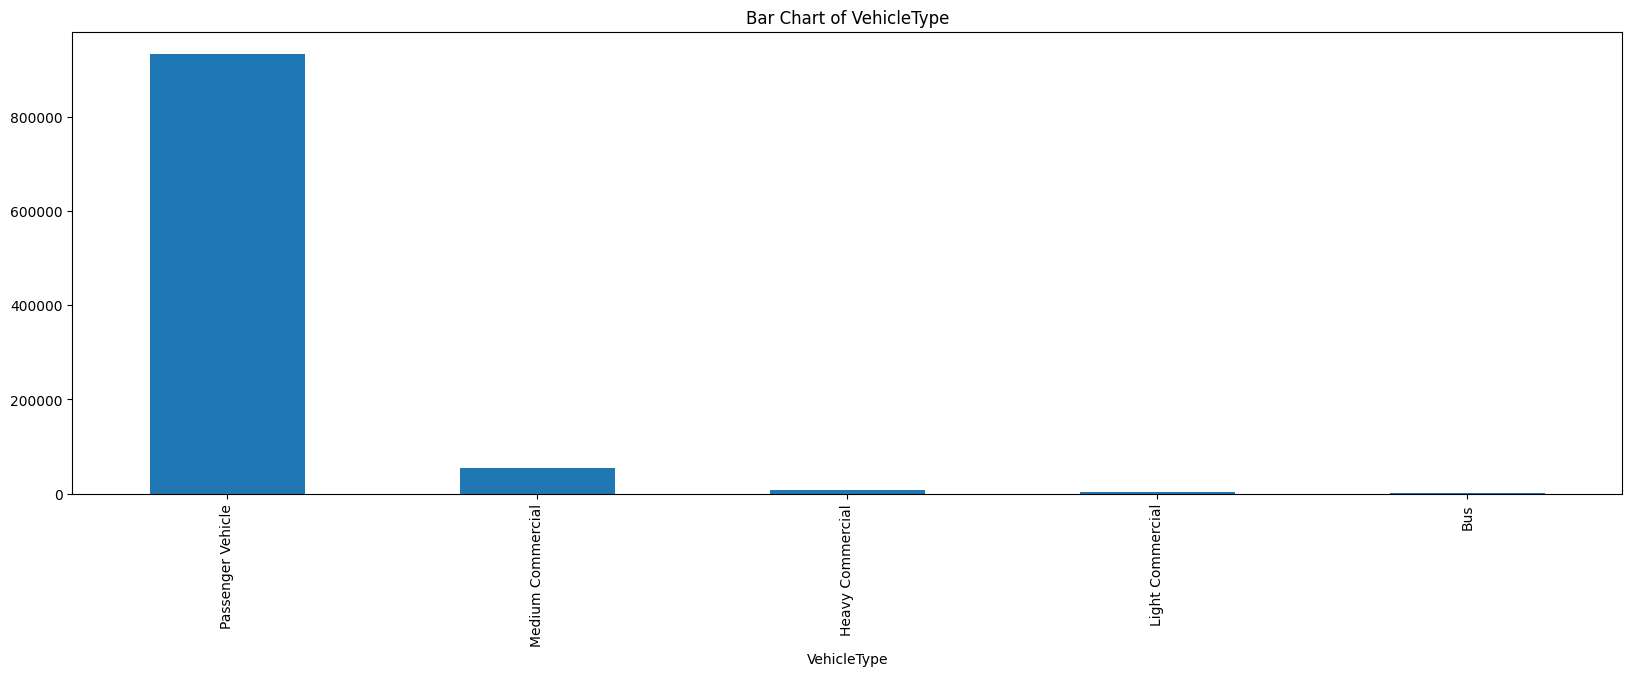

make
TOYOTA                                 813832
MERCEDES-BENZ                           41940
CMC                                     21624
VOLKSWAGEN                              20929
C.A.M                                   16171
GOLDEN JOURNEY                          14462
NISSAN/DATSUN                           10997
JINBEI                                  10374
IVECO                                    8430
AUDI                                     7407
NISSAN                                   5462
BMW                                      5317
FOTON                                    3482
MERCEDES-BENZ                            3131
HYUNDAI                                  2602
B.A.W                                    2160
HUMMER                                   1194
TOYOTA                                   1166
FIAT                                      984
POLARSUN                                  934
CHEVROLET                                 912
SAIC                         

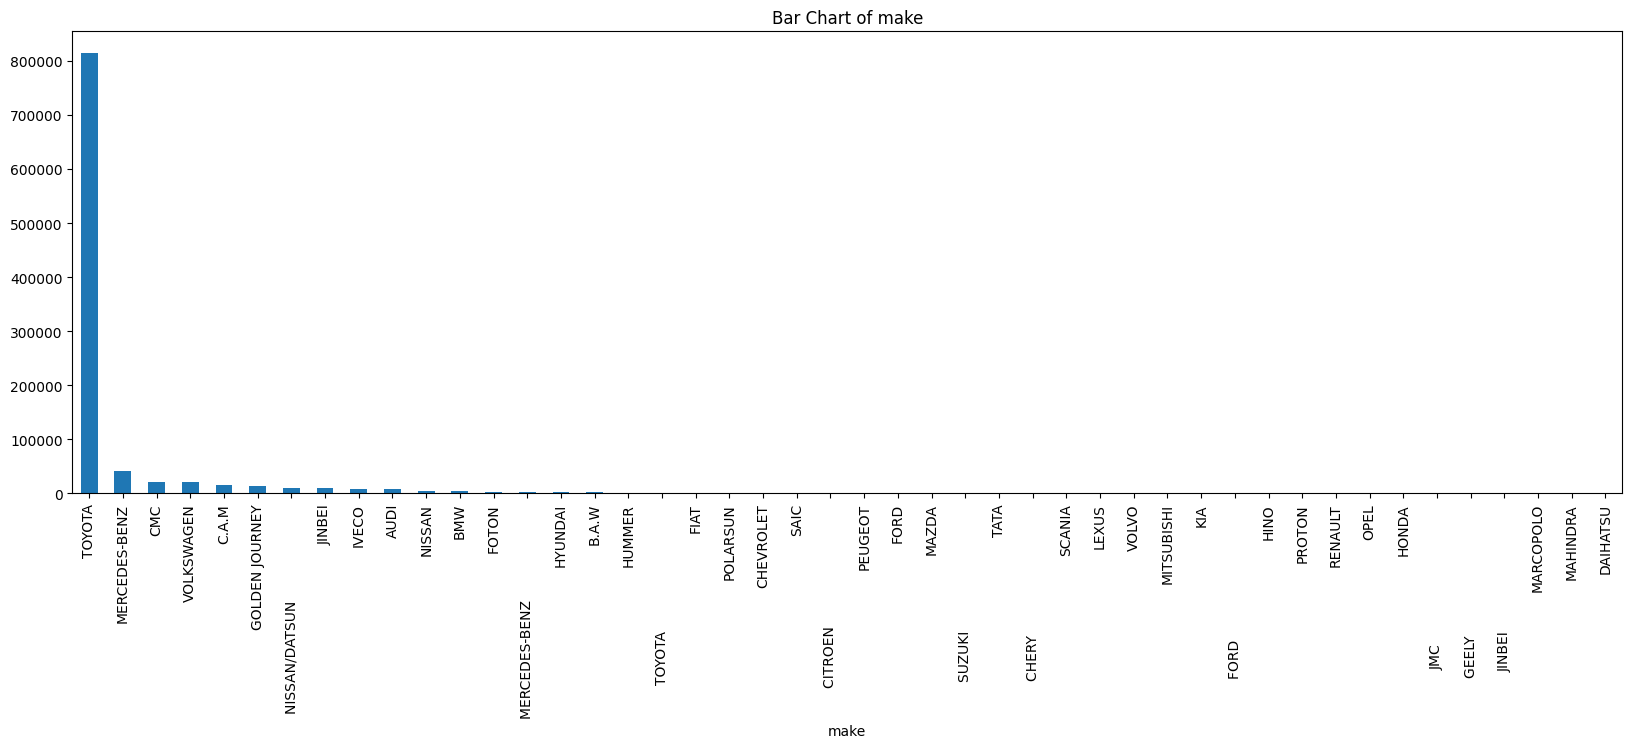

Model
QUANTUM 2.7 SESFIKILE 16s         186639
QUANTUM 2.7 SESFIKILE 15s         167523
QUANTUM 2.7 SESFIKILE 14s         137242
QUANTUM 2.5 D-4D SESFIKILE 16s     99444
HiACE SUPER 16 F/Lift              79525
                                   ...  
SENTRA 140                             1
VITO 112 CDI CREWBUS                   1
C180                                   1
BALLADE 180 E A/T                      1
ELANTRA 1.6 GLS                        1
Name: count, Length: 411, dtype: int64


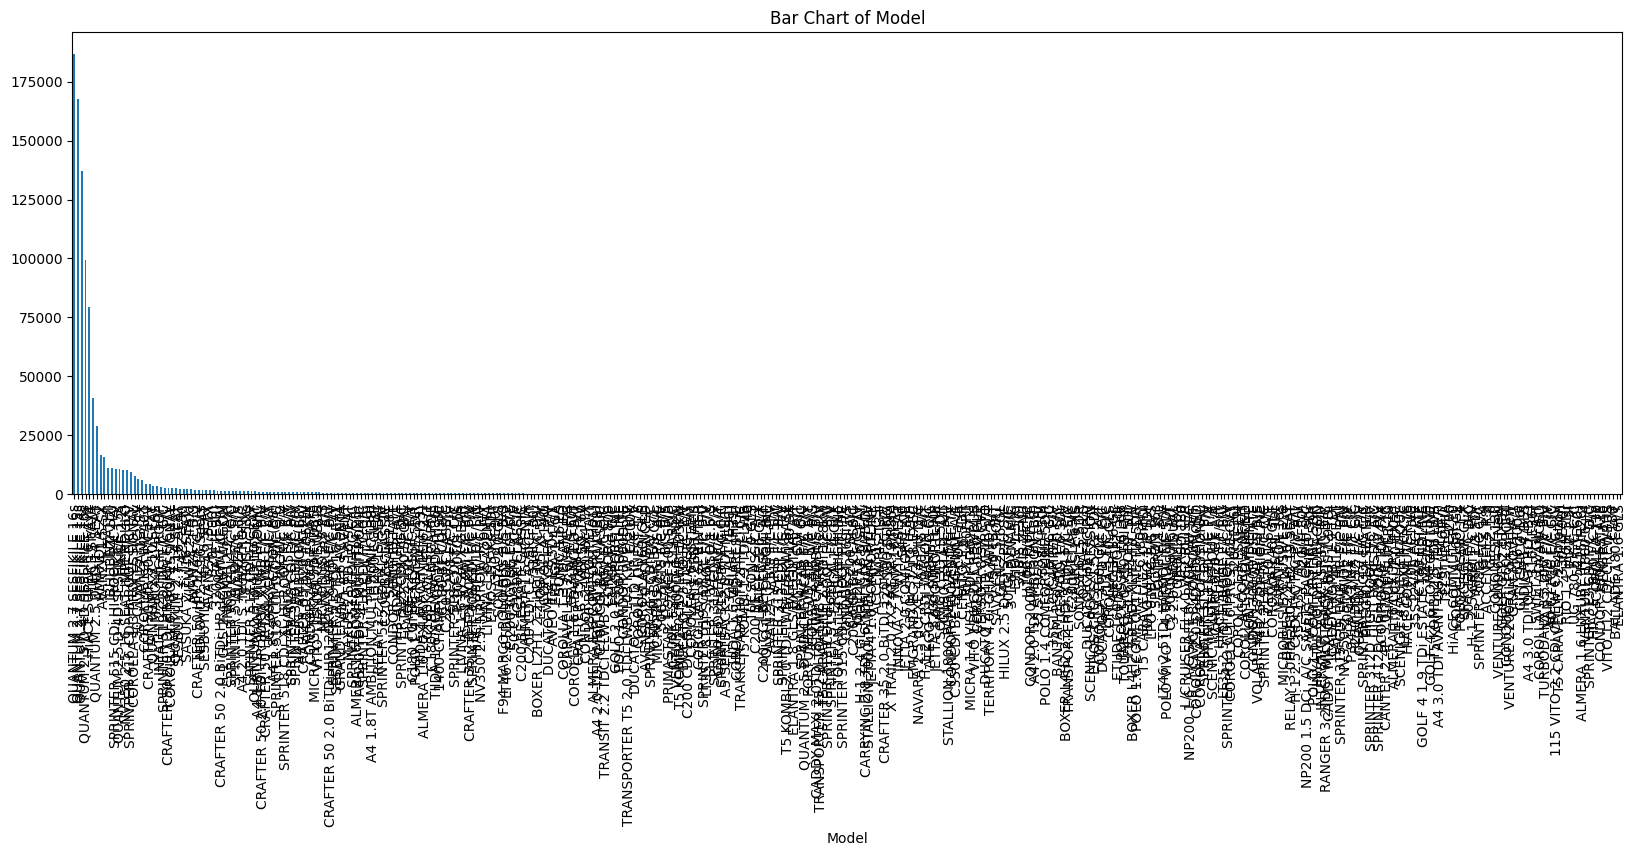

bodytype
B/S    844952
P/V     55034
S/D     41868
MPV     33842
C/C      8861
H/B      8400
S/W      3100
SUV      2049
S/C       880
C/P       644
CCL       216
D/C       132
D/S       120
Name: count, dtype: int64


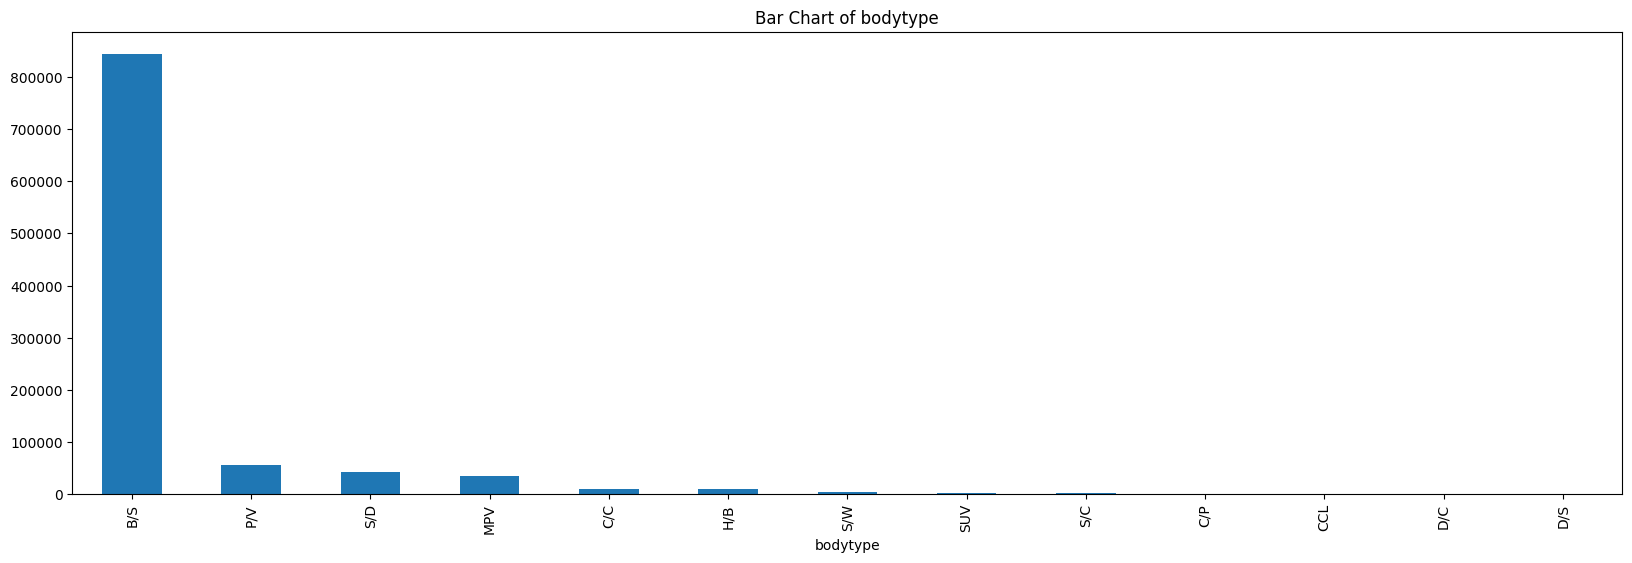

VehicleIntroDate
4/2012     288190
10/2010    176799
11/2007    137517
11/1992     80059
8/2001      41023
            ...  
4/1987          1
5/1992          1
3/2003          1
3/1994          1
8/1995          1
Name: count, Length: 174, dtype: int64


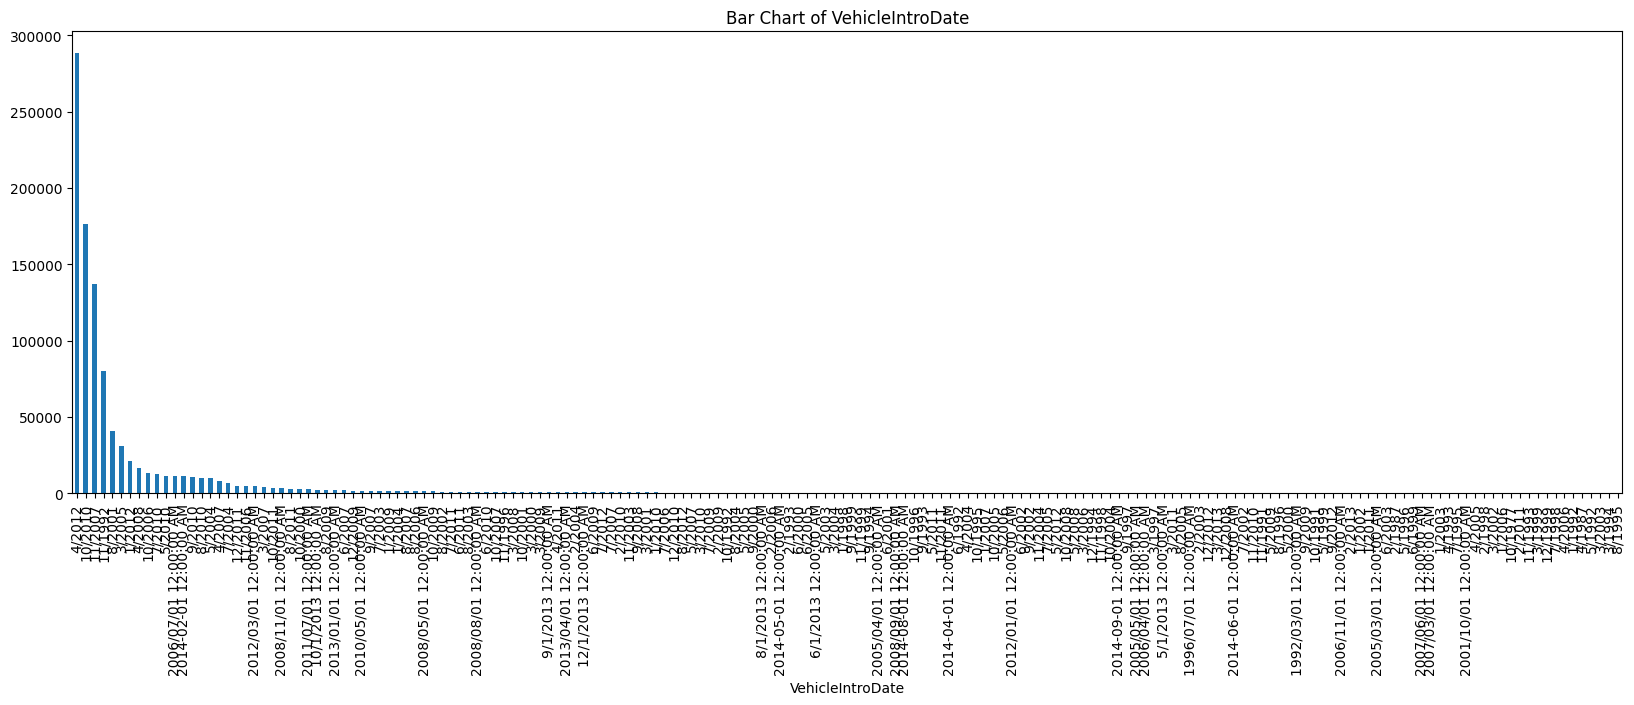

AlarmImmobiliser
Yes    999861
No        237
Name: count, dtype: int64


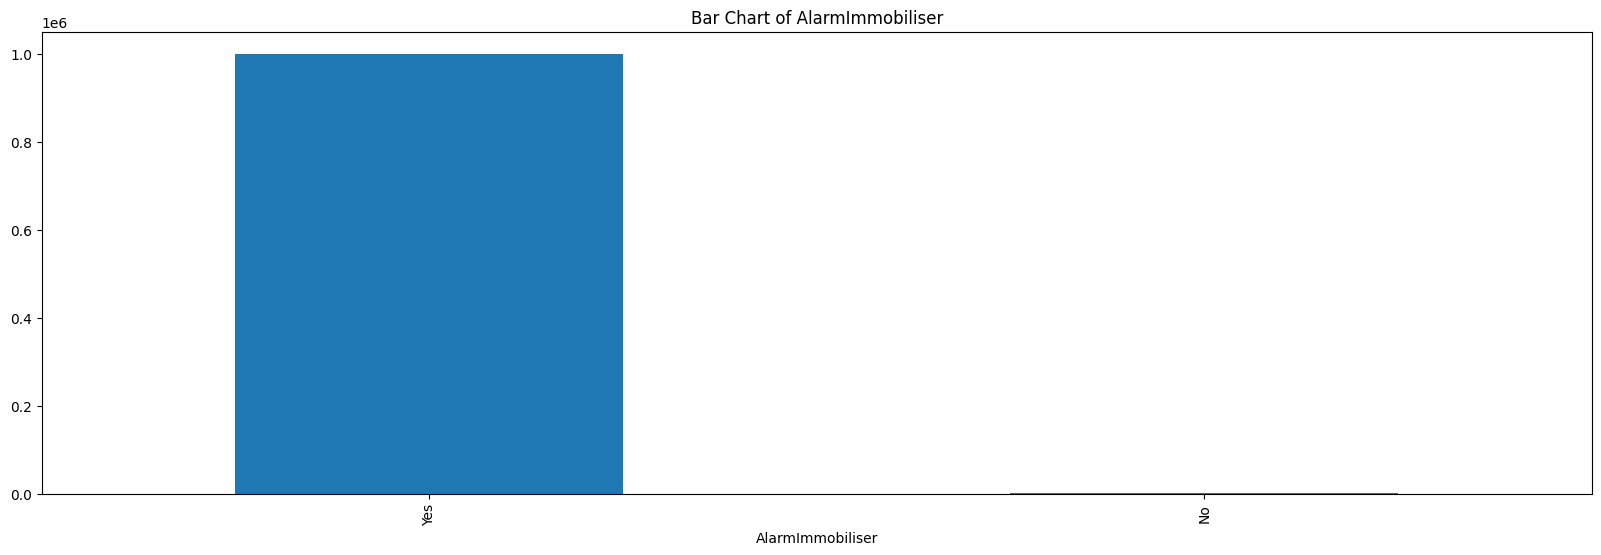

TrackingDevice
No     656617
Yes    343481
Name: count, dtype: int64


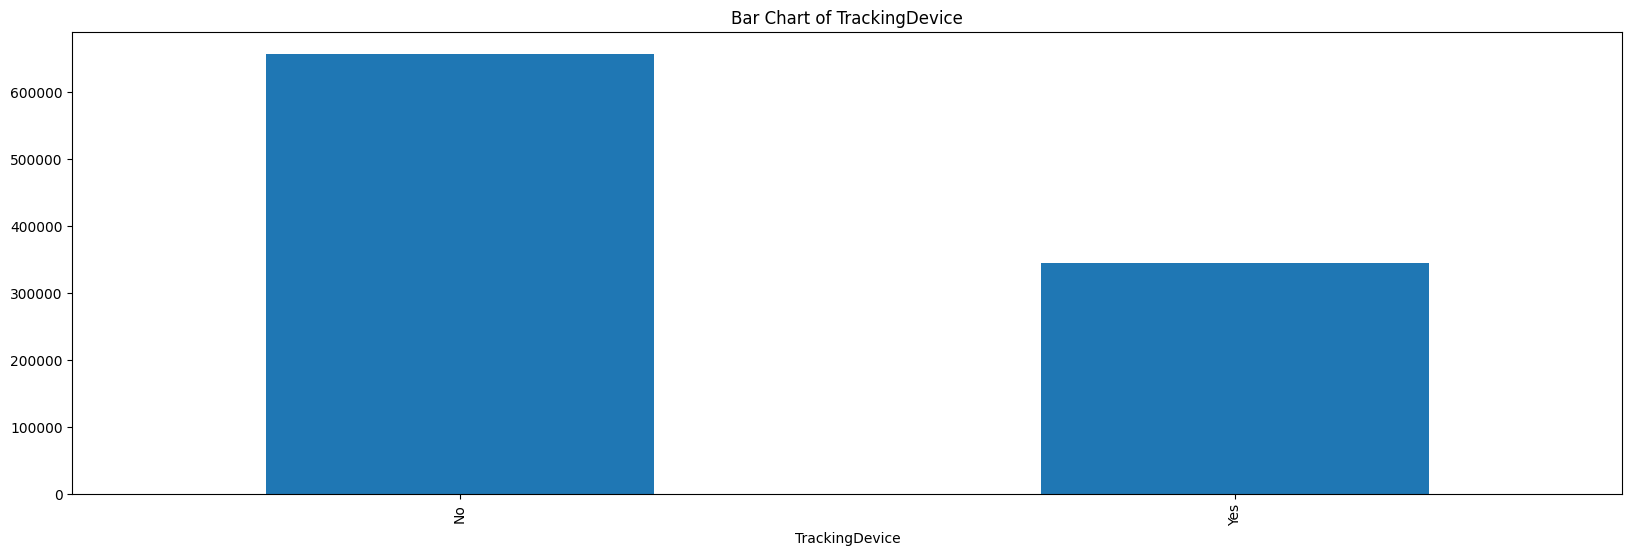

CapitalOutstanding
0           665920
0           122199
0.00          4663
232500        3285
329500        3244
             ...  
196300           2
281600           2
184500.0         2
246200.0         1
293900.0         1
Name: count, Length: 1011, dtype: int64


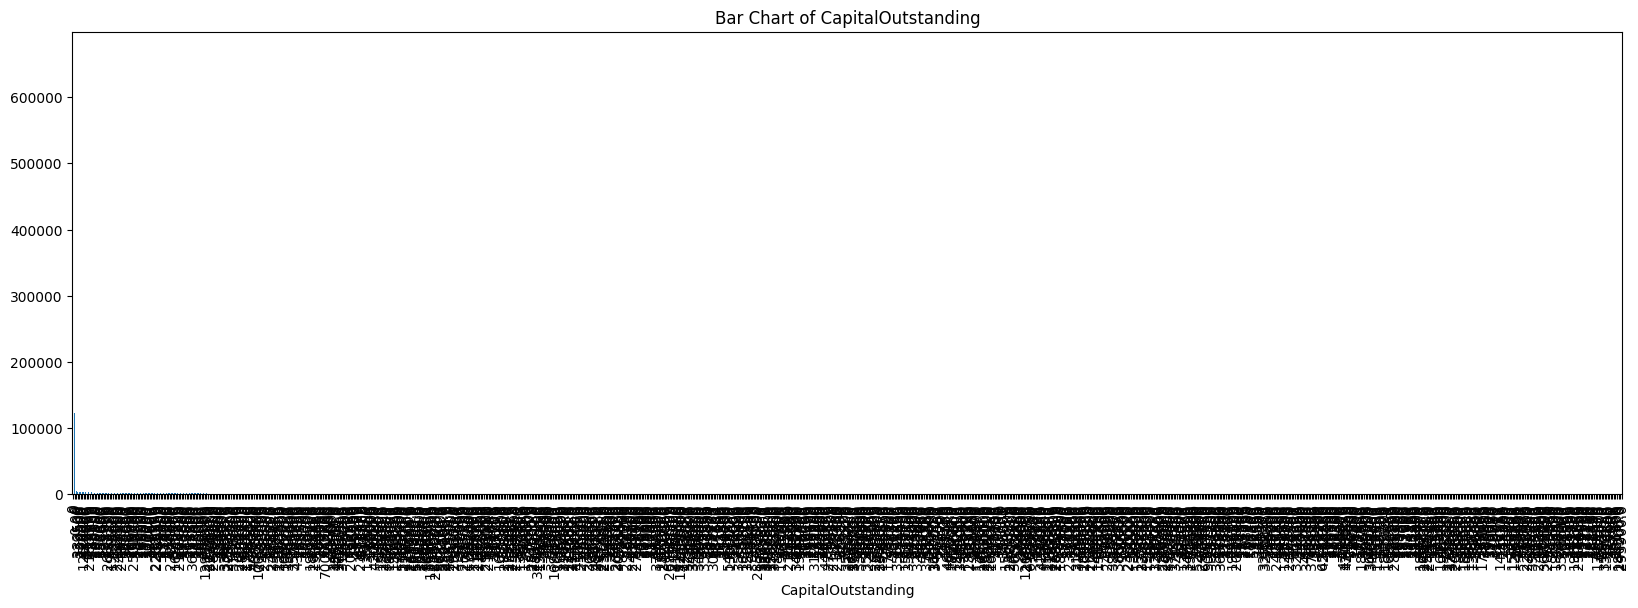

NewVehicle
More than 6 months    998518
Less than 6 months      1580
Name: count, dtype: int64


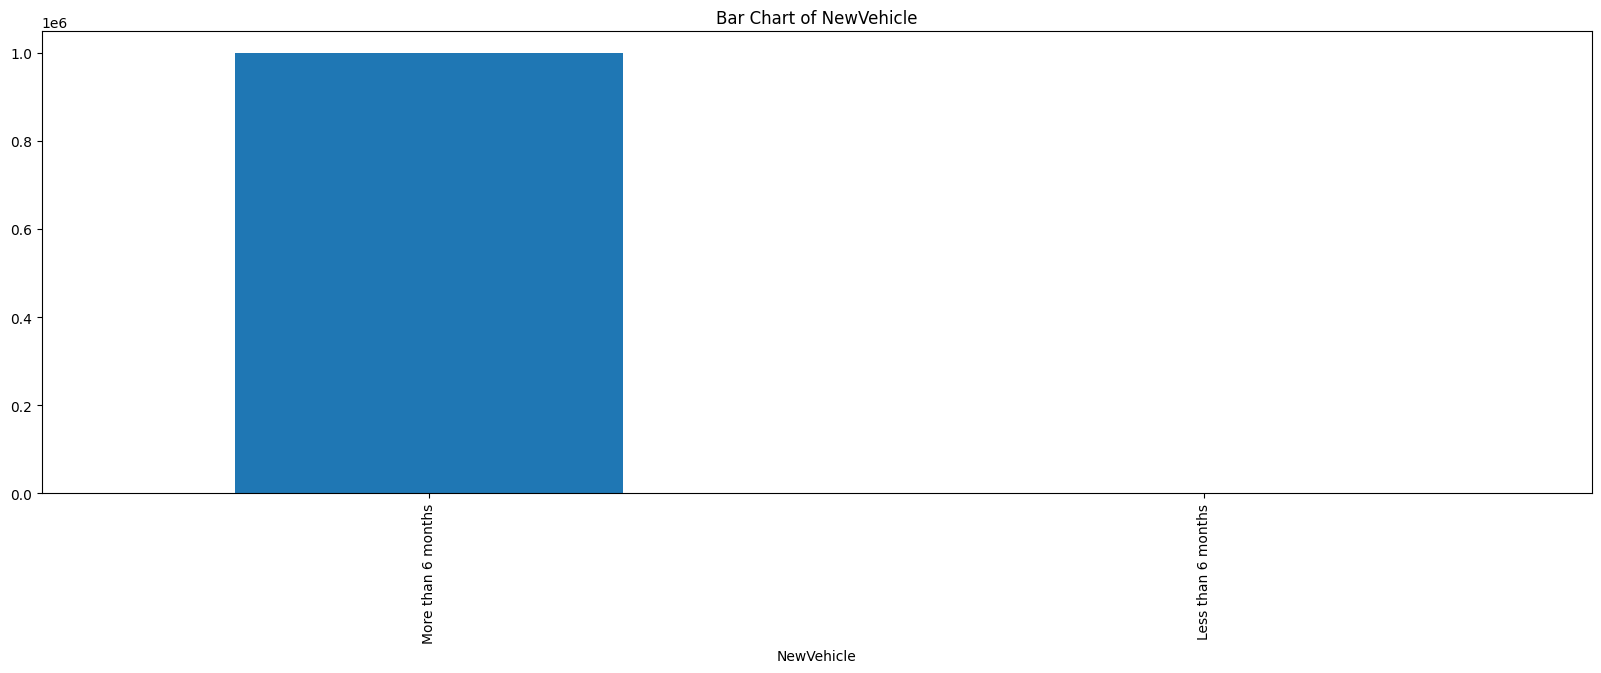

WrittenOff
No     1000066
Yes         32
Name: count, dtype: int64


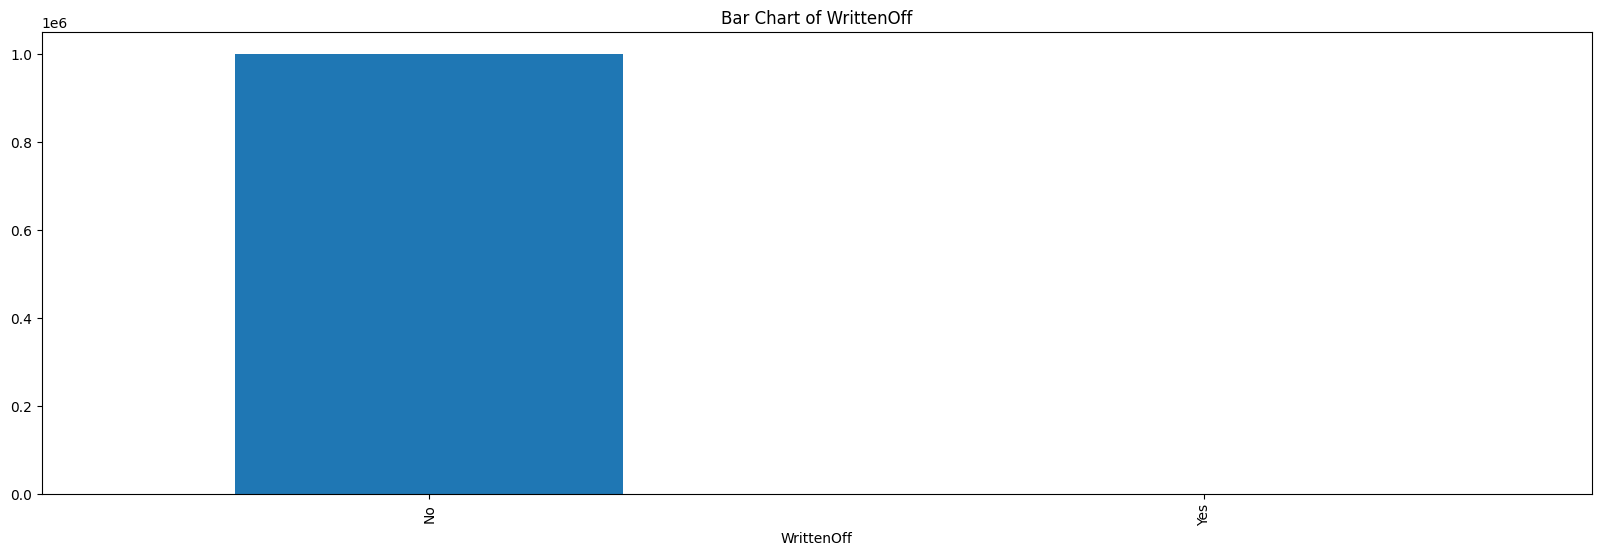

Rebuilt
No     1000066
Yes         32
Name: count, dtype: int64


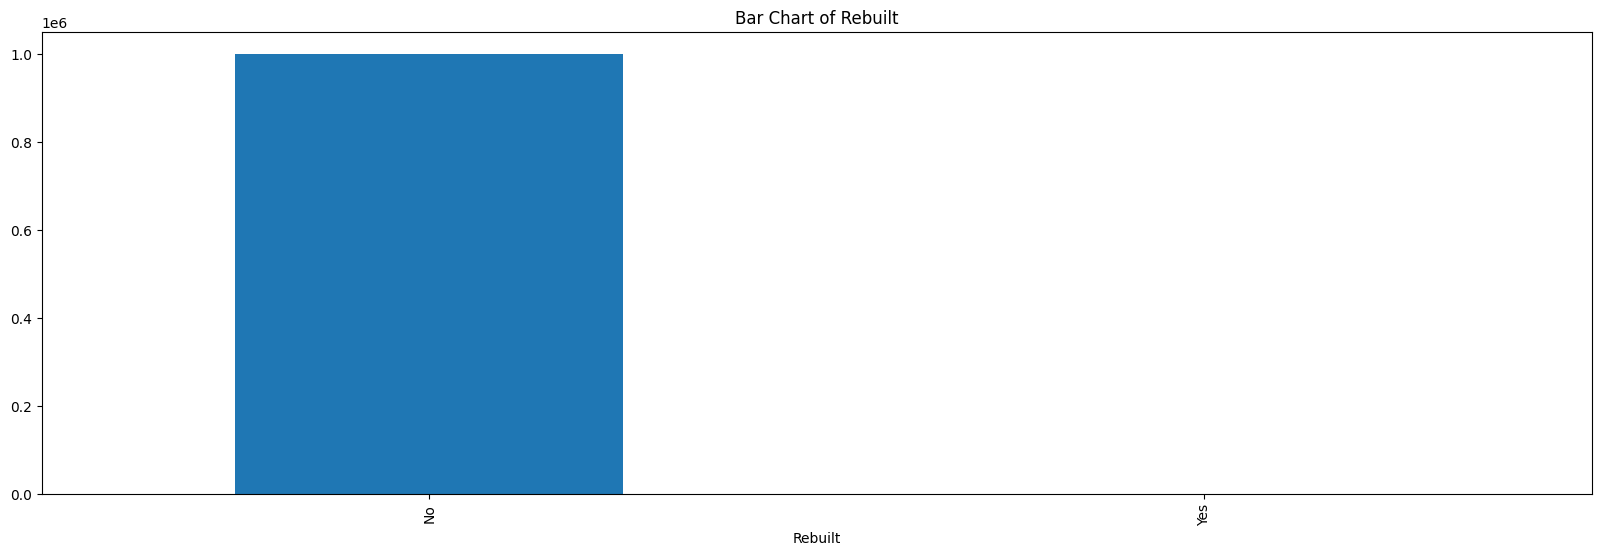

Converted
No     1000011
Yes         87
Name: count, dtype: int64


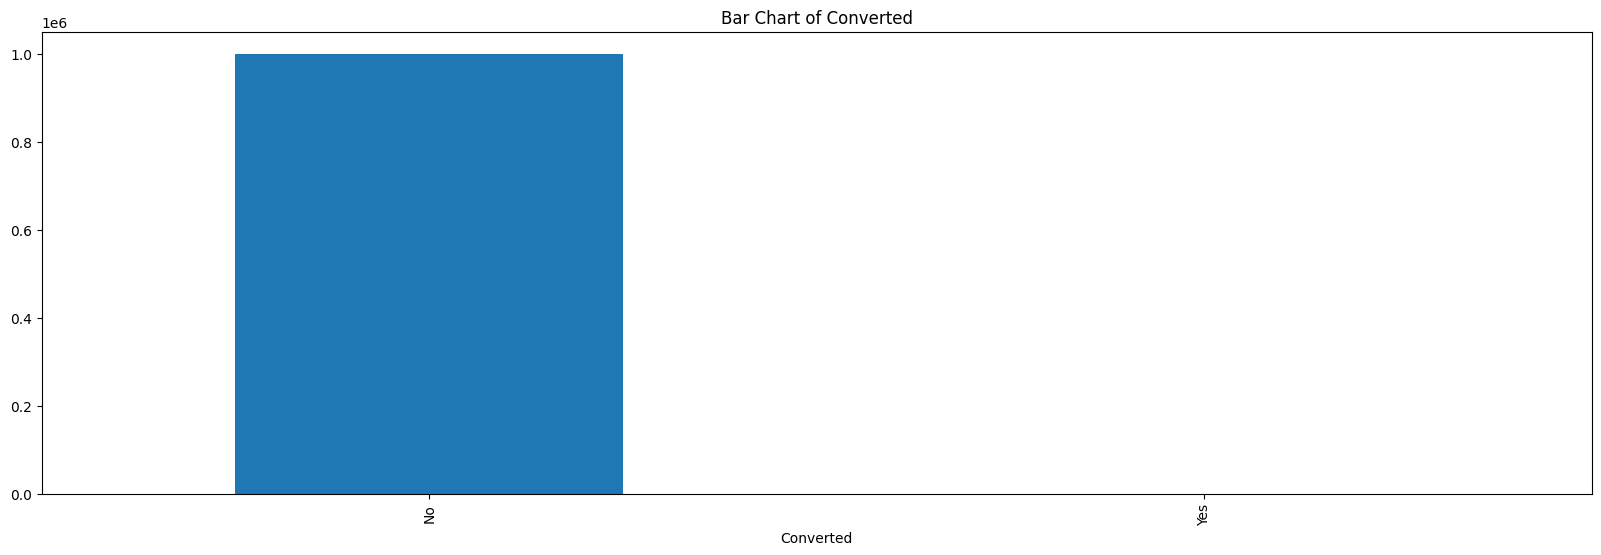

CrossBorder
No    1000098
Name: count, dtype: int64


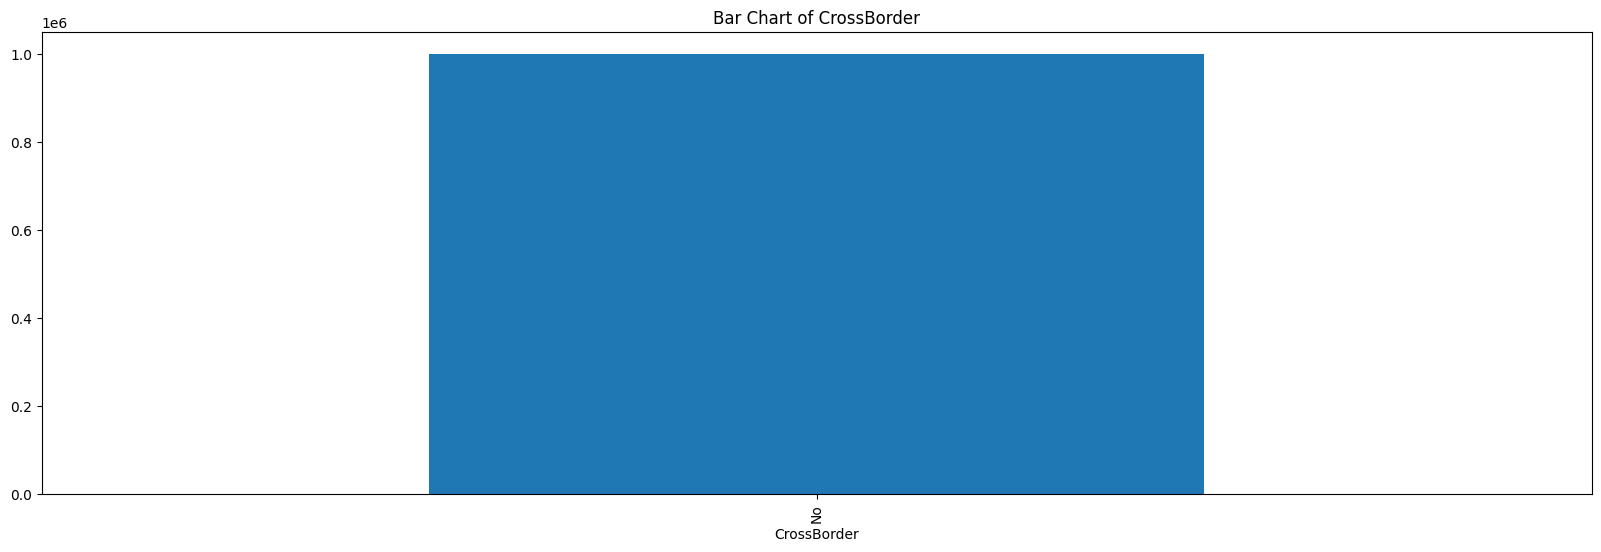

TermFrequency
Monthly    999554
Annual        544
Name: count, dtype: int64


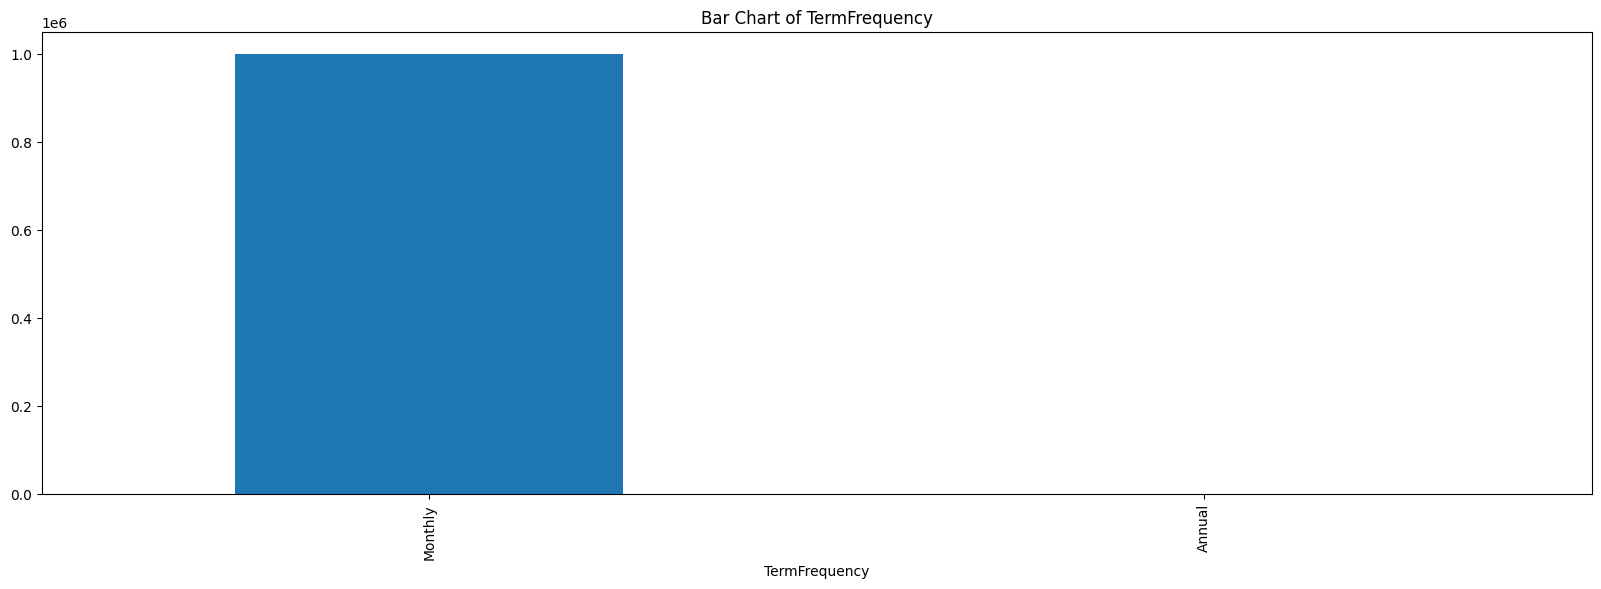

ExcessSelected
No excess                                                         791235
Mobility - Windscreen                                              97313
Mobility - Taxi with value more than R100 000 - R5 000             76424
Mobility - Taxi with value less than R100 000 - R3 000             15249
Mobility - Metered Taxis - R2000                                    6999
Mobility - Windscreen (Feb2015)                                     6450
Mobility - Taxi with value more than R100 000 - R5 000 (April)      3022
Mobility - Metered Taxis - R5000                                    1704
Mobility - Taxi with value more than R100 000 - R10 000             1108
Mobility - R250                                                      463
Mobility - Trailers                                                   76
Mobility - Taxi with value more than R100 000 - R7 500                52
Mobility - Factory Sound                                               3
Name: count, dtype: int64


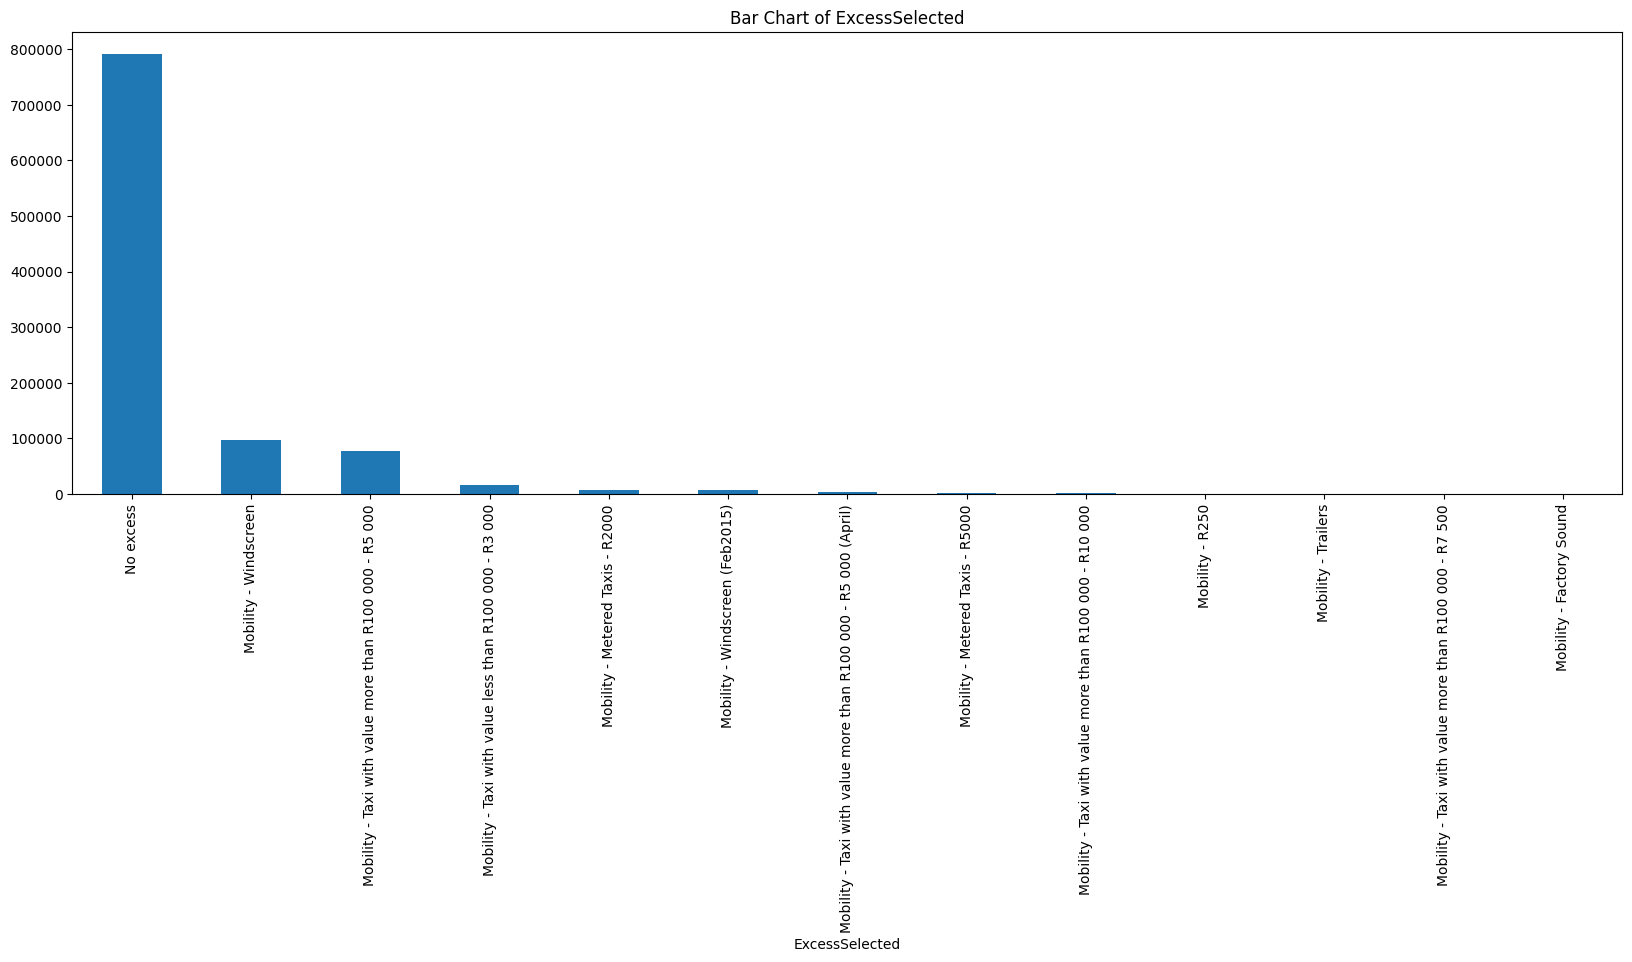

CoverCategory
Passenger Liability                                    104158
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accident Debris                102414
Windscreen                                              97313
Own Damage                                              78981
Income Protector                                        60001
Basic Excess Waiver                                     53755
Accidental Death                                        27321
Credit Protection                                       18070
Own Damage.                                             15095
Own damage                                               8776
Windscreen (2015)                                        6450
Income Protector (2015)                                 

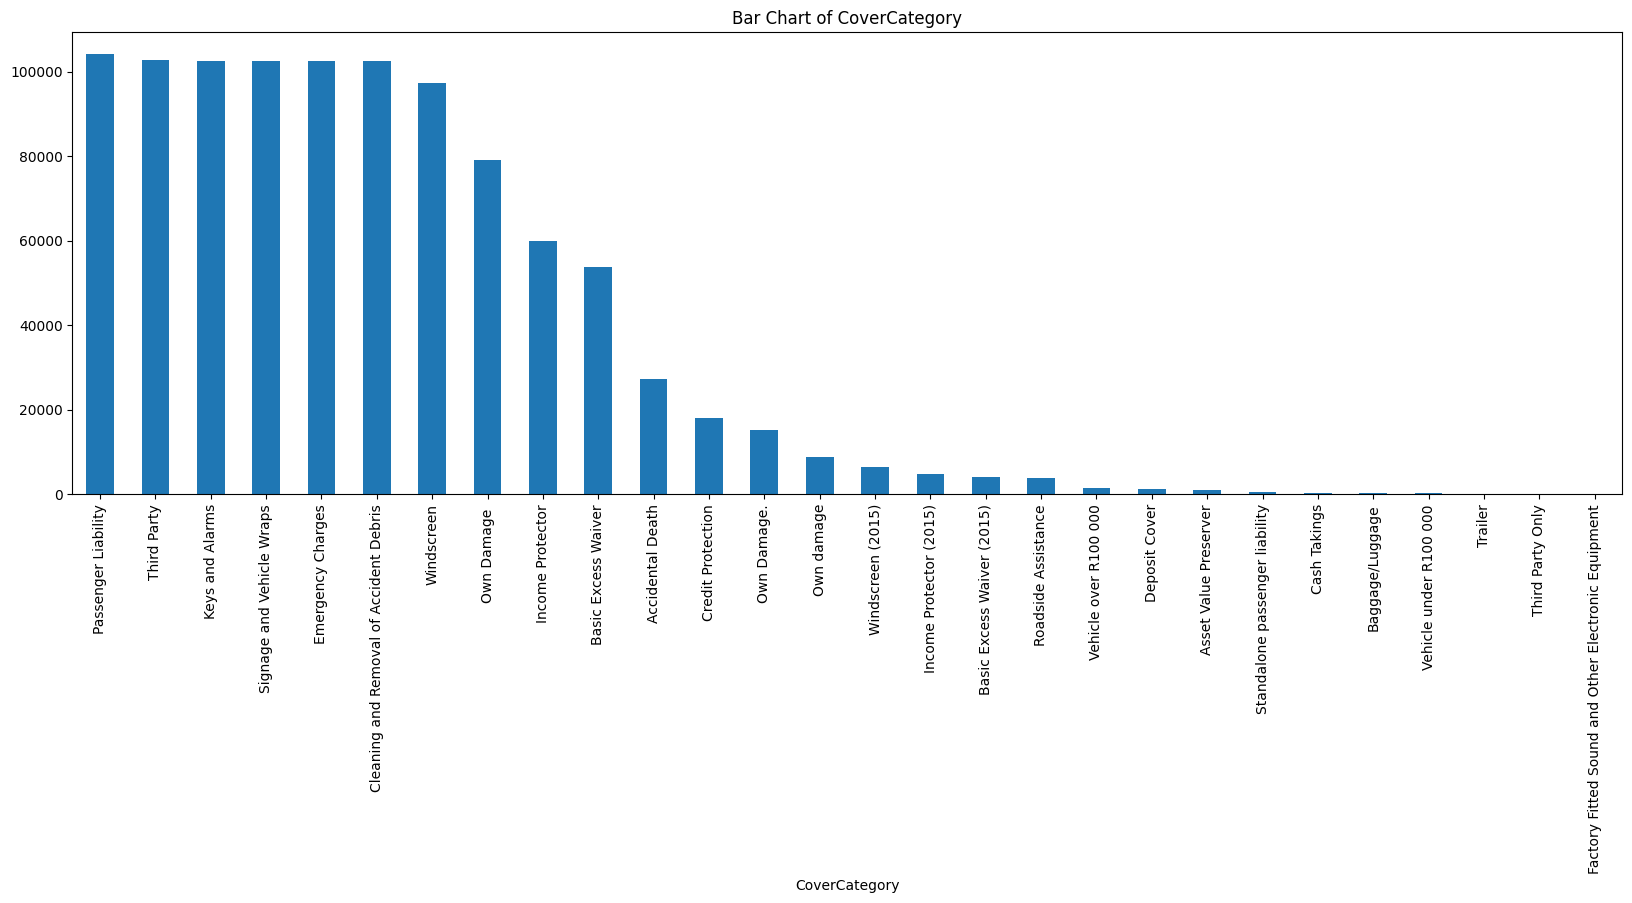

CoverType
Own Damage                                             104183
Passenger Liability                                    104158
Windscreen                                             103763
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                                      102416
Cleaning and Removal of Accident Debris                102414
Income Protector                                        64813
Basic Excess Waiver                                     57769
Accidental Death                                        27321
Credit Protection                                       18070
Roadside Assistance                                      3834
Deposit Cover                                            1299
Asset Value Preserver                                     865
Standalone passenger liability                            54

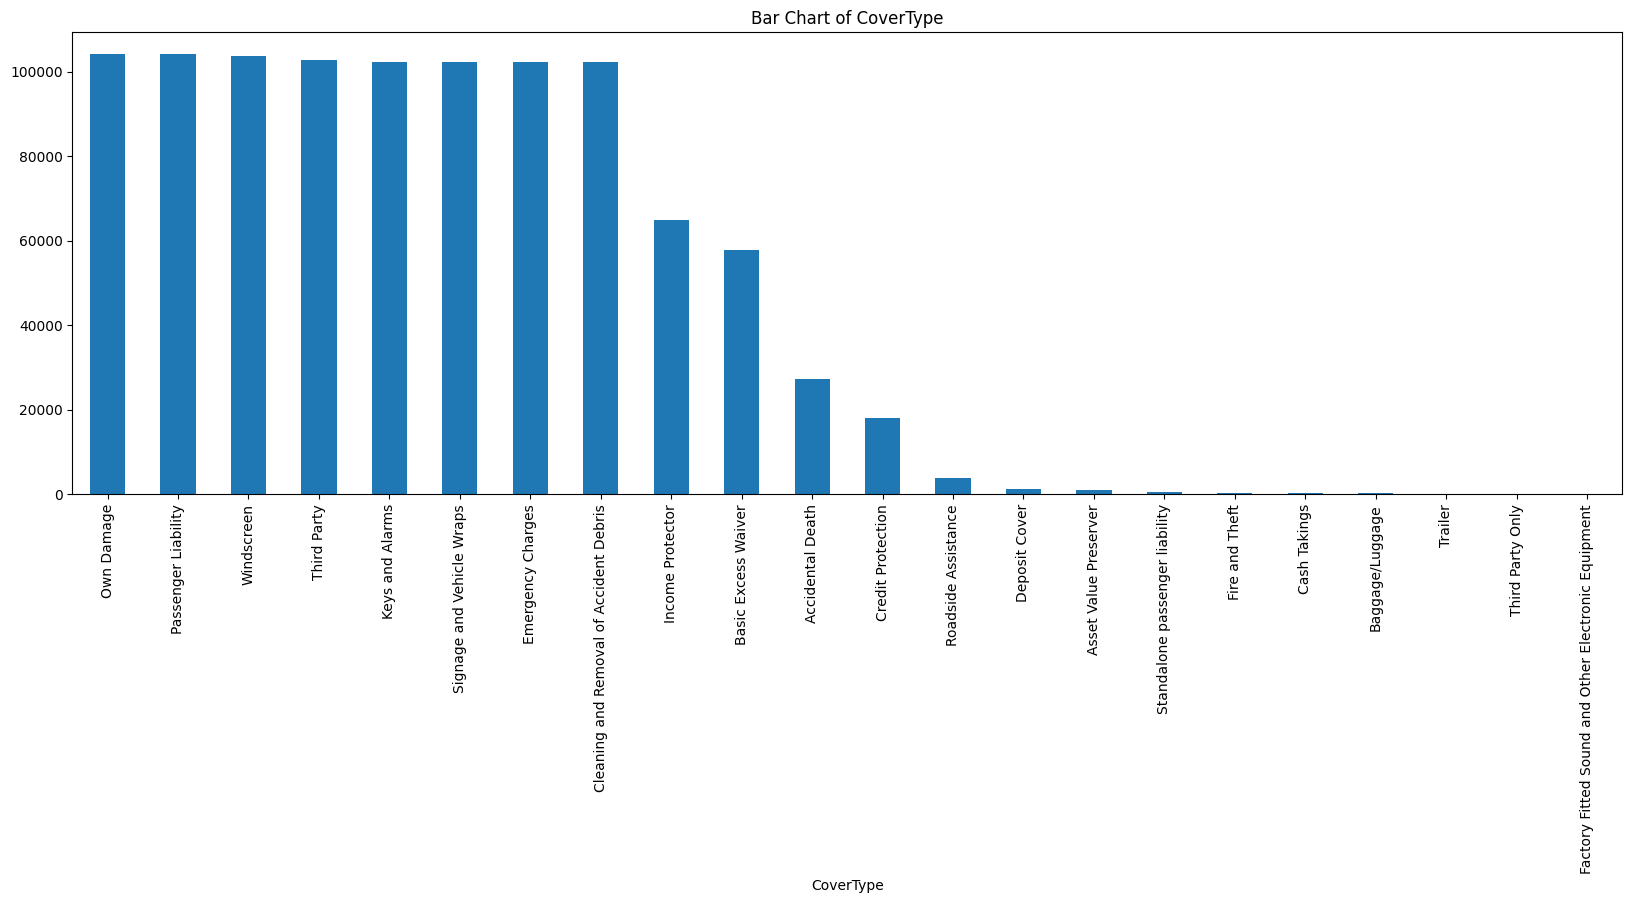

CoverGroup
Comprehensive - Taxi              824124
Income Protector                   64813
Basic Excess Waiver                57769
Accidental Death                   27321
Credit Protection                  18070
Motor Comprehensive                 3941
Deposit Cover                       1299
Asset Value Preserver                865
Fire,Theft and Third Party           750
Standalone passenger liability       544
Cash Takings                         291
Baggage/Luggage                      172
Trailer                               76
Third Party Only                      63
Name: count, dtype: int64


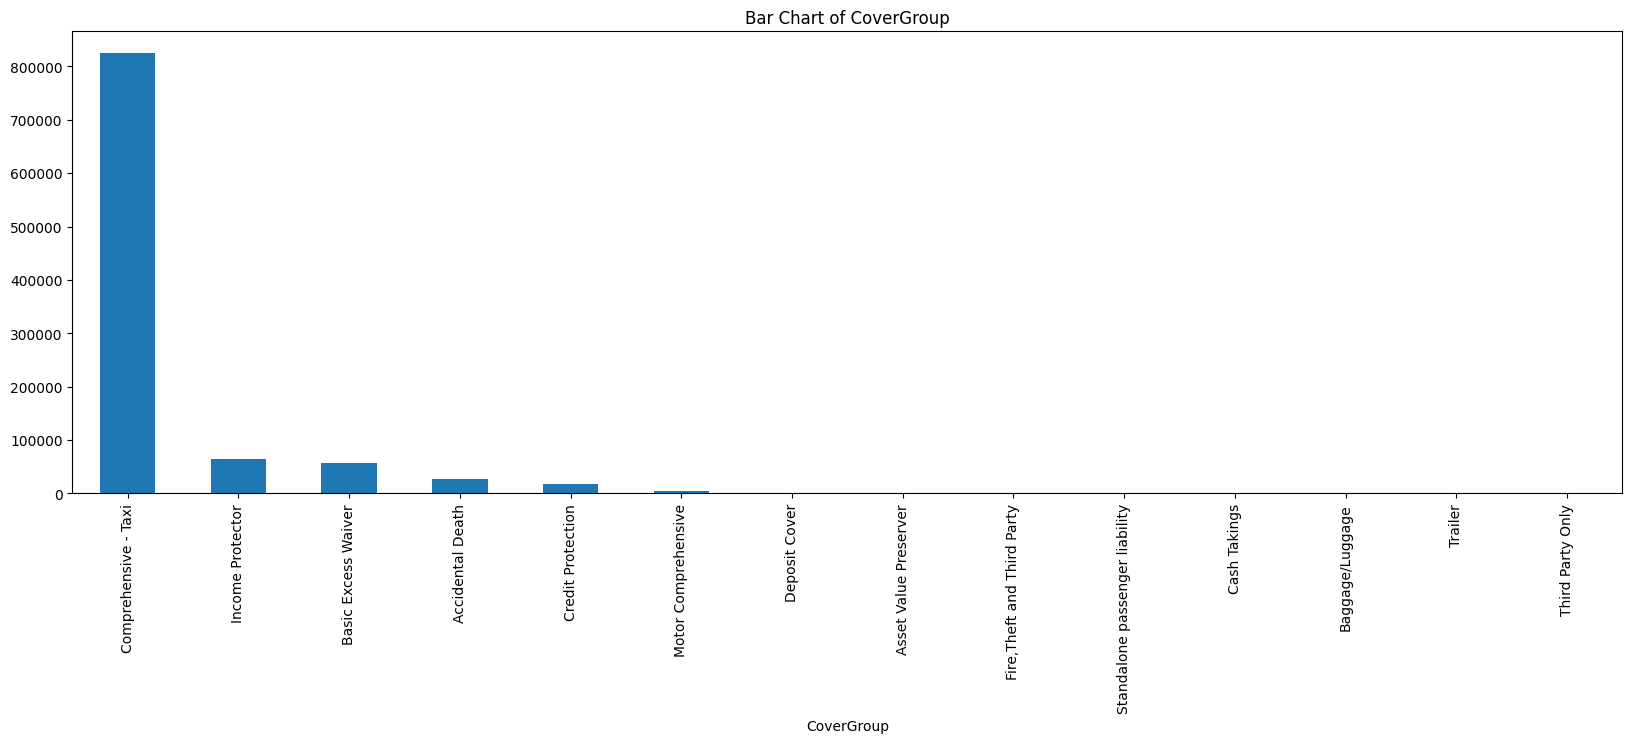

Section
Motor Comprehensive                                828125
Optional Extended Covers                           152530
Credit Protection                                   18070
Third party or third party, fire and theft only       829
Standalone passenger liability                        544
Name: count, dtype: int64


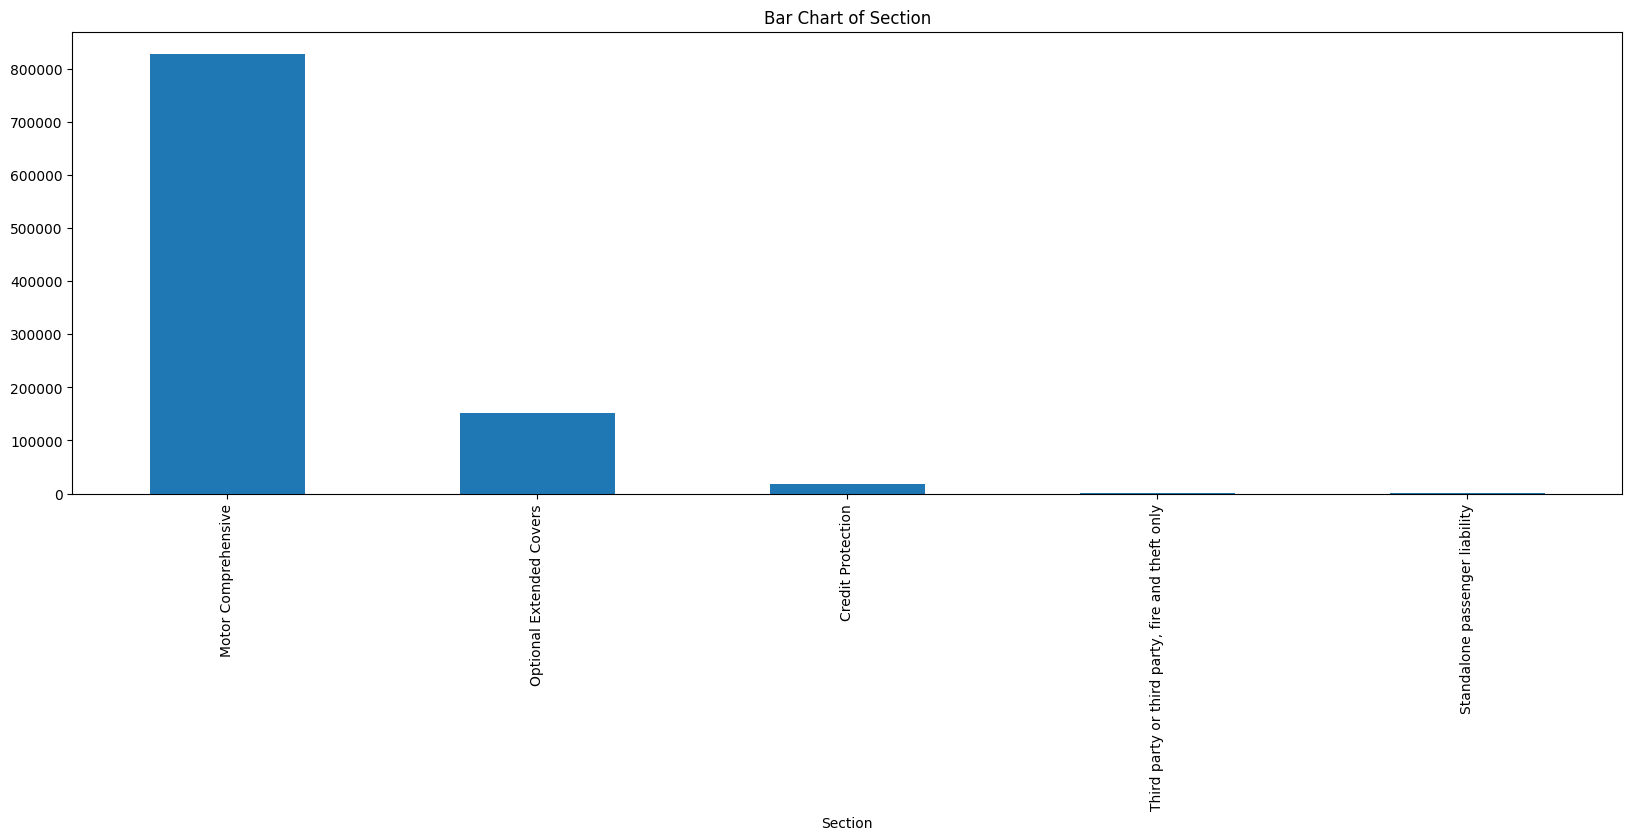

Product
Mobility Commercial Cover: Monthly    915028
Mobility Metered Taxis: Monthly        79272
Bridge Taxi Finance: Monthly            5254
Standalone Passenger Liability           544
Name: count, dtype: int64


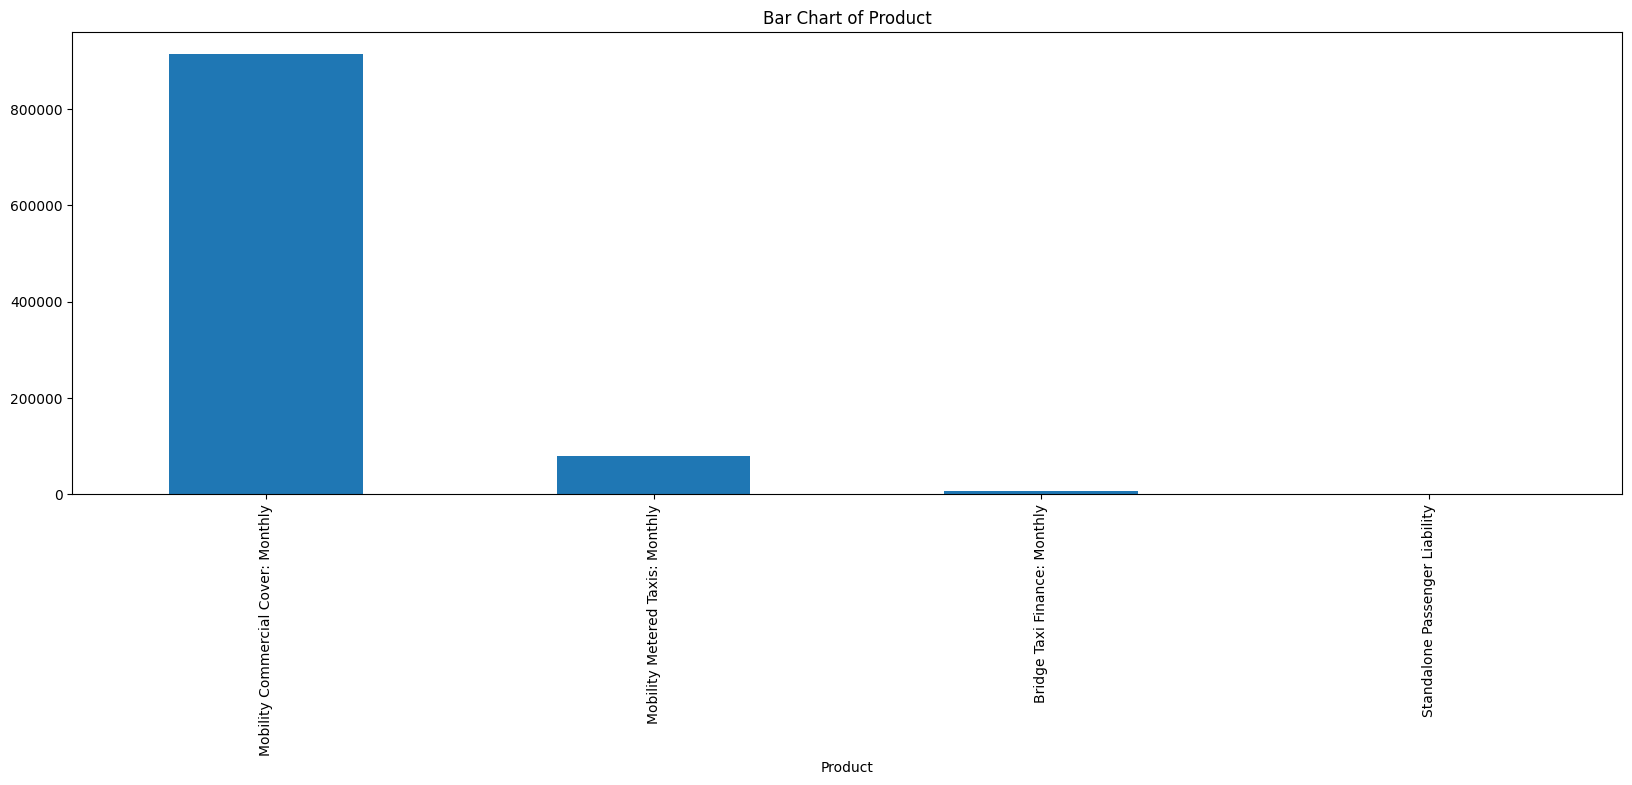

StatutoryClass
Commercial    1000098
Name: count, dtype: int64


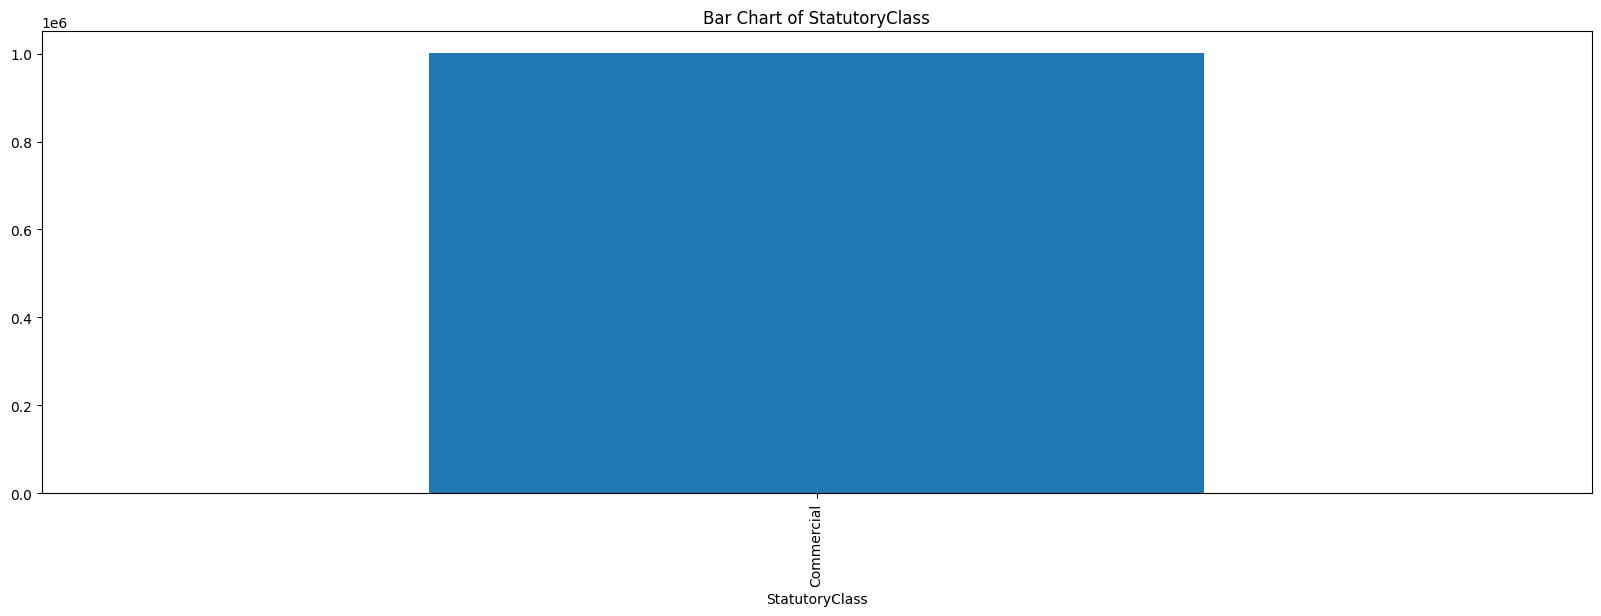

StatutoryRiskType
IFRS Constant    1000098
Name: count, dtype: int64


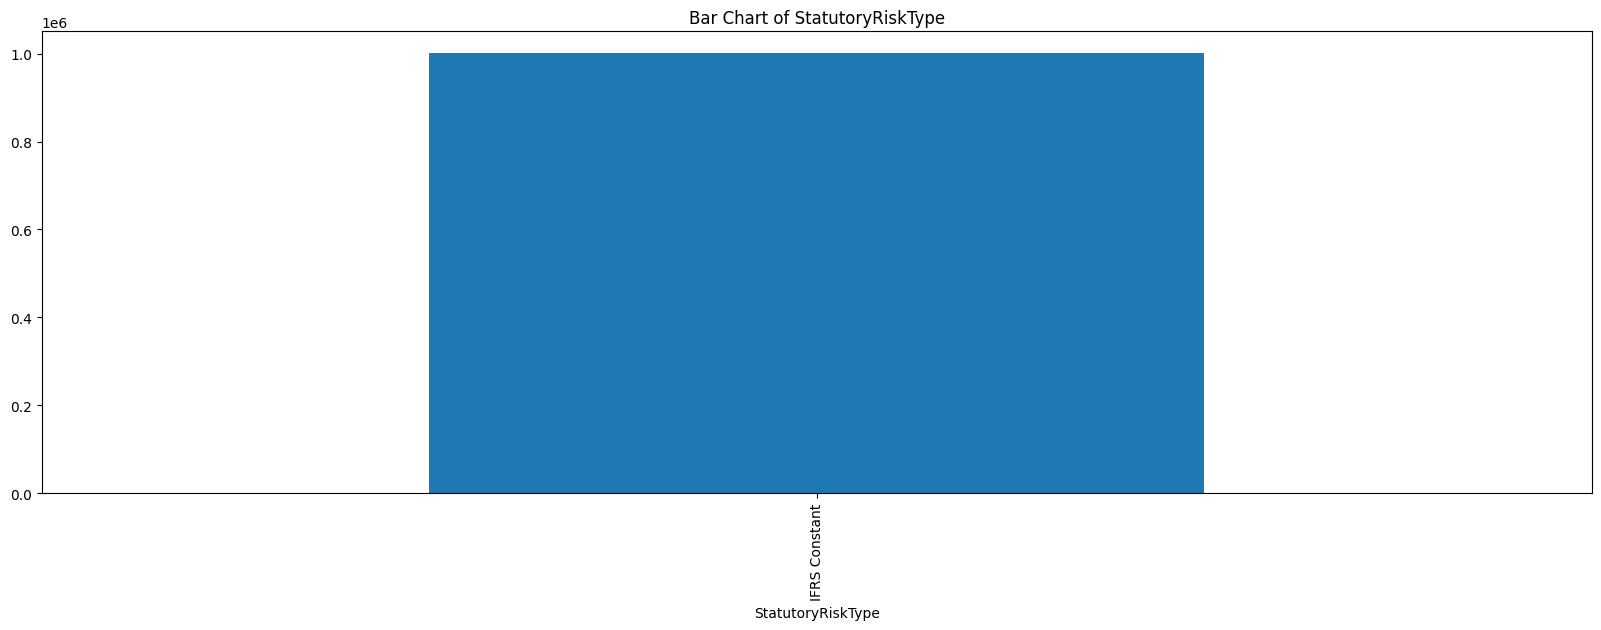

In [14]:
for column in insurance_data.select_dtypes(include='object').columns:
        print(insurance_data[column].value_counts())
        insurance_data[column].value_counts().plot(kind='bar',figsize=(20,6))
        plt.title(f"Bar Chart of {column}")
        plt.show()


#### Bivariate Analysis

#### using correlation

In [15]:
import seaborn as sns
insurance_data['TransactionMonth'] = pd.to_datetime(insurance_data['TransactionMonth'])
grouped_data = insurance_data.groupby(['TransactionMonth','PostalCode'])[['TotalPremium','TotalClaims']].mean().reset_index()


<Axes: >

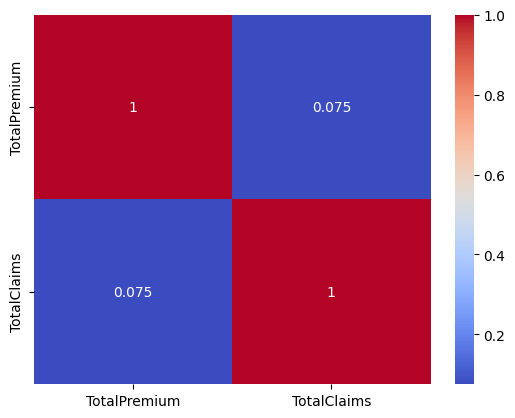

In [16]:
correlation_data = grouped_data[['TotalPremium','TotalClaims']].corr()
sns.heatmap(correlation_data,annot=True,cmap='coolwarm')


<Axes: xlabel='TotalPremium', ylabel='TotalClaims'>

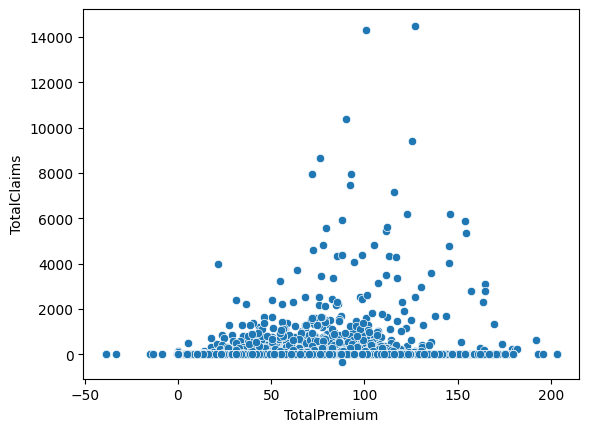

In [17]:
sns.scatterplot(x=grouped_data['TotalPremium'],y=grouped_data['TotalClaims'])


In [18]:
from scripts.insurance_scripts import get_outlier_summary


In [19]:
get_outlier_summary(insurance_data)


From 14 selected numerical columns, there are 14 columns with outlier values.


,Variable,Number of Outliers
0,UnderwrittenCoverID,5717
1,PolicyID,31232
2,PostalCode,8149
3,mmcode,242064
4,RegistrationYear,7482
5,Cylinders,34814
6,cubiccapacity,56939
7,kilowatts,2175
8,NumberOfDoors,107260
9,CustomValueEstimate,220456


### Box-plot before removing outliers

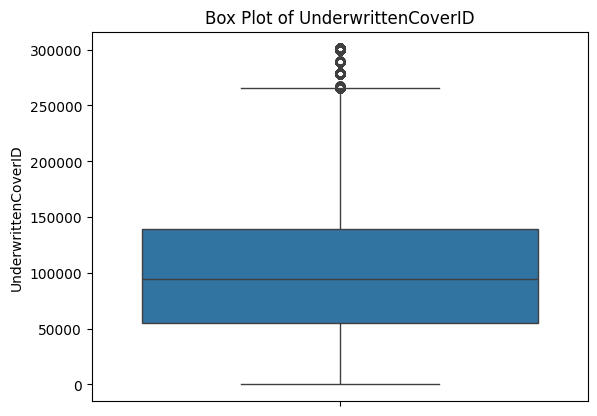

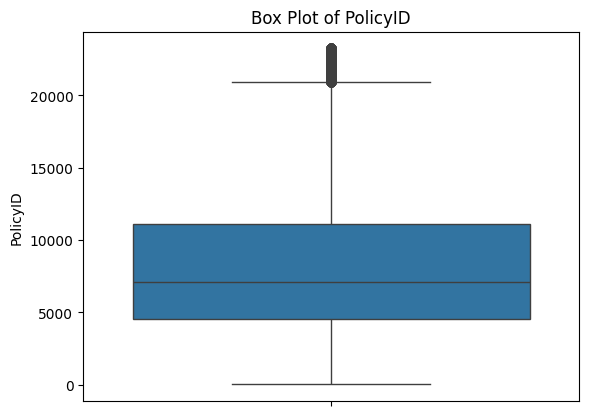

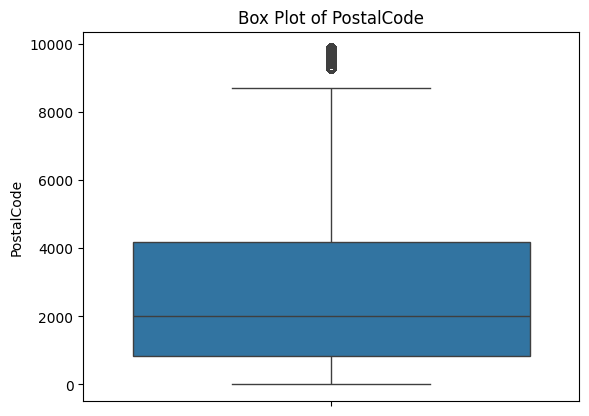

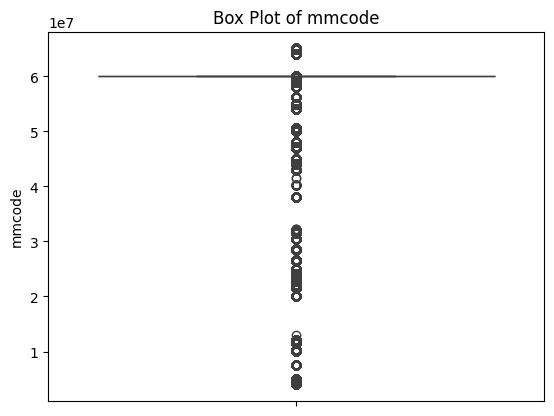

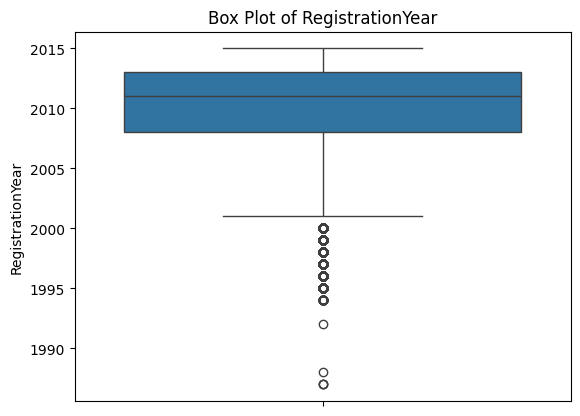

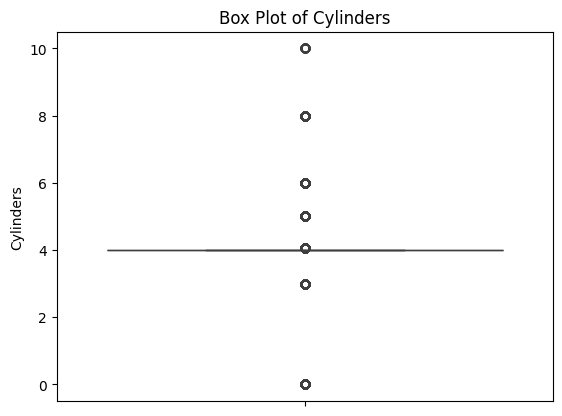

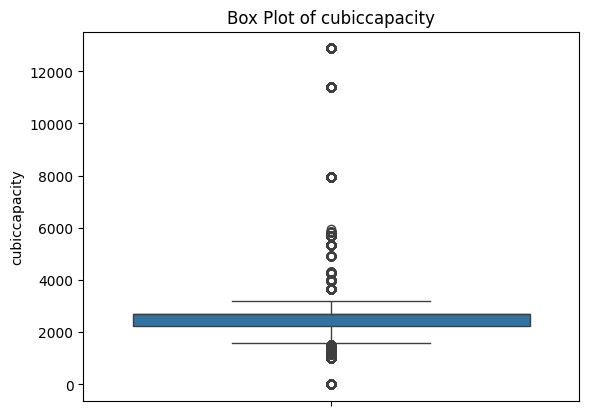

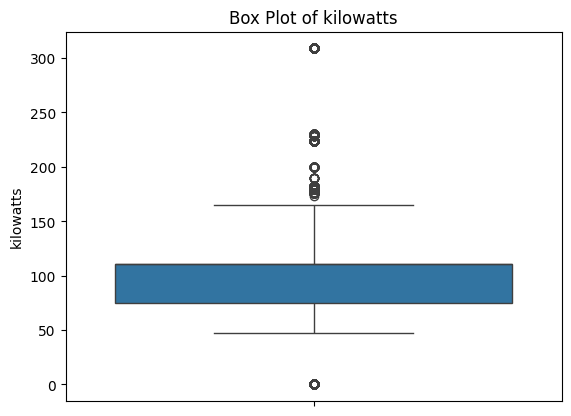

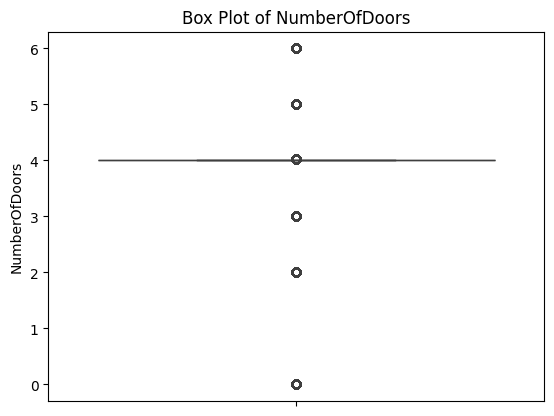

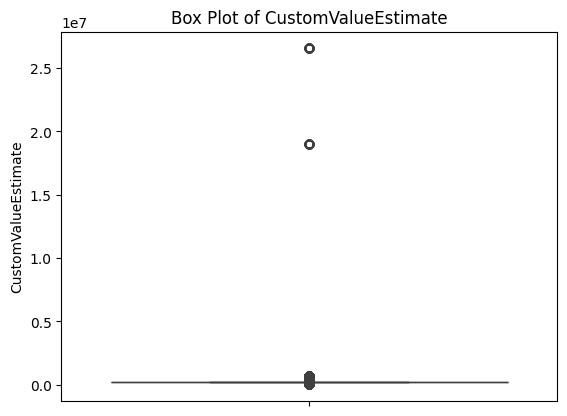

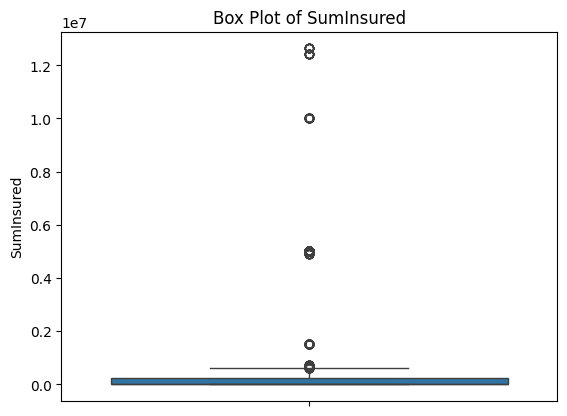

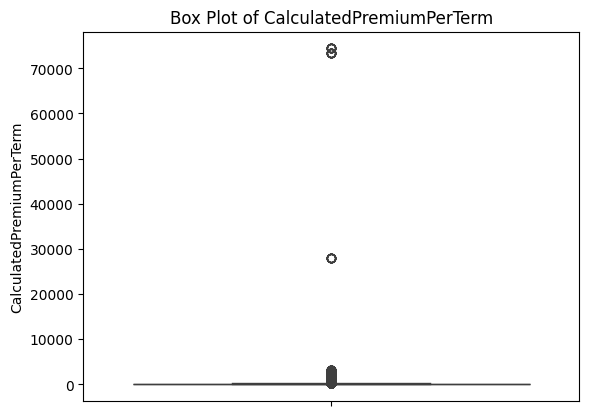

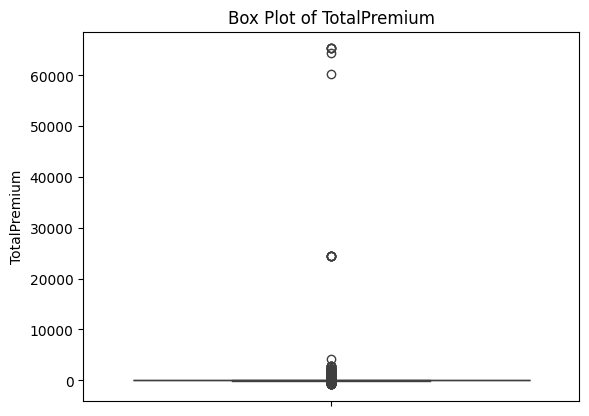

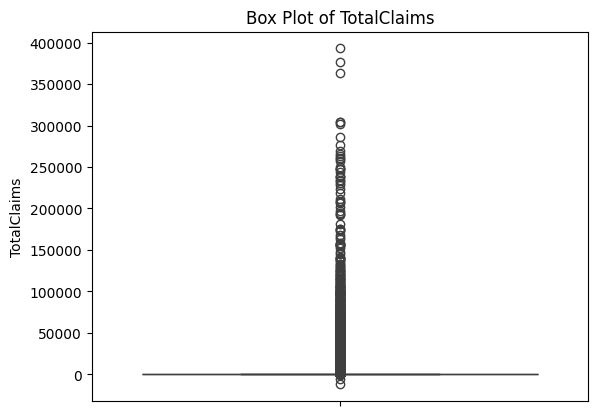

In [20]:
for column in insurance_data.select_dtypes(include='number').columns:
    sns.boxplot(data=insurance_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


## Remove Outliers

In [21]:
from scripts.insurance_scripts import remove_outliers_winsorization


In [22]:
insurance_data=remove_outliers_winsorization(insurance_data)


### Box-plot after removing outliers

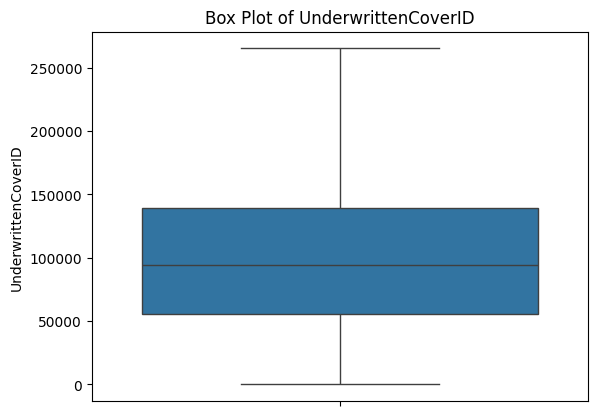

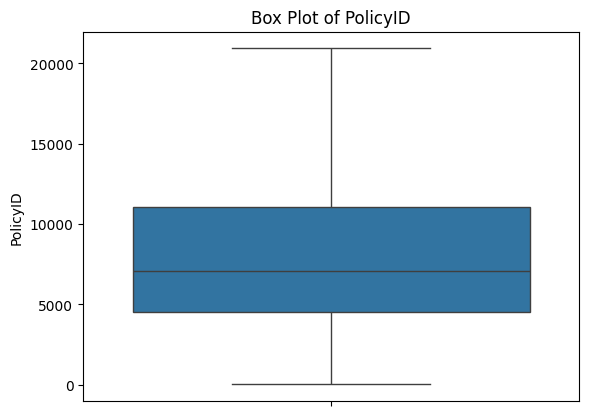

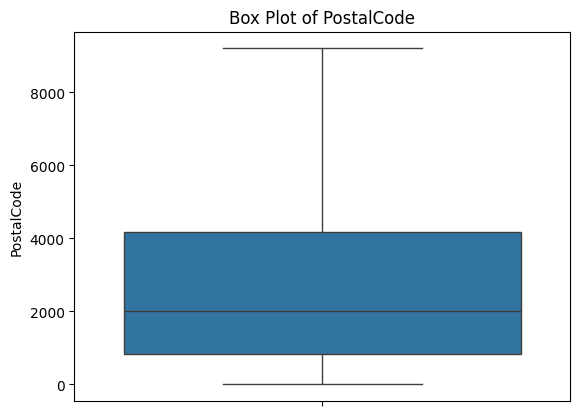

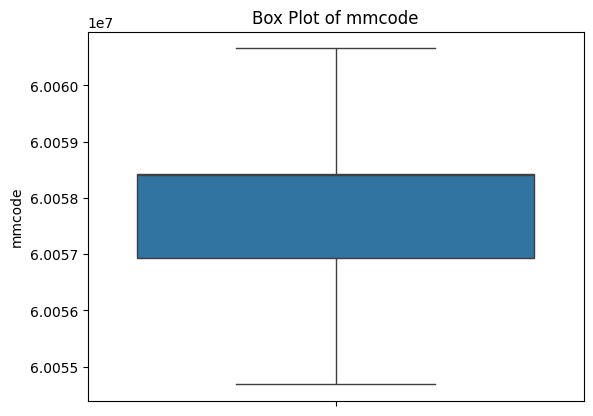

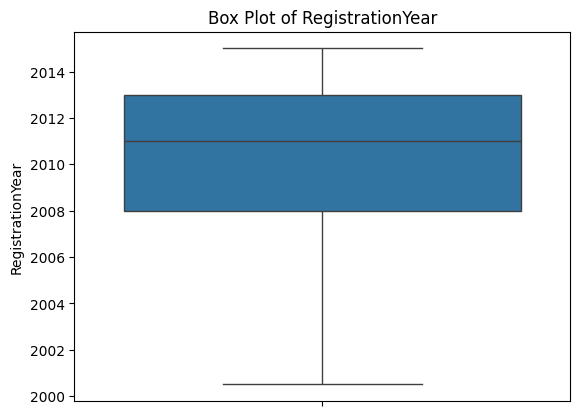

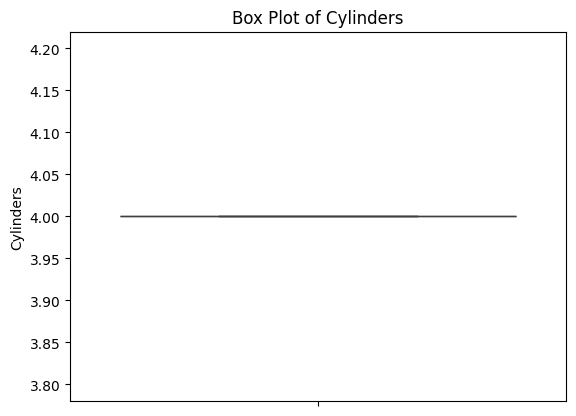

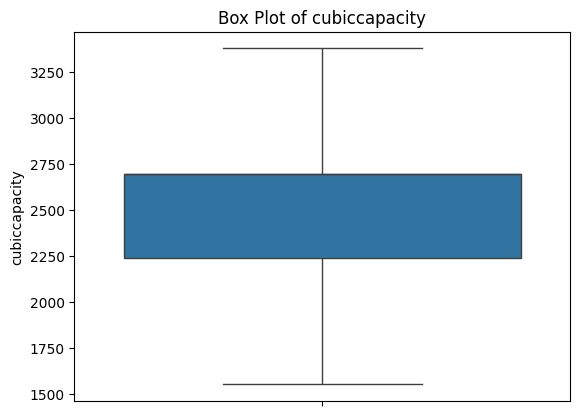

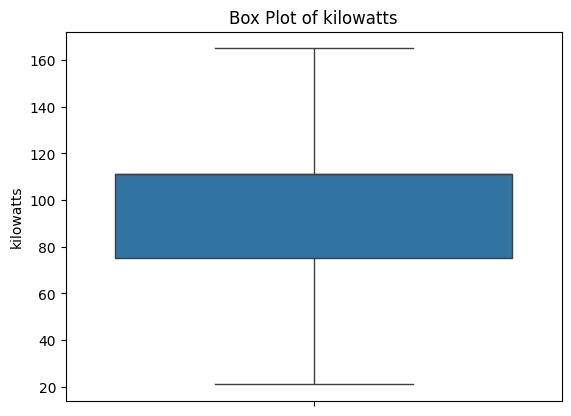

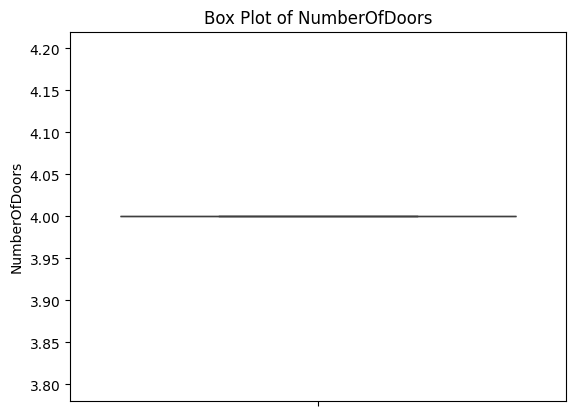

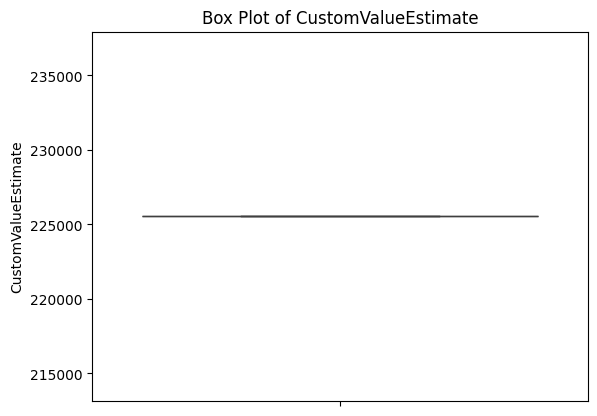

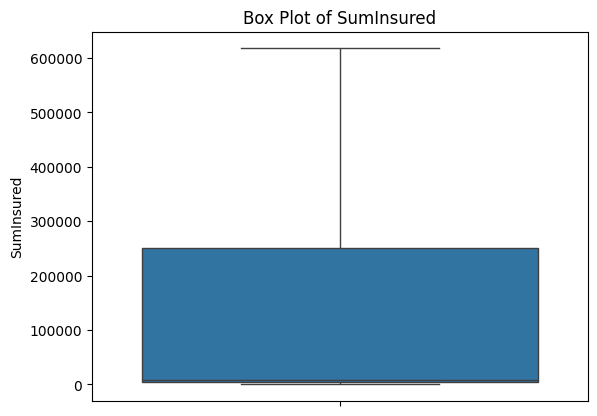

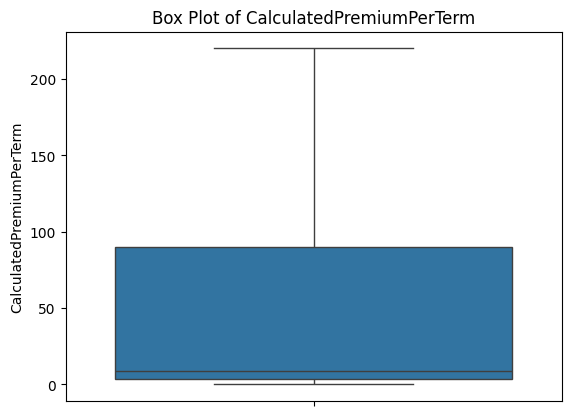

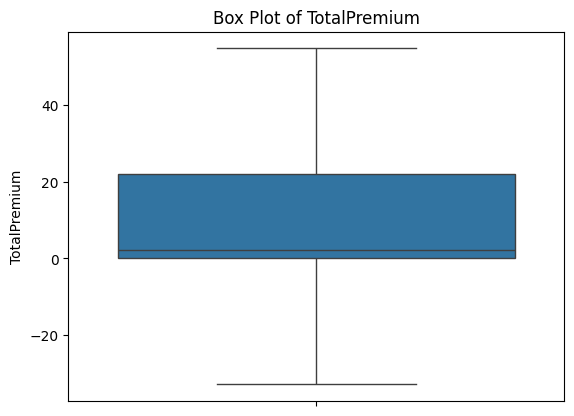

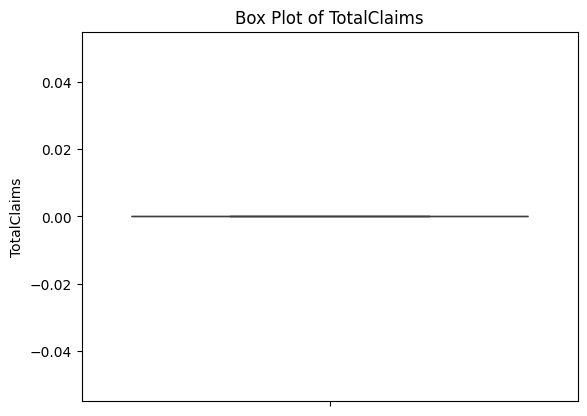

In [23]:
for column in insurance_data.select_dtypes(include='number').columns:
    sns.boxplot(data=insurance_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


# Data Comparison

#### Trends Over Geography

In [24]:
print(insurance_data.columns)


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')


In [25]:
def groupedDataTrendsOverGeography(columns):
    for column in columns:
      grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')[[column]].mean().reset_index()
      plt.figure(figsize=(14, 6))
      # plt.bar(grouped_data_Trends_Over_Geography['Province'], grouped_data_Trends_Over_Geography[column])
      sns.barplot(x='Province',y=column, data=grouped_data_Trends_Over_Geography)
      plt.show()


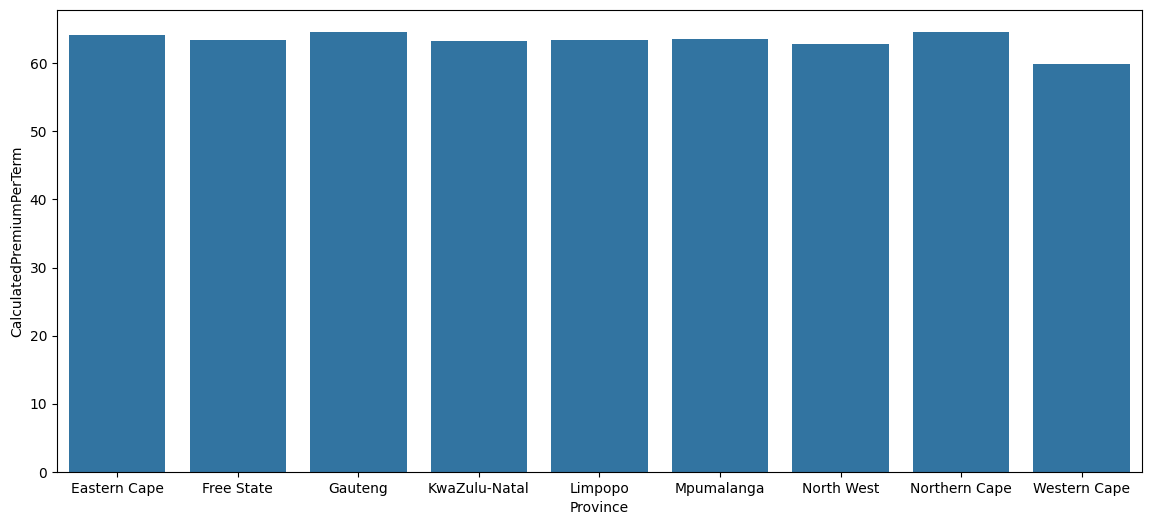

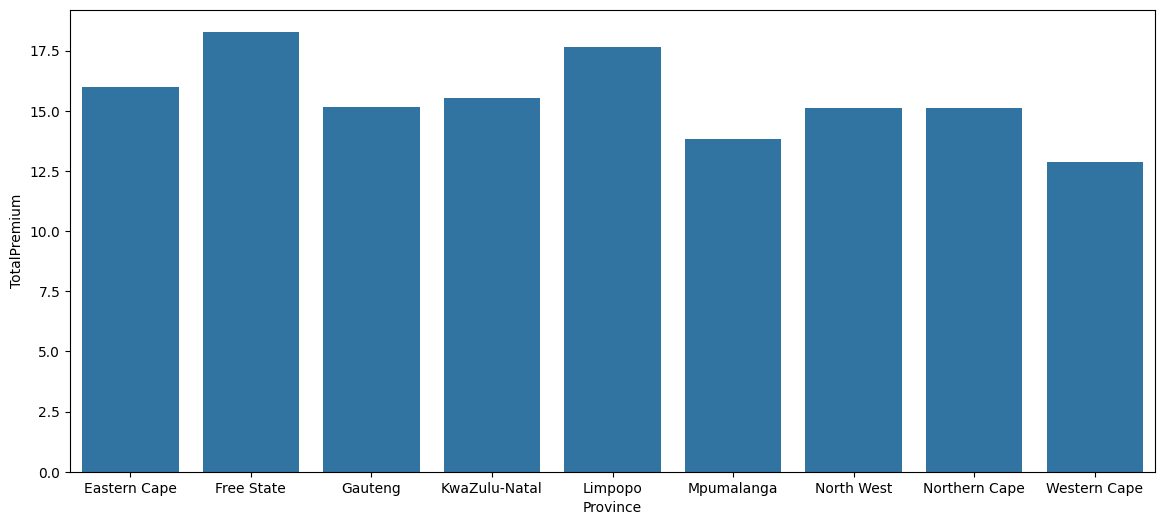

In [26]:
groupedDataTrendsOverGeography(['CalculatedPremiumPerTerm','TotalPremium'])


In [27]:
grouped_data_Trends_Over_Geography = insurance_data.groupby('Province')


In [28]:
x=grouped_data_Trends_Over_Geography['CoverType'].value_counts(normalize=True).unstack()


In [29]:
x.head()


CoverType,Accidental Death,Asset Value Preserver,Baggage/Luggage,Basic Excess Waiver,Cash Takings,Cleaning and Removal of Accident Debris,Credit Protection,Deposit Cover,Emergency Charges,Factory Fitted Sound and Other Electronic Equipment,...,Keys and Alarms,Own Damage,Passenger Liability,Roadside Assistance,Signage and Vehicle Wraps,Standalone passenger liability,Third Party,Third Party Only,Trailer,Windscreen
Province,,,,,,,,,,,,,,,,,,,,,
Eastern Cape,0.055808,0.000330,0.001121,0.073378,NaN,0.099090,0.015394,0.002406,0.099090,NaN,...,0.099090,0.099090,0.099090,NaN,0.099090,0.000165,0.099090,0.001582,0.000791,0.098299
Free State,0.065070,NaN,NaN,0.067416,NaN,0.097172,0.013458,0.001605,0.097172,NaN,...,0.097172,0.097172,0.097172,0.001482,0.097172,0.000494,0.097172,NaN,NaN,0.097172
Gauteng,0.012822,0.001140,0.000262,0.068216,0.000058,0.100331,0.020388,0.000653,0.100336,0.000003,...,0.100367,0.104777,0.104759,0.003534,0.100336,0.000053,0.100707,0.000038,NaN,0.104020
KwaZulu-Natal,0.052250,0.000436,NaN,0.041047,0.000018,0.104493,0.014784,0.002427,0.104493,0.000006,...,0.104493,0.104499,0.104493,0.002215,0.104493,0.000560,0.104529,NaN,NaN,0.104423
Limpopo,0.043646,NaN,NaN,0.057296,NaN,0.100419,0.020696,0.000282,0.100419,NaN,...,0.100419,0.100419,0.100419,0.000523,0.100419,NaN,0.100419,NaN,NaN,0.100419


<Axes: xlabel='Province'>

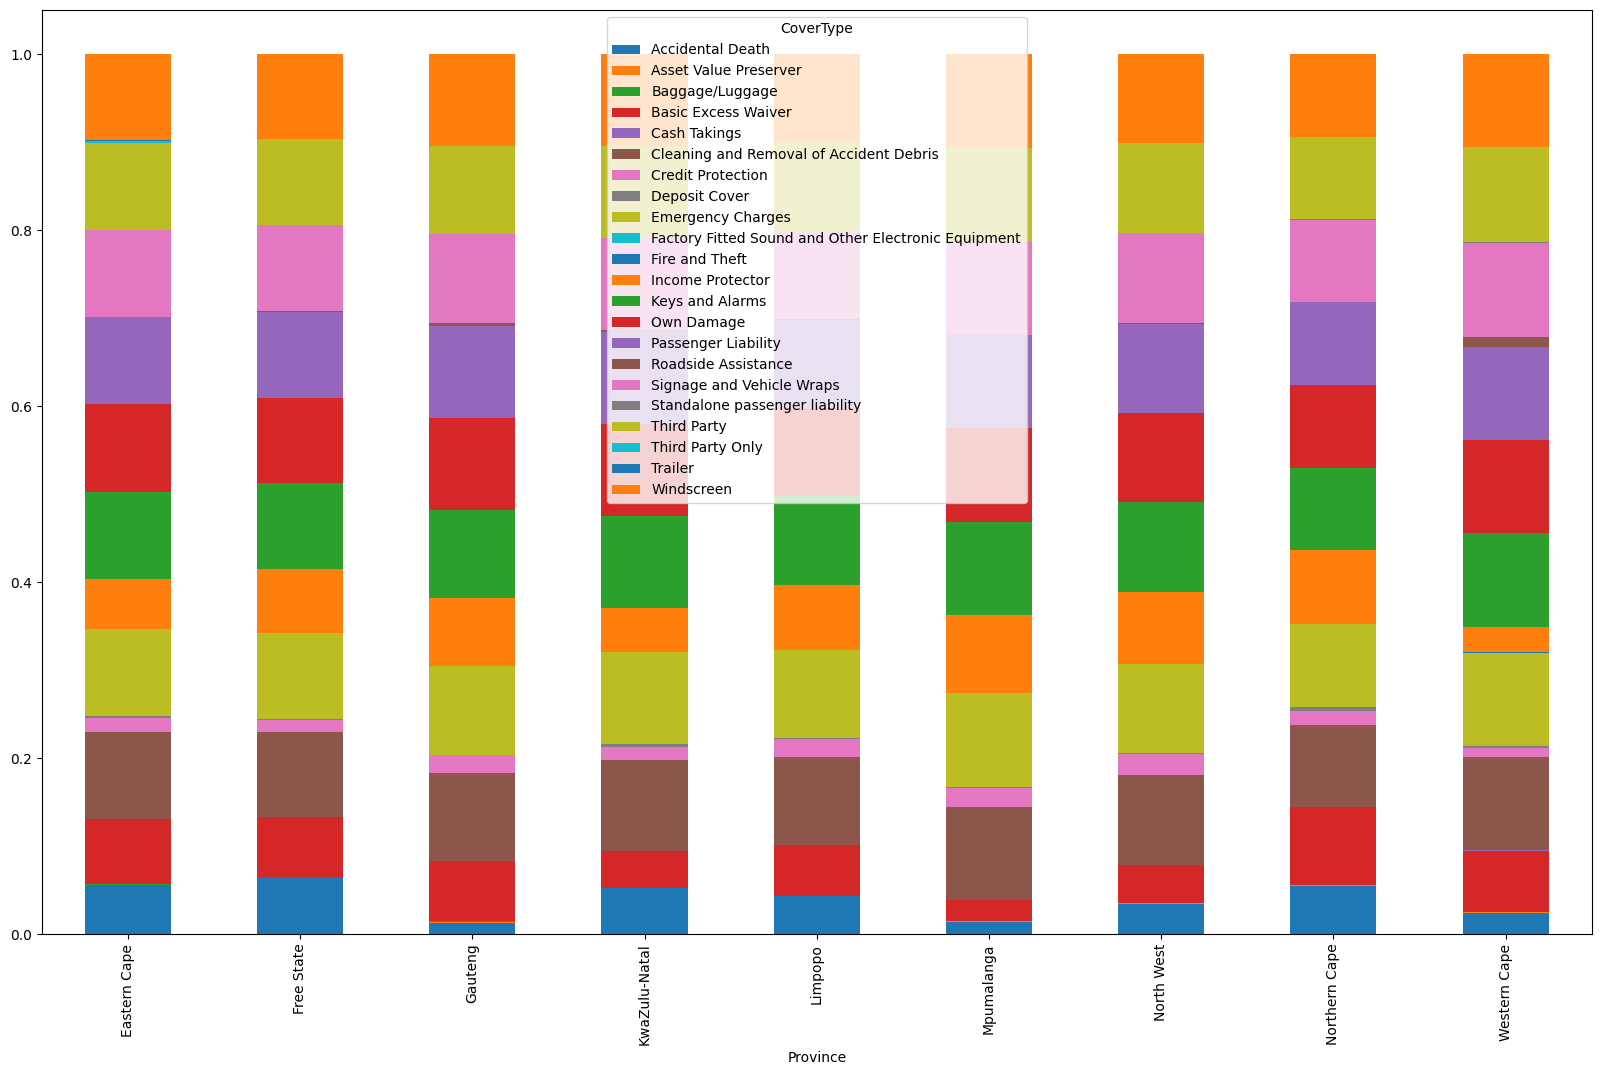

In [30]:
x.plot(kind='bar',stacked=True,figsize=(20,12))


In [31]:
x=grouped_data_Trends_Over_Geography['make'].value_counts(normalize=True).unstack()


<Axes: xlabel='Province'>

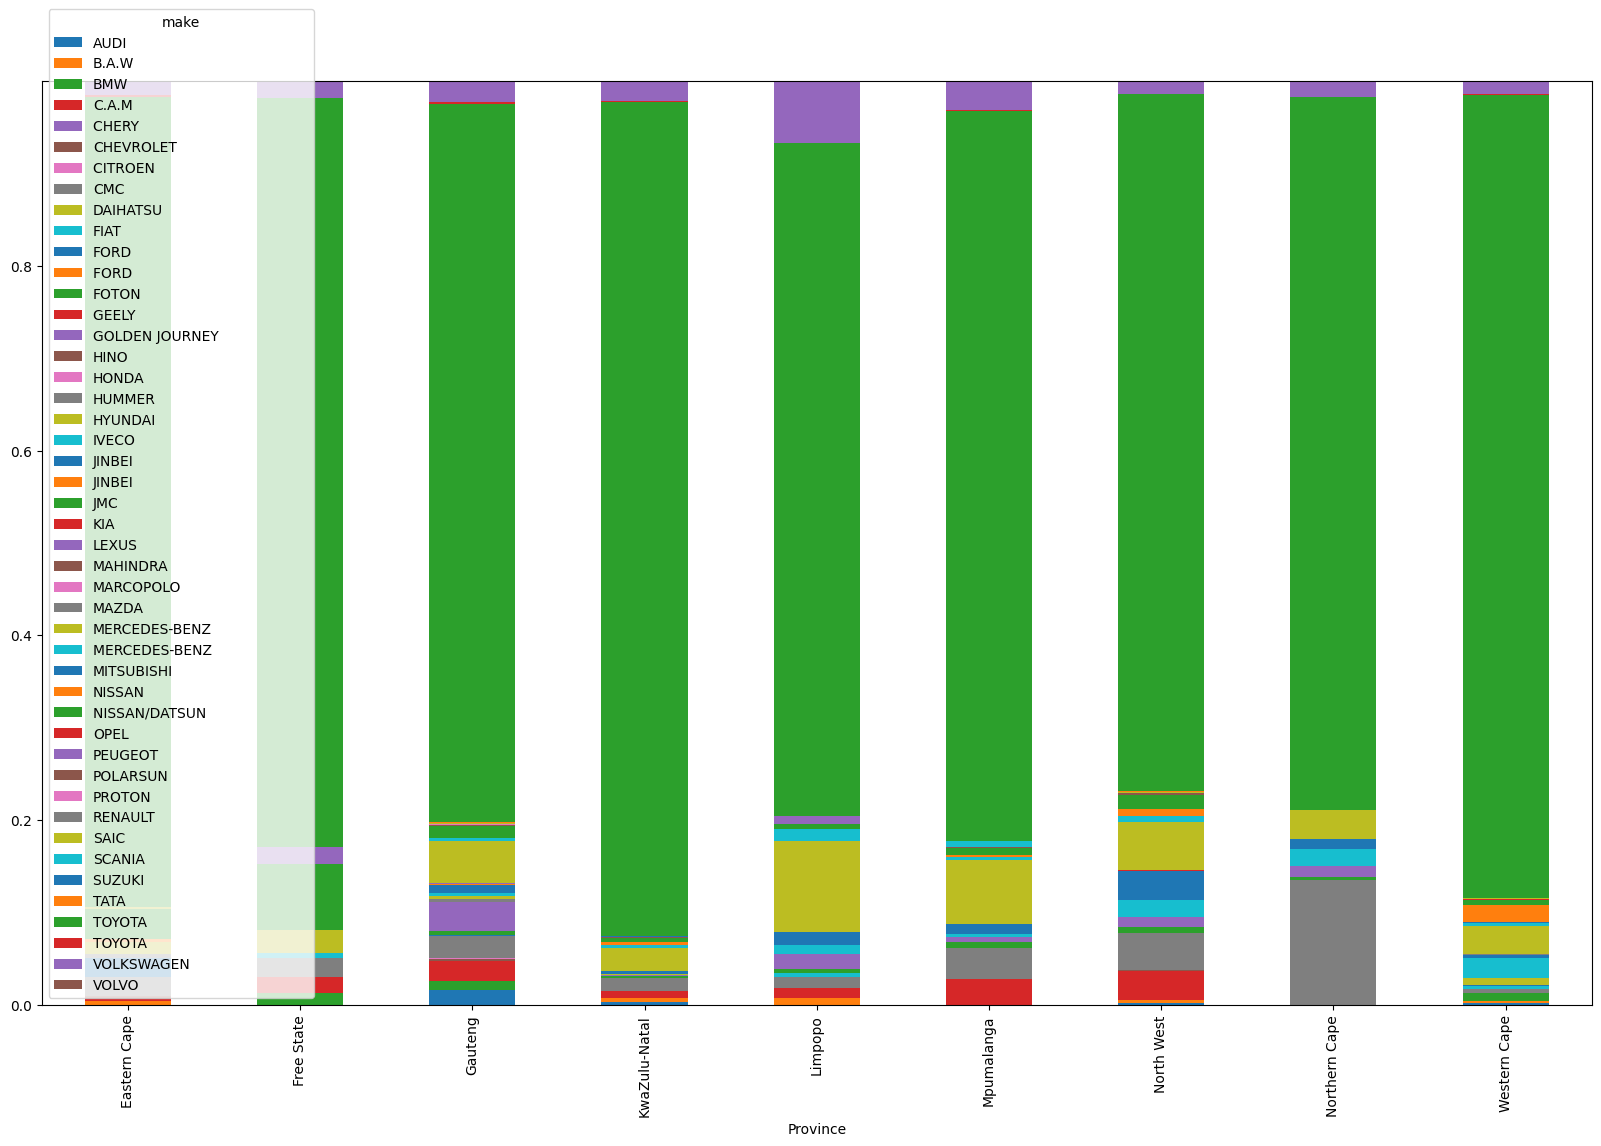

In [32]:
x.plot(kind='bar',stacked=True,figsize=(20,12))


<Axes: xlabel='Province'>

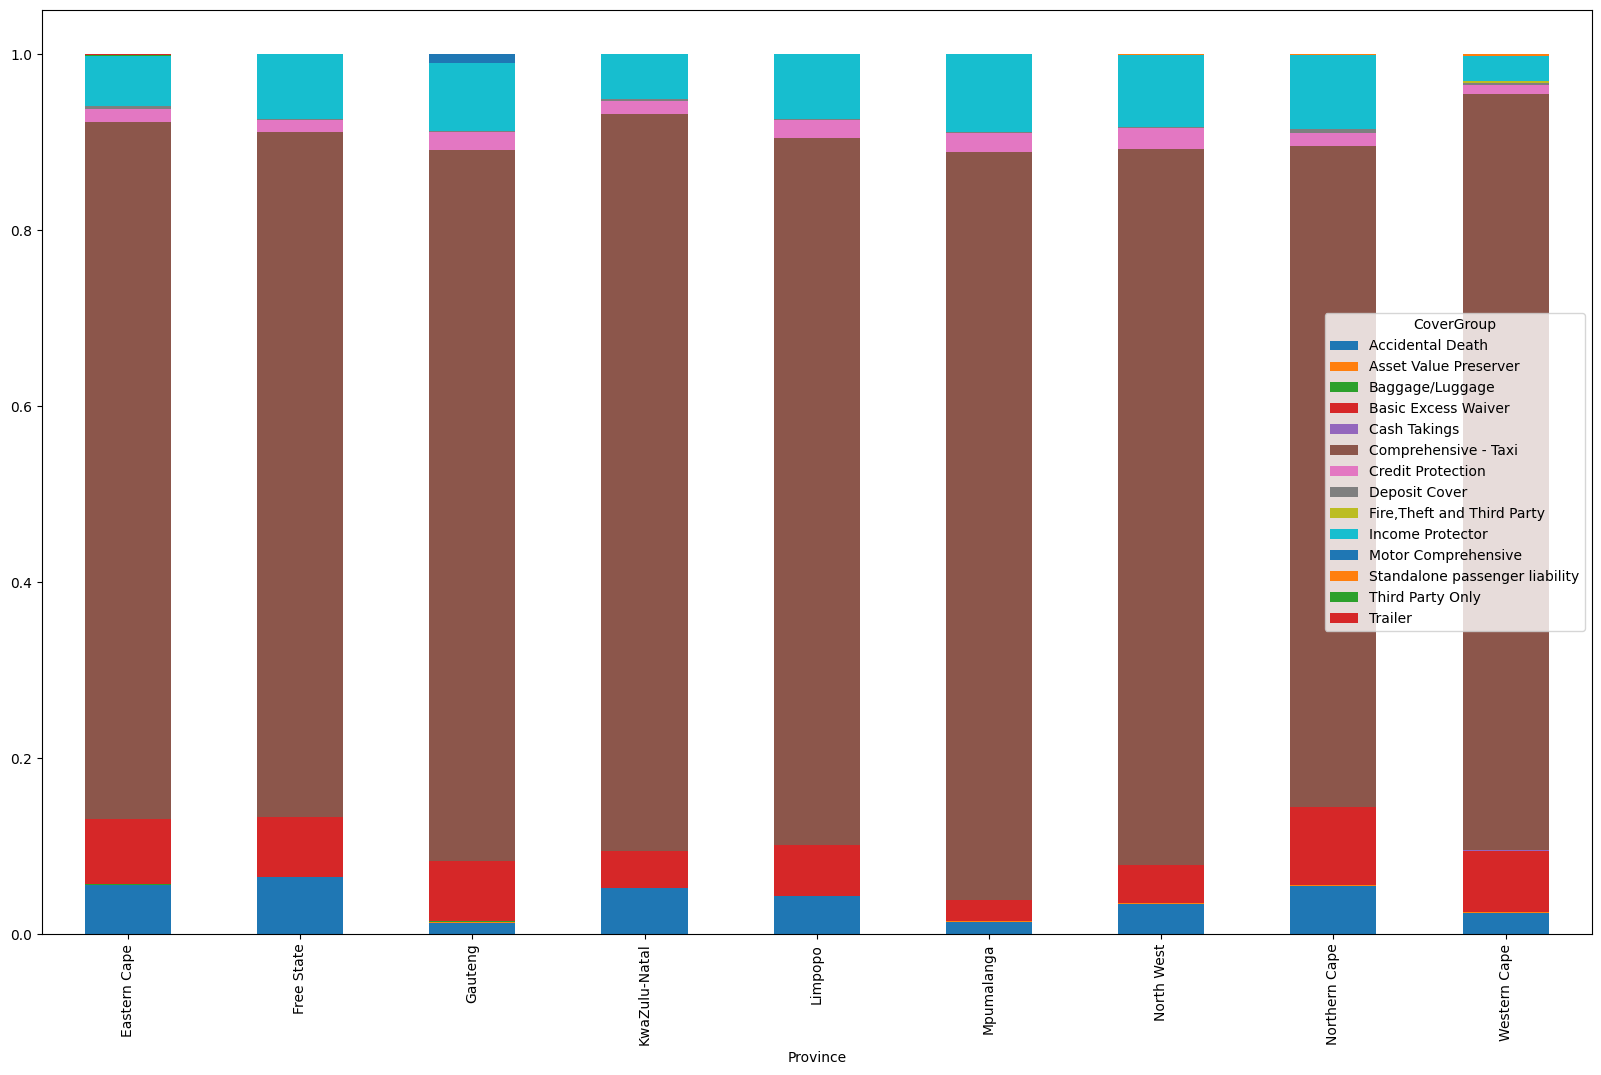

In [33]:
x=grouped_data_Trends_Over_Geography['CoverGroup'].value_counts(normalize=True).unstack()
x.plot(kind='bar',stacked=True,figsize=(20,12))



<Axes: xlabel='Province'>

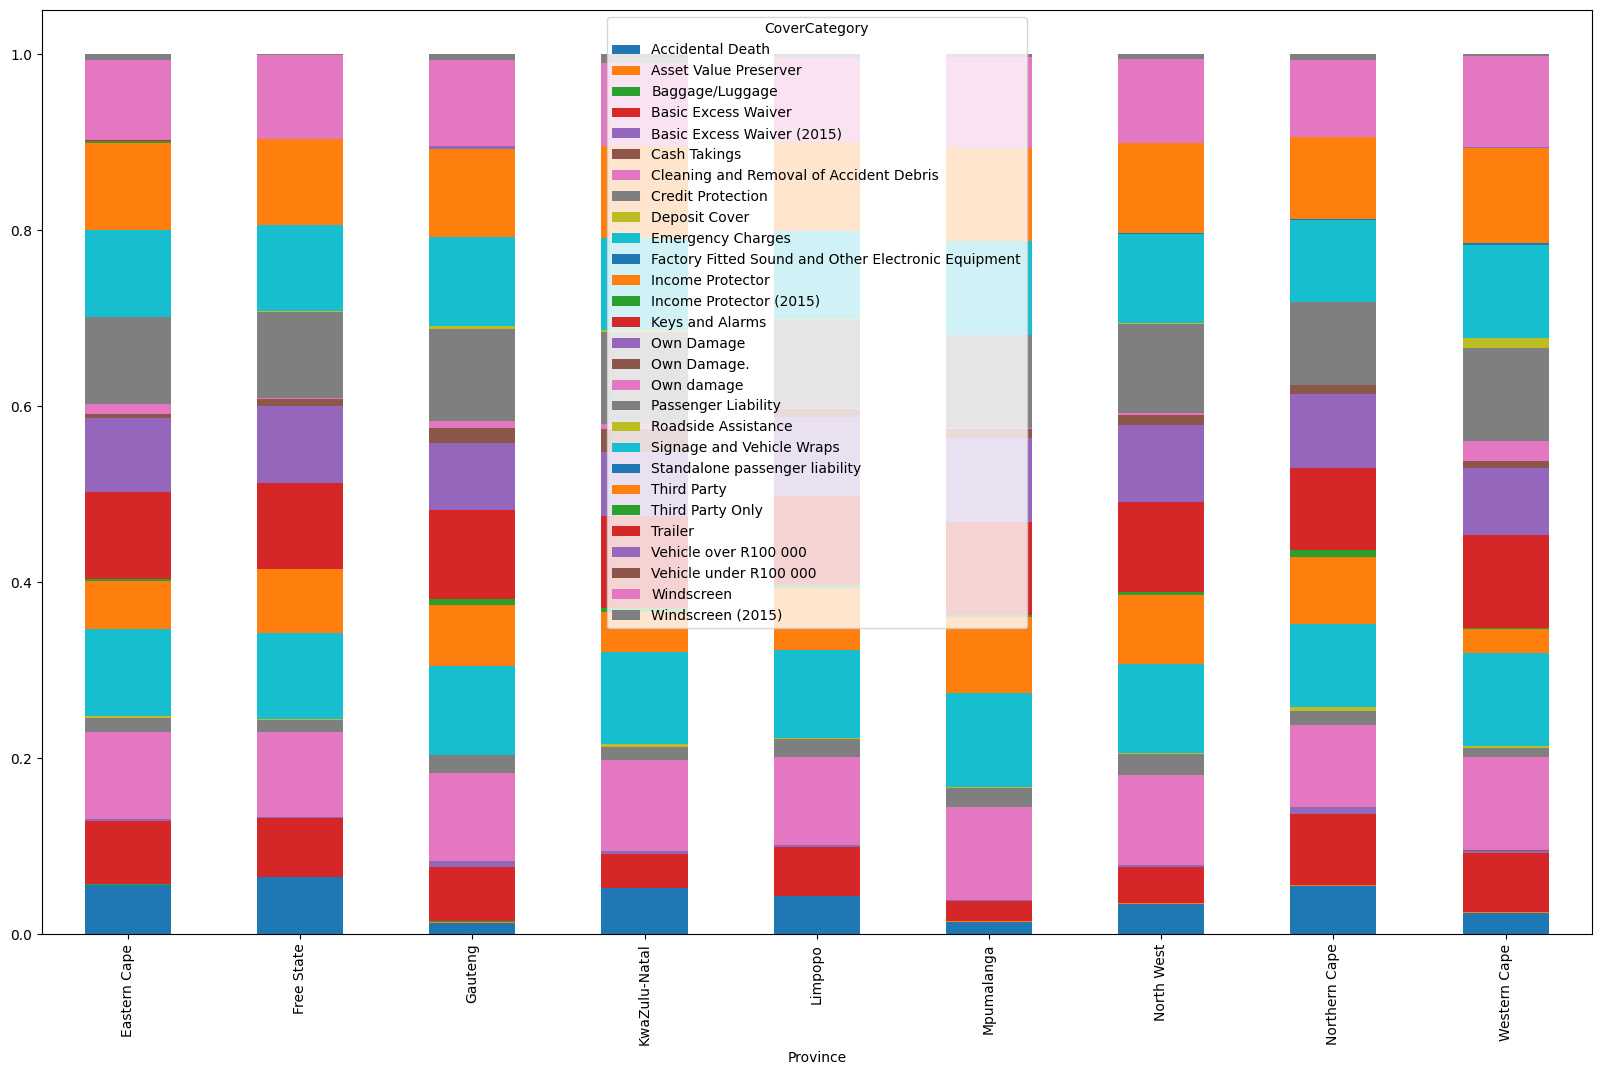

In [34]:
x=grouped_data_Trends_Over_Geography['CoverCategory'].value_counts(normalize=True).unstack()
x.plot(kind='bar',stacked=True,figsize=(20,12))


# A/B Hypothesis Testing


In [35]:
insurance_data = load_data('MachineLearningRating_v3.txt')
insurance_data['TotalClaims'] = pd.to_numeric(insurance_data['TotalClaims'],errors='coerce')


/home/osho/Projects/10AcadameyDADSML/10Acadamecyweek3Analysis/scripts/insurance_scripts.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance_data = pd.read_csv(f'docs/{filename}',delimiter='|')


In [36]:
from scripts.insurance_scripts import ABhypothesisTesting


#### For numerical data, use the t-test (for two groups) or ANOVA (for more than two groups) to compare means.

### There are not significant risk difference between Women and Men


ABhypothesisTesting: This function uses an independent t-test to compare the means of two groups. T-tests are suitable for comparing numerical data between two groups.

In [37]:
ABhypothesisTesting(insurance_data,"Gender","Male","Female","TotalClaims")


T-statistic of Gender values Male and Female: -0.296353891400699
P-value of Gender values Male and Female: 0.7669656471629475
Fail to reject the null hypothesis: No significant difference between the groups.


In [38]:
ABhypothesisTesting(insurance_data,"Province","Gauteng","KwaZulu-Natal","TotalClaims")


T-statistic of Province values Gauteng and KwaZulu-Natal: -1.246201702257548
P-value of Province values Gauteng and KwaZulu-Natal: 0.21269135333580672
Fail to reject the null hypothesis: No significant difference between the groups.


In [39]:
ABhypothesisTesting(insurance_data,"Province","Free State","Eastern Cape","TotalClaims")


T-statistic of Province values Free State and Eastern Cape: -0.03336326844581763
P-value of Province values Free State and Eastern Cape: 0.9733853724519406
Fail to reject the null hypothesis: No significant difference between the groups.


In [40]:
ABhypothesisTesting(insurance_data,"Province","Free State","Limpopo","TotalClaims")


T-statistic of Province values Free State and Limpopo: 0.11463552812191816
P-value of Province values Free State and Limpopo: 0.9087360150228716
Fail to reject the null hypothesis: No significant difference between the groups.


In [41]:
from scripts.insurance_scripts import hypothesis_test_difference_between_columns


### There are no risk differences between zip codes 

hypothesis_test_difference_between_columns: This function uses ANOVA (Analysis of Variance) to compare the means of multiple groups. ANOVA is suitable for comparing numerical data when you have more than two groups.

In [42]:
hypothesis_test_difference_between_columns(insurance_data,'TotalClaims','PostalCode')



T-statistic of PostalCode: 0.9419762214391849
P-value of PostalCode: 0.8906511279164051
Fail to reject the null hypothesis: No significant difference between the groups.


### There are no risk differences across provinces 

In [43]:
hypothesis_test_difference_between_columns(insurance_data,'TotalClaims','Province')



T-statistic of Province: 5.8494137624076075
P-value of Province: 1.6782057588675906e-07
Reject the null hypothesis: There is a significant difference between the groups.


### There are no significant margin (profit) difference between zip codes 

In [44]:
insurance_data['Margin'] = insurance_data['TotalPremium'] - insurance_data['TotalClaims']


In [45]:
hypothesis_test_difference_between_columns(insurance_data,'Margin','PostalCode')


T-statistic of PostalCode: 0.8707474893589263
P-value of PostalCode: 0.9976859758015036
Fail to reject the null hypothesis: No significant difference between the groups.


#### For categorical data, use the chi-squared test to determine if there's a significant association between two categorical variables.

In [46]:
from scripts.insurance_scripts import chi_squared_test


In [47]:
chi_squared_test(insurance_data, 'CoverType', 'CoverGroup')


Chi-squared statistic of CoverType and CoverGroup: 11510407.155982433
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


In [48]:
chi_squared_test(insurance_data, 'Province', 'Gender')


Chi-squared statistic of Province and Gender: 20399.467872930712
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


In [49]:
chi_squared_test(insurance_data, 'make', 'Model')


Chi-squared statistic of make and Model: 44964131.6458405
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


In [50]:
chi_squared_test(insurance_data, 'bodytype', 'CoverType')


Chi-squared statistic of bodytype and CoverType: 65186.098249217976
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


In [51]:
chi_squared_test(insurance_data, 'MainCrestaZone', 'SubCrestaZone')


Chi-squared statistic of MainCrestaZone and SubCrestaZone: 15001470.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the groups.


# Statistical Modeling

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap


def data_preparation(data):
    """Prepares the data for modeling by handling missing values, encoding categorical features, and splitting into training and testing sets.

    Args:
        data : The input data.

    Returns:
         the training and testing data.
    """
    # data.columns = data.columns.astype(str)
 
    # imputer = SimpleImputer(strategy='mean')
    # data[['TotalPremium', 'TotalClaims']] = imputer.fit_transform(data[['TotalPremium', 'TotalClaims']])

    encoder = OneHotEncoder(handle_unknown='ignore')
    categorical_cols = ['Cylinders','mmcode']
    encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())
    data = pd.concat([data.drop(categorical_cols, axis=1), encoded_data], axis=1)

    # Split into training and testing sets
    X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)
    y = data['TotalPremium'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

def model_building(X_train, y_train, X_test, y_test):
    """Builds and evaluates various regression models.

    Args:
        X_train : The training features.
        y_train : The training target variable.
        X_test : The testing features.
        y_test : The testing target variable.

    Returns:   

        dict: A dictionary containing the evaluation metrics for each model.
    """

    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': GradientBoostingRegressor(random_state=42)
        }
  
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {'MSE': mse, 'R2': r2}
    
    return results

def feature_importance_analysis(model, X_train, y_train):
    """Analyzes feature importance using SHAP.

    Args:
        model: The trained model.
        X_train : The training features.
        y_train : The training target variable.
    """

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values, X_train)

# Example usage
X_train, X_test, y_train, y_test = data_preparation(insurance_data)
results = model_building(X_train, y_train, X_test, y_test)
print(results)

# Feature importance analysis (for example, using the XGBoost model)
# feature_importance_analysis(models['XGBoost'], X_train, y_train)


/home/osho/Projects/10AcadameyDADSML/10Acadamecyweek3Analysis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 